# HOUSING: PRICE PREDICTION

#### Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.


The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:



• Which variables are important to predict the price of variable?

• How do these variables describe the price of the house?

Business Goal:
    
We are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv(r"C:\Users\PREETI\Downloads\Project-Housing--2---1-\Project-Housing_splitted\train.csv")
df_test = pd.read_csv(r"C:\Users\PREETI\Downloads\Project-Housing--2---1-\Project-Housing_splitted\test.csv")

In [3]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

### Data Analysis

#### Train Data

In [4]:
df_train.head() # checking first 5 rows

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [5]:
df_train.tail(5)   # checking last rows of the dataset

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1163        31.0        TA        Gd     CBlock       TA       TA   
1164         0.0        TA        TA     CBlock      NaN      NaN   
1165         0.0        TA        TA     CBlock       Gd       TA   
1166         0.0        TA        Fa     BrkTil       TA       TA   
1167         0.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1163           No          BLQ         450          Unf           0   
1164          NaN          NaN           0          NaN           0   
1165           No          ALQ         566          Unf           0   
1166           No          Unf           0          Unf           0   
1167           No          GLQ         457          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1163        432          882    GasA        TA          Y      SBrkr   
1164          0            0    GasA        Ex          Y      SBrkr   
1165        289          855    GasA        TA          Y      SBrkr   
1166        649          649    GasA        TA          N      SBrkr   
1167        326          783    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1163       900         0             0        900             0             0   
1164      1126         0             0       1126             0             0   
1165       855       601             0       1456             0             0   
1166       649       668             0       1317             0             0   
1167       807       702             0       1509             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1163         1         0             3             1          TA   
1164         2         0             2             1          Gd   
1165         2         1             3             1          TA   
1166         1         0             3             1          TA   
1167         2         1             3             1          Gd   

      To

#### Test_data

In [6]:
df_test.head() # checking first 5 rows

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [7]:
df_test.tail(5)   # checking last rows of the dataset

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
287         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
288         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
289         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
290         Lvl    AllPub    Corner       Gtl      BrkSide      Feedr   
291         Lvl    AllPub    Inside       Gtl       BrDale       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
287       Norm     1Fam     1Story            8            5       2007   
288       Norm     1Fam     1Story            5            5       1994   
289       Norm     1Fam     1Story            6            7       1970   
290       Norm     1Fam     1.5Fin            6            7       1947   
291       Norm    Twnhs     2Story            6            5       1973   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
287          2007     Gable  CompShg     VinylSd     VinylSd      Stone   
288          1995     Gable  CompShg     VinylSd     VinylSd       None   
289          1970     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
290          1950     Gable  CompShg     CemntBd     CmentBd       None   
291          1973     Gable  CompShg     HdBoard     HdBoard    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
287       468.0        TA        TA      PConc       Gd       TA           No   
288         0.0        TA        TA      PConc       Gd       TA           No   
289       180.0        TA        TA     CBlock       TA       TA           No   
290         0.0        TA        Gd     CBlock       TA       TA           No   
291       408.0        TA        TA     CBlock       TA       Fa           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
287          GLQ          33          Unf           0       1530         1563   
288          GLQ         686          Unf           0        304          990   
289          ALQ         578          Unf           0        426         1004   
290          ALQ         399          Unf           0        605         1004   
291          BLQ         309          Unf           0        174          483   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
287    GasA        Ex          Y      SBrkr      1563         0             0   
288    GasA        Ex          Y      SBrkr       990         0             0   
289    GasA        Ex          Y      SBrkr      1004         0             0   
290    GasA        Ex          Y      SBrkr      1004       660             0   
291    GasA        TA          Y      SBrkr       483       504             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
287       1563             0             0         2         0             3   
288        990             0             1         1         0             3   
289       1004             1             0         1         0             2   
290       1664             0             0         2         0             3   
291        987             0             0         1         1             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
287             1          Gd             6        Typ           1   
288             1          TA             5        Typ           0   
289             1          TA             5  

In [8]:
print(df_train.shape) # checking size of the dataset
print(df_test.shape)

(1168, 81)
(292, 80)


#### Checking columns

In [9]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
df_test.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Checking Target Variable

<AxesSubplot:ylabel='Density'>

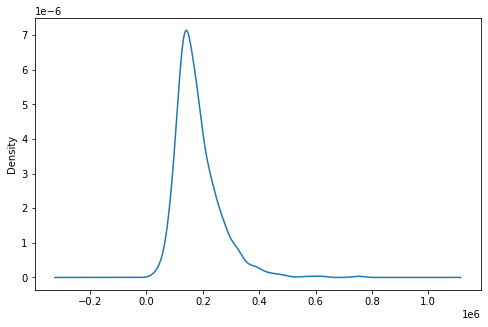

In [11]:
plt.figure(figsize = (8,5))
df_train.SalePrice.plot(kind = 'kde')

#### From above graph we find that most of the Sales prices are lies in the range of approx 0 to 0.4

In [12]:
df_train.dtypes  # checking datatypes of the train dataset

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [13]:
df_test.dtypes # checking datatypes of the test dataset

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


#### Observations:
- These columns 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition' are of **object** types.
        
        
- These columns  'Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice' are of **numerical** types.

In [14]:
df_train.describe()  # checking overall summary of the dataset

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027   
std       1.124343    30.145255     20.785185   182.595606   462.664785   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean     46.647260   569.721747  1061.095034  1169.860445   348.826199   
std     163.520016   449.375525   442.272249   391.161983   439.696370   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   216.000000   799.000000   892.000000     0.000000   
50%       0.000000   474.000000  1005.500000  1096.500000     0.000000   
75%       0.000000   816.000000  1291.500000  1392.000000   729.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean       6.380137  1525.066781      0.425514      0.055651     1.562500   
std       50.892844   528.042957      0.521615      0.236699     0.551882   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1143.250000      0.000000      0.000000     1.000000   
50%        0.000000  1468.500000      0.000000      0.000000     2.000000   
75%        0.000000  1795.000000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1104.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean   1978.193841     1.776541   476.860445    96.206336    46.559932   
std      24.890704     0.745554   214.466769   126.158988    66.381023   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   338.000000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    24.000000   
75%    2002.000000     2.000000   576.000000   171.000000    70.000000   
max    2

In [15]:
df_train.describe(include = 'all')  # checking overall statiscal summary of the dataset

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1168.000000  1168.000000     1168    954.00000    1168.000000   1168   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN      928          NaN            NaN   1164   
mean     724.136130    56.767979      NaN     70.98847   10484.749144    NaN   
std      416.159877    41.940650      NaN     24.82875    8957.442311    NaN   
min        1.000000    20.000000      NaN     21.00000    1300.000000    NaN   
25%      360.500000    20.000000      NaN     60.00000    7621.500000    NaN   
50%      714.500000    50.000000      NaN     70.00000    9522.500000    NaN   
75%     1079.500000    70.000000      NaN     80.00000   11515.500000    NaN   
max     1460.000000   190.000000      NaN    313.00000  164660.000000    NaN   

       Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count     77     1168        1168      1168      1168      1168         1168   
unique     2        4           4         1         5         3           25   
top     Grvl      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq      41      740        1046      1168       842      1105          182   
mean     NaN      NaN         NaN       NaN       NaN       NaN          NaN   
std      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
min      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
25%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
50%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
75%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
max      NaN      NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1168       1168     1168       1168  1168.000000  1168.000000   
unique          9          8        5          8          NaN          NaN   
top          Norm       Norm     1Fam     1Story          NaN          NaN   
freq         1005       1154      981        578          NaN          NaN   
mean          NaN        NaN      NaN        NaN     6.104452     5.595890   
std           NaN        NaN      NaN        NaN     1.390153     1.124343   
min           NaN        NaN      NaN        NaN     1.000000     1.000000   
25%           NaN        NaN      NaN        NaN     5.000000     5.000000   
50%           NaN        NaN      NaN        NaN     6.000000     5.000000   
75%           NaN        NaN      NaN        NaN     7.000000     6.000000   
max           NaN        NaN      NaN        NaN    10.000000     9.000000   

          YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count   1168.000000   1168.000000      1168     1168        1168        1168   
unique          NaN           NaN         6        8          14          15   
top             NaN           NaN     Gable  CompShg     VinylSd     VinylSd   
freq            NaN           NaN       915     1144         396         387   
mean    1970.930651   1984.758562       NaN      NaN         NaN         NaN   
std       30.145255     20.785185       NaN      NaN         NaN         NaN   
min     1875.000000   1950.000000       NaN      NaN         NaN         NaN   
25%     1954.000000   1966.000000       NaN      NaN         NaN         NaN   
50%     1972.000000   1993.000000       NaN      NaN         NaN         NaN   
75%     2000.000000   2004.000000       NaN      NaN         NaN         NaN   
max     2010.000000   2010.000000       NaN      NaN         NaN         NaN   

       MasVnrType   MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count        1161  1161.000000      1168      1168       1168     1138   
unique          4          NaN         4         

### Checking Null Values of the dataset

In [16]:
df_train_null = df_train.isnull().sum()/len(df_train)*100 # checking null values percentage of train dataset

In [17]:
df_test_null = df_test.isnull().sum()/len(df_test)*100 # checking null values percentage of test dataset

In [18]:
df_train_null[df_train_null>15].keys()

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [19]:
df_test_null[df_test_null>15]

LotFrontage     15.410959
Alley           95.205479
FireplaceQu     47.602740
PoolQC         100.000000
Fence           84.931507
MiscFeature     96.575342
dtype: float64

<AxesSubplot:>

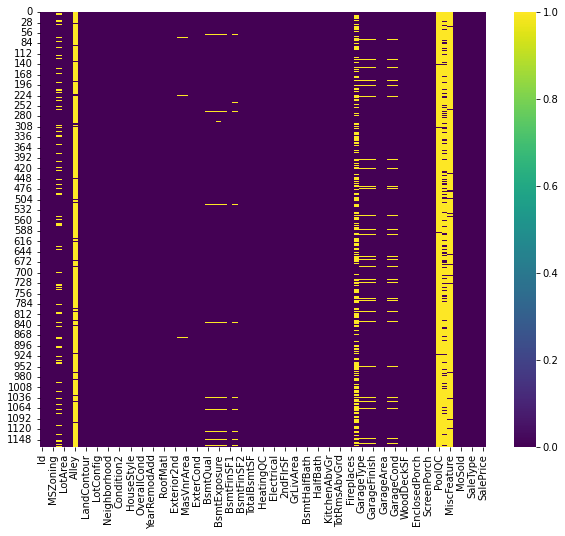

In [20]:
plt.figure(figsize = (10,8))
sns.heatmap(df_train.isnull(), cmap = 'viridis')  #checking null values visually

<AxesSubplot:>

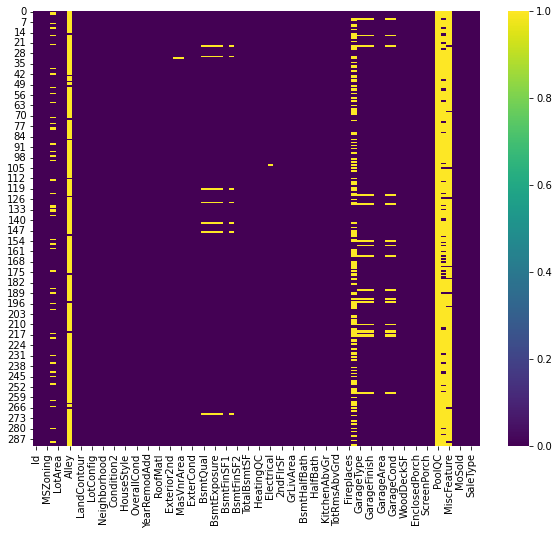

In [21]:
plt.figure(figsize = (10,8))
sns.heatmap(df_test.isnull(), cmap = 'viridis')  #checking null values visually

#### As per dataset above graph  columns 'LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature' having very high null values hence we need to drop it.

In [22]:
df_train.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'], axis = 1, inplace = True)

df_test.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'], axis = 1, inplace = True)

In [23]:
print(df_test.shape)
print(df_train.shape)

(292, 74)
(1168, 75)


In [24]:
df_train_null = df_train.isnull().sum()/len(df_train)*100
df_train_null[df_train_null>0.0]

MasVnrType      0.599315
MasVnrArea      0.599315
BsmtQual        2.568493
BsmtCond        2.568493
BsmtExposure    2.654110
BsmtFinType1    2.568493
BsmtFinType2    2.654110
GarageType      5.479452
GarageYrBlt     5.479452
GarageFinish    5.479452
GarageQual      5.479452
GarageCond      5.479452
dtype: float64

In [25]:
df_test_null = df_test.isnull().sum()/len(df_train)*100
df_test_null[df_test_null>0.0]

MasVnrType      0.085616
MasVnrArea      0.085616
BsmtQual        0.599315
BsmtCond        0.599315
BsmtExposure    0.599315
BsmtFinType1    0.599315
BsmtFinType2    0.599315
Electrical      0.085616
GarageType      1.455479
GarageYrBlt     1.455479
GarageFinish    1.455479
GarageQual      1.455479
GarageCond      1.455479
dtype: float64

#### Checking Unique Values

In [26]:
for i in df_train.columns:
    print(i, "column having ", df_train[i].nunique(), "unique values", "\n")  # train dataset

Id column having  1168 unique values 

MSSubClass column having  15 unique values 

MSZoning column having  5 unique values 

LotArea column having  892 unique values 

Street column having  2 unique values 

LotShape column having  4 unique values 

LandContour column having  4 unique values 

Utilities column having  1 unique values 

LotConfig column having  5 unique values 

LandSlope column having  3 unique values 

Neighborhood column having  25 unique values 

Condition1 column having  9 unique values 

Condition2 column having  8 unique values 

BldgType column having  5 unique values 

HouseStyle column having  8 unique values 

OverallQual column having  10 unique values 

OverallCond column having  9 unique values 

YearBuilt column having  110 unique values 

YearRemodAdd column having  61 unique values 

RoofStyle column having  6 unique values 

RoofMatl column having  8 unique values 

Exterior1st column having  14 unique values 

Exterior2nd column having  15 unique val

In [27]:
for i in df_test.columns:
    print(i, "column having ", df_test[i].nunique(), "unique values", "\n")  # test dataset

Id column having  292 unique values 

MSSubClass column having  15 unique values 

MSZoning column having  4 unique values 

LotArea column having  249 unique values 

Street column having  2 unique values 

LotShape column having  4 unique values 

LandContour column having  4 unique values 

Utilities column having  2 unique values 

LotConfig column having  5 unique values 

LandSlope column having  3 unique values 

Neighborhood column having  24 unique values 

Condition1 column having  8 unique values 

Condition2 column having  2 unique values 

BldgType column having  5 unique values 

HouseStyle column having  8 unique values 

OverallQual column having  8 unique values 

OverallCond column having  7 unique values 

YearBuilt column having  84 unique values 

YearRemodAdd column having  57 unique values 

RoofStyle column having  5 unique values 

RoofMatl column having  3 unique values 

Exterior1st column having  12 unique values 

Exterior2nd column having  14 unique values

#### From above observations we find that train dataset having 1 unique values in utilities and Id column is just to represent property id which is not likely useful in model building hence we can drop this column dataset.

In [28]:
df_train.drop(['Utilities', 'Id'], inplace = True, axis = 1)
df_test.drop(['Utilities', 'Id'], inplace = True, axis = 1)

### Dividing columns into object and numerical categories for easy understandings and imputation

In [29]:
# train dataset
df_train_object = df_train.select_dtypes(include = 'object').columns  # object dataset columns
df_train_num = df_train.select_dtypes(exclude = 'object').columns  # numerical dataset columns

# test dataset
df_test_object = df_test.select_dtypes(include = 'object').columns  # object dataset columns
df_test_num = df_test.select_dtypes(exclude = 'object').columns  # numerical dataset columns

In [30]:
df_train_object  # checking object columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [31]:
df_train_num  # checking non object columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Dealing with Null values

#### Numerical Columns

In [32]:
df_check = df_train.copy()  #making a new variable for checking
df_check_mean = pd.DataFrame()
df_check_median = pd.DataFrame()

In [33]:
df_train_null = df_train.isnull().sum()/len(df_train)*100


for i in df_train_null[df_train_num][df_train_null[df_train_num]>0.0].keys():
    df_check_mean[i] = df_check[i].fillna(df_check[i].mean()) 
    df_check_median[i] = df_check[i].fillna(df_check[i].median())

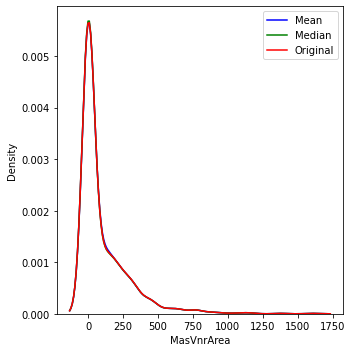

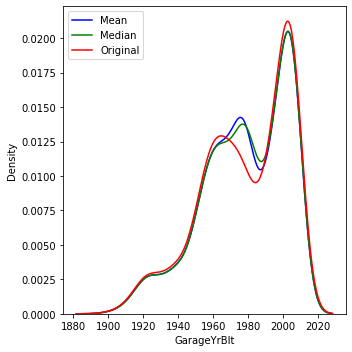

In [34]:
for i in df_train_null[df_train_num][df_train_null[df_train_num]>0.0].keys():

    plt.figure(figsize = (5,5))
    sns.distplot(df_check_mean[i], bins = 20, hist = False, color = 'b', label = 'mean' )
    sns.distplot(df_check_median[i], bins = 20, hist = False, color = 'g', label = 'median')
    sns.distplot(df_check[i], bins = 20, hist = False, color = 'r', label = 'Original')
    plt.legend(labels=['Mean','Median', 'Original'])
    plt.tight_layout()

#### From above graph we can see that GarageYrBlt and MasVnrArea having years and unique values respectively and imputating a value with mean and median with the original dataset can be disturbed to continuos values hence we are going to imputation with mode.

In [35]:
df_train_null = df_train.isnull().sum()/len(df_train)*100


for i in df_train_null[df_train_num][df_train_null[df_train_num]>0].keys():
    df_train[i].fillna(df_train[i].mode()[0], inplace = True)

In [36]:
df_test_null = df_test.isnull().sum()/len(df_test)*100


for i in df_test_null[df_test_num][df_test_null[df_test_num]>0].keys():
        df_test[i].fillna(df_test[i].mode()[0], inplace = True)

#### Object Columns

### As per Data description for categorical columns we find that NaN values are None in the object description

In [37]:
df_train_null = df_train.isnull().sum()/len(df_train)*100


for i in df_train_null[df_train_object][df_train_null[df_train_object]>0].keys():
    df_train[i].replace(np.NaN, 'None', inplace = True)

In [38]:
df_test_null = df_test.isnull().sum()/len(df_test)*100


for i in df_test_null[df_test_object][df_test_null[df_test_object]>0].keys():
        df_test[i].replace(np.NaN, 'None', inplace = True)

#### Checking Dataset after imputations

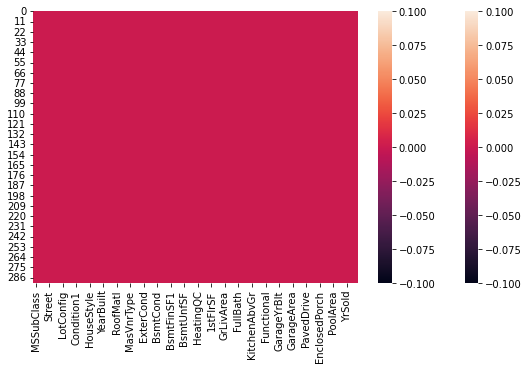

In [39]:
plt.figure(figsize = (20,5)) 
plt.subplot(1,2,1)
sns.heatmap(df_train.isnull())
sns.heatmap(df_test.isnull())
plt.show()

In [40]:
for i in df_train_object:
    print(i, "\n", df_train[i].unique())

MSZoning 
 ['RL' 'RM' 'FV' 'RH' 'C (all)']
Street 
 ['Pave' 'Grvl']
LotShape 
 ['IR1' 'Reg' 'IR2' 'IR3']
LandContour 
 ['Lvl' 'Bnk' 'HLS' 'Low']
LotConfig 
 ['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
LandSlope 
 ['Gtl' 'Mod' 'Sev']
Neighborhood 
 ['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDale' 'StoneBr' 'BrkSide'
 'NridgHt' 'OldTown' 'Somerst' 'Timber' 'SWISU' 'SawyerW' 'ClearCr'
 'Veenker' 'Blmngtn' 'MeadowV' 'Blueste']
Condition1 
 ['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn']
Condition2 
 ['Norm' 'RRAe' 'Feedr' 'PosN' 'Artery' 'RRNn' 'PosA' 'RRAn']
BldgType 
 ['TwnhsE' '1Fam' 'Duplex' 'Twnhs' '2fmCon']
HouseStyle 
 ['1Story' '2Story' '1.5Fin' 'SFoyer' '1.5Unf' 'SLvl' '2.5Fin' '2.5Unf']
RoofStyle 
 ['Gable' 'Flat' 'Hip' 'Shed' 'Gambrel' 'Mansard']
RoofMatl 
 ['CompShg' 'Tar&Grv' 'WdShngl' 'WdShake' 'Roll' 'ClyTile' 'Metal'
 'Membran']
Exterior1st 
 ['Plywood' 'Wd Sdng' 'MetalSd' 'CemntBd' 'VinylS

## Maintaining Dataset

In [41]:
df_train.sample(20)

MSSubClass MSZoning  LotArea Street LotShape LandContour LotConfig  \
858           60       RL    20431   Pave      IR2         Lvl    Inside   
182           70       RM     7740   Pave      Reg         Lvl    Inside   
820           60       FV     8004   Pave      IR1         Lvl    Inside   
434           80       RL    13400   Pave      Reg         Lvl    Inside   
1026         120       RH     4058   Pave      Reg         Lvl    Inside   
534           70       RL    11526   Pave      IR1         Bnk    Inside   
493           20       RL    10182   Pave      IR1         Lvl   CulDSac   
762           20       RL    13472   Pave      Reg         Lvl    Inside   
578           85       RL     9069   Pave      Reg         Lvl    Inside   
526           20       RL     3182   Pave      Reg         Lvl    Inside   
1003          20       RL     8089   Pave      Reg         HLS    Inside   
722           20       RL    12444   Pave      Reg         Lvl       FR2   
407           20       RL     8120   Pave      Reg         Lvl    Inside   
1008          20       RL    10000   Pave      IR1         Lvl    Corner   
923           80       RL    11512   Pave      IR1         Lvl    Corner   
1034          20       RL     9250   Pave      Reg         Lvl    Corner   
53            20       RL     8712   Pave      IR1         Lvl    Inside   
513          160       RL     5062   Pave      IR1         Lvl   CulDSac   
186          120       FV     3316   Pave      IR1         Lvl    Inside   
956           30  C (all)     7879   Pave      Reg         Lvl    Inside   

     LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
858        Gtl      NridgHt       Norm       Norm     1Fam     2Story   
182        Gtl      OldTown       Norm       Norm     1Fam     2Story   
820        Gtl      Somerst       RRAn       Norm     1Fam     2Story   
434        Gtl        NAmes       Norm       Norm     1Fam       SLvl   
1026       Gtl        NAmes       Norm       Norm   TwnhsE     SFoyer   
534        Mod      Crawfor       Norm       Norm     1Fam     2.5Fin   
493        Gtl      Somerst       RRNn       Norm     1Fam     1Story   
762        Gtl      NridgHt       Norm       Norm     1Fam     1Story   
578        Gtl      SawyerW       Norm       Norm     1Fam     SFoyer   
526        Gtl      Blmngtn       Norm       Norm     1Fam     1Story   
1003       Gtl      StoneBr       Norm       Norm     1Fam     1Story   
722        Gtl      NridgHt       Norm       Norm     1Fam     1Story   
407        Gtl        NAmes       Norm       Norm     1Fam     1Story   
1008       Gtl        NAmes       Norm       Norm     1Fam     1Story   
923        Gtl      Edwards       Norm       Norm     1Fam       SLvl   
1034       Gtl        NAmes       Norm       Norm     1Fam     1Story   
53         Gtl        NAmes       Norm       Norm     1Fam     1Story   
513        Gtl      StoneBr       Norm       Norm   TwnhsE     2Story   
186        Gtl      Somerst       Norm       Norm   TwnhsE     1Story   
956        Gtl       IDOTRR       Norm       Norm     1Fam     1Story   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
858             9            5       2005          2006       Hip  CompShg   
182             4            7       1910          1950     Gable  CompShg   
820             8            5       2009          2009     Gable  CompShg   
434             5            5       1966          1966     Gable  CompShg   
1026            7            5       1998          1998     Gable  CompShg   
534             6            7       1922          1994     Gable  CompShg   
493             8            5       2006          2006       Hip  CompShg   
762            10            5       2003          2003       Hip  CompShg   
578             6            6       1992          1992     Gable  CompShg   
526             7            5       2007          2007     Gable  CompShg   
1003            8

#### MsSubClass

As per data description details are below which shows that variable are not numerical values for dataset it represent categorical variable hence we are going to convert it into object.
        
        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [42]:
df_train['MSSubClass'] = df_train['MSSubClass'].astype('object')  
df_test['MSSubClass'] = df_test['MSSubClass'].astype('object')

###### Applying range opeartion for BsmtFinSF1

In [43]:
print( 'Min: ', df_train['BsmtFinSF1'].min())
print( 'Max: ', df_train['BsmtFinSF1'].max())
print('Lenght: ', len(df_train['BsmtFinSF1']))

Min:  0
Max:  5644
Lenght:  1168


In [44]:
# train_df['BsmtFinSF1'].unique()

In [45]:
# for training dataset
BsmtFinSF1_class = []

for i in df_train['BsmtFinSF1']:
    if i in range (0, 101):
        BsmtFinSF1_class.append('0-100')
        
    elif i in range (101, 901):
        BsmtFinSF1_class.append('101-900')
        
    elif i in range(901,1801):
        BsmtFinSF1_class.append('901-1800')
        
    elif i in range(1801, 2701):
        BsmtFinSF1_class.append('1801-2700')
        
    elif i in range(2701, 3601):
        BsmtFinSF1_class.append('2701-3600')
        
    elif i in range(3601, 4501):
        BsmtFinSF1_class.append('3601-4500')
            
    elif i in range(4501, 5401):
        BsmtFinSF1_class.append('4501-5400')
        
    elif i in range(5401, 6000):
        BsmtFinSF1_class.append('5400+ ')


len(BsmtFinSF1_class)

1168

In [46]:
df_train['BsmtFinSF1_Class'] = BsmtFinSF1_class

In [47]:
# for testing dataset
BsmtFinSF1_class2 = []

for i in df_test['BsmtFinSF1']:
    if i in range (0, 101):
        BsmtFinSF1_class2.append('0-100')
        
    elif i in range (101, 901):
        BsmtFinSF1_class2.append('101-900')
        
    elif i in range(901,1801):
        BsmtFinSF1_class2.append('901-1800')
        
    elif i in range(1801, 2701):
        BsmtFinSF1_class2.append('1801-2700')
        
    elif i in range(2701, 3601):
        BsmtFinSF1_class2.append('2701-3600')
        
    elif i in range(3601, 4501):
        BsmtFinSF1_class2.append('3601-4500')
            
    elif i in range(4501, 5401):
        BsmtFinSF1_class2.append('4501-5400')
        
    elif i in range(5401, 6000):
        BsmtFinSF1_class2.append('5400+ ')


len(BsmtFinSF1_class2)

292

In [48]:
df_train['BsmtFinSF1_Class'] = BsmtFinSF1_class
df_test['BsmtFinSF1_Class'] = BsmtFinSF1_class2

##### Applying range opeartion for BsmtFinSF2

In [49]:
print( 'Min: ', df_train['BsmtFinSF2'].min())
print( 'Max: ', df_train['BsmtFinSF2'].max())
print('Lenght: ', len(df_train['BsmtFinSF2']))

Min:  0
Max:  1474
Lenght:  1168


In [50]:
# for training dataset
BsmtFinSF2_class = []

for i in df_train['BsmtFinSF2']:
    if i in range (0, 101):
        BsmtFinSF2_class.append('0-100')   
    elif i in range (101, 401):
        BsmtFinSF2_class.append('101-400')   
    elif i in range(401,801):
        BsmtFinSF2_class.append('401-800') 
    elif i in range(801, 1201):
        BsmtFinSF2_class.append('801-1200')  
    elif i in range(1201, 2000):
        BsmtFinSF2_class.append('1200+')
len(BsmtFinSF2_class)

1168

In [51]:
# for testing dataset
BsmtFinSF2_class2 = []

for i in df_test['BsmtFinSF2']:
    if i in range (0, 101):
        BsmtFinSF2_class2.append('0-100')
        
    elif i in range (101, 401):
        BsmtFinSF2_class2.append('101-400')
        
    elif i in range(401,801):
        BsmtFinSF2_class2.append('401-800')
        
    elif i in range(801, 1201):
        BsmtFinSF2_class2.append('801-1200')
        
    elif i in range(1201, 2000):
        BsmtFinSF2_class2.append('1200+')


len(BsmtFinSF2_class2)

292

In [52]:
df_train['BsmtFinSF2_class'] = BsmtFinSF2_class
df_test['BsmtFinSF2_class'] = BsmtFinSF2_class2

###### Applying range opeartion for LowQualFinSF

In [53]:
print( 'Min: ', df_train['LowQualFinSF'].min())
print( 'Max: ', df_train['LowQualFinSF'].max())
print('Lenght: ', len(df_train['LowQualFinSF']))

Min:  0
Max:  572
Lenght:  1168


In [54]:
# for training dataset
LowQualFinSF_class = []

for i in df_train['LowQualFinSF']:
    if i in range (0, 1):
        LowQualFinSF_class.append('Zero')
        
    elif i in range (1, 151):
        LowQualFinSF_class.append('1-150')
        
    elif i in range(151,301):
        LowQualFinSF_class.append('151-300')
        
    elif i in range(301, 451):
        LowQualFinSF_class.append('301-450')
        
    elif i in range(451, 601):
        LowQualFinSF_class.append('451-600')


len(LowQualFinSF_class)

1168

In [55]:
# for testing dataset
LowQualFinSF_class2 = []

for i in df_test['LowQualFinSF']:
    if i in range (0, 1):
        LowQualFinSF_class2.append('Zero')
        
    elif i in range (1, 151):
        LowQualFinSF_class2.append('1-150')
        
    elif i in range(151,301):
        LowQualFinSF_class2.append('151-300')
        
    elif i in range(301, 451):
        LowQualFinSF_class2.append('301-450')
        
    elif i in range(451, 601):
        LowQualFinSF_class2.append('451-600')


len(LowQualFinSF_class2)

292

In [56]:
df_train['LowQualFinSF_class'] = LowQualFinSF_class
df_test['LowQualFinSF_class'] = LowQualFinSF_class2

##### Applying range opeartion for EnclosedPorch

In [57]:
print( 'Min: ', df_train['EnclosedPorch'].min())
print( 'Max: ', df_train['EnclosedPorch'].max())
print('Lenght: ', len(df_train['EnclosedPorch']))

Min:  0
Max:  552
Lenght:  1168


In [58]:
# for training dataset
EnclosedPorch_class = []

for i in df_train['EnclosedPorch']:
    if i in range (0, 1):
        EnclosedPorch_class.append('Zero')
        
    elif i in range (1, 151):
        EnclosedPorch_class.append('1-150')
        
    elif i in range(151,301):
        EnclosedPorch_class.append('151-300')
        
    elif i in range(301, 451):
        EnclosedPorch_class.append('301-450')
        
    elif i in range(451, 601):
        EnclosedPorch_class.append('451-600')


len(EnclosedPorch_class)

1168

In [59]:
# for testing dataset
EnclosedPorch_class2 = []

for i in df_test['EnclosedPorch']:
    if i in range (0, 1):
        EnclosedPorch_class2.append('Zero')
        
    elif i in range (1, 151):
        EnclosedPorch_class2.append('1-150')
        
    elif i in range(151,301):
        EnclosedPorch_class2.append('151-300')
        
    elif i in range(301, 451):
        EnclosedPorch_class2.append('301-450')
        
    elif i in range(451, 601):
        EnclosedPorch_class2.append('451-600')


len(EnclosedPorch_class2)

292

In [60]:
df_train['EnclosedPorch_class'] = EnclosedPorch_class
df_test['EnclosedPorch_class'] = EnclosedPorch_class2

##### Applying range opeartion for 3SsnPorch

In [61]:
print( 'Min: ', df_train['3SsnPorch'].min())
print( 'Max: ', df_train['3SsnPorch'].max())
print('Lenght: ', len(df_train['3SsnPorch']))

Min:  0
Max:  508
Lenght:  1168


In [62]:
# for training dataset
SsnPorch_class = []

for i in df_train['3SsnPorch']:
    if i in range (0, 1):
        SsnPorch_class.append('Zero')
        
    elif i in range (1, 151):
        SsnPorch_class.append('1-150')
        
    elif i in range(151,301):
        SsnPorch_class.append('151-300')
        
    elif i in range(301, 451):
        SsnPorch_class.append('301-450')
        
    elif i in range(451, 601):
        SsnPorch_class.append('451-600')


len(SsnPorch_class)

1168

In [63]:
# for training dataset
SsnPorch_class2 = []

for i in df_test['3SsnPorch']:
    if i in range (0, 1):
        SsnPorch_class2.append('Zero')
        
    elif i in range (1, 151):
        SsnPorch_class2.append('1-150')
        
    elif i in range(151,301):
        SsnPorch_class2.append('151-300')
        
    elif i in range(301, 451):
        SsnPorch_class2.append('301-450')
        
    elif i in range(451, 601):
        SsnPorch_class2.append('451-600')


len(SsnPorch_class2)

292

In [64]:
df_train['3SsnPorch_class'] = SsnPorch_class
df_test['3SsnPorch_class'] = SsnPorch_class2

###### Applying range opeartion for ScreenPorch

In [65]:
print( 'Min: ', df_train['ScreenPorch'].min())
print( 'Max: ', df_train['ScreenPorch'].max())
print('Lenght: ', len(df_train['ScreenPorch']))

Min:  0
Max:  480
Lenght:  1168


In [66]:
# for training dataset
ScreenPorch_class = []

for i in df_train['ScreenPorch']:
    if i in range (0, 1):
        ScreenPorch_class.append('Zero')
        
    elif i in range (1, 151):
        ScreenPorch_class.append('1-150')
        
    elif i in range(151,301):
        ScreenPorch_class.append('151-300')
        
    elif i in range(301, 451):
        ScreenPorch_class.append('301-450')
        
    elif i in range(451, 601):
        ScreenPorch_class.append('450+')


len(ScreenPorch_class)

1168

In [67]:
# for training dataset
ScreenPorch_class2 = []

for i in df_test['ScreenPorch']:
    if i in range (0, 1):
        ScreenPorch_class2.append('Zero')
        
    elif i in range (1, 151):
        ScreenPorch_class2.append('1-150')
        
    elif i in range(151,301):
        ScreenPorch_class2.append('151-300')
        
    elif i in range(301, 451):
        ScreenPorch_class2.append('301-450')
        
    elif i in range(451, 601):
        ScreenPorch_class2.append('450+')


len(ScreenPorch_class2)

292

In [68]:
df_train['ScreenPorch_class'] = ScreenPorch_class
df_test['ScreenPorch_class'] = ScreenPorch_class2

##### Applying range opeartion for PoolArea

In [69]:
print( 'Min: ', df_train['PoolArea'].min())
print( 'Max: ', df_train['PoolArea'].max())
print('Lenght: ', len(df_train['PoolArea']))

Min:  0
Max:  738
Lenght:  1168


In [70]:
# for training dataset
PoolArea_class = []

for i in df_train['PoolArea']:
    if i in range (0, 1):
        PoolArea_class.append('Zero')
        
    elif i in range (1, 151):
        PoolArea_class.append('1-150')
        
    elif i in range(151,301):
        PoolArea_class.append('151-300')
        
    elif i in range(301, 451):
        PoolArea_class.append('301-450')
        
    elif i in range(451, 601):
        PoolArea_class.append('450-600')
        
    elif i in range(601, 751):
        PoolArea_class.append('601-750')


len(PoolArea_class)

1168

In [71]:
# for testing dataset
PoolArea_class2 = []

for i in df_test['PoolArea']:
    if i in range (0, 1):
        PoolArea_class2.append('Zero')
        
    elif i in range (1, 151):
        PoolArea_class2.append('1-150')
        
    elif i in range(151,301):
        PoolArea_class2.append('151-300')
        
    elif i in range(301, 451):
        PoolArea_class2.append('301-450')
        
    elif i in range(451, 601):
        PoolArea_class2.append('450-600')
        
    elif i in range(601, 751):
        PoolArea_class2.append('601-750')


len(PoolArea_class2)

292

In [72]:
df_train['PoolArea_class'] = PoolArea_class
df_test['PoolArea_class'] = PoolArea_class2

##### Applying range opeartion for MiscVal

In [73]:
print( 'Min: ', df_train['MiscVal'].min())
print( 'Max: ', df_train['MiscVal'].max())
print('Lenght: ', len(df_train['MiscVal']))

Min:  0
Max:  15500
Lenght:  1168


In [74]:
# for training dataset
MiscVal_class = []

for i in df_train['MiscVal']:
    if i in range (0, 1):
        MiscVal_class.append('Zero')
        
    elif i in range (1, 1001):
        MiscVal_class.append('1-150')
        
    elif i in range(1001,6001):
        MiscVal_class.append('151-300')
        
    elif i in range(6001, 11001):
        MiscVal_class.append('301-450')
        
    elif i in range(11001, 16000):
        MiscVal_class.append('11001 -16000')

len(MiscVal_class)

1168

In [75]:
# for training dataset
MiscVal_class2 = []

for i in df_test['MiscVal']:
    if i in range (0, 1):
        MiscVal_class2.append('Zero')
        
    elif i in range (1, 1001):
        MiscVal_class2.append('1-150')
        
    elif i in range(1001,6001):
        MiscVal_class2.append('151-300')
        
    elif i in range(6001, 11001):
        MiscVal_class2.append('301-450')
        
    elif i in range(11001, 16000):
        MiscVal_class2.append('11001 -16000')

len(MiscVal_class2)

292

In [76]:
df_train['MiscVal_class'] = MiscVal_class
df_test['MiscVal_class'] = MiscVal_class2

In [77]:
# BsmtFinSF1
# BsmtFinSF2
# LowQualFinSF
# EnclosedPorch
# 3SsnPorch
# ScreenPorch
# PoolArea
# MiscVal

# Range Column created for each individual column now, this time better to remove these columns from the dataset

In [78]:
df_train.drop(columns = [ 'BsmtFinSF1', 'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch',
                         'ScreenPorch', 'PoolArea', 'MiscVal' ], inplace = True)

df_test.drop(columns = [ 'BsmtFinSF1', 'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch',
                         'ScreenPorch', 'PoolArea', 'MiscVal' ], inplace = True)

In [79]:
df_test.shape

(292, 72)

In [80]:
df_train.shape

(1168, 73)

In [81]:
df_train.sample(5)

MSSubClass MSZoning  LotArea Street LotShape LandContour LotConfig  \
929          60       RL     8750   Pave      Reg         Lvl    Inside   
48           20       RL     5000   Pave      Reg         Low    Inside   
1062         20       RL     8700   Pave      Reg         Lvl    Inside   
507          60       RL    17542   Pave      IR1         Lvl    Inside   
1070         20       RL     9600   Pave      Reg         Lvl    Corner   

     LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
929        Gtl      CollgCr       Norm       Norm     1Fam     2Story   
48         Mod      BrkSide       Norm       Norm     1Fam     1Story   
1062       Gtl        NAmes       Norm       Norm     1Fam     1Story   
507        Gtl      Veenker       Norm       Norm     1Fam     2Story   
1070       Gtl        NAmes       Norm       Norm     1Fam     1Story   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
929             7            5       1996          1996     Gable  CompShg   
48              1            3       1946          1950     Gable  CompShg   
1062            5            6       1963          1963       Hip  CompShg   
507             7            7       1974          2003     Gable  CompShg   
1070            5            6       1959          1959     Gable  CompShg   

     Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
929      VinylSd     VinylSd       None         0.0        Gd        TA   
48       VinylSd     VinylSd       None         0.0        Fa        Fa   
1062     MetalSd     MetalSd    BrkFace       148.0        TA        Gd   
507      Wd Sdng     Wd Sdng       None         0.0        Gd        TA   
1070     MetalSd     MetalSd    BrkFace       132.0        TA        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
929       PConc       Gd       TA           No          Unf          Unf   
48         Slab     None     None         None         None         None   
1062     CBlock       TA       TA           Mn          ALQ          Unf   
507      CBlock       TA       TA           Gd          LwQ          ALQ   
1070     CBlock       TA       TA           No          ALQ          Unf   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
929         880          880    GasA        Ex          Y      SBrkr   
48            0            0    GasA        Fa          N      FuseF   
1062        344         1120    GasA        Gd          Y      SBrkr   
507          36         1192    GasA        TA          Y      SBrkr   
1070         50         1041    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
929        909       807       1716             0             0         2   
48         334         0        334             0             0         1   
1062      1128         0       1128             1             0         2   
507       1516       651       2167             1             0         2   
1070      1041         0       1041             1             0         1   

      HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
929          1             2             1          Gd             7   
48           0             1             1          Fa             2   
1062         0             3             1          TA             6   
507          1             3             1          Gd             9   
1070         0             3             1          TA             6   

     Functional  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  \
929         Typ           1     Attchd       1996.0          RFn           2   
48          Typ           0       None       2006.0         None           0   
1062        Typ           0     Attchd       1963.0          RFn           2   
507         Typ           2     Attchd       1974.0          RFn           2   
1070     

In [82]:
num = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice']
obj = df_train.columns.drop(num)

### Exploratory Data Analysis

#### Univariate Analysis

In [83]:
obj

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition',
       'BsmtFinSF1_Class', 'BsmtFinSF2_class', 'LowQualFinSF_class',
       'EnclosedPorch_class', '3SsnPorch_class', 'ScreenPorch_class',
       'PoolArea_class', 'MiscVal_class'],
      dtype='object')

### Bar Plot and Pie Chart

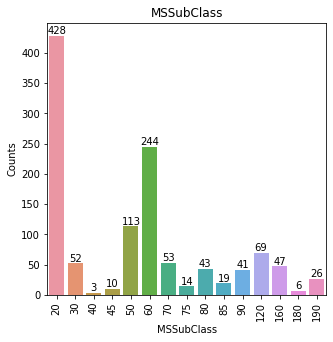

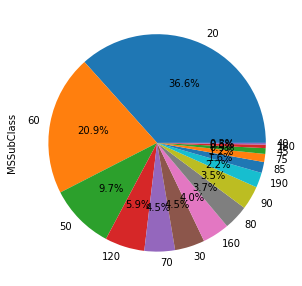

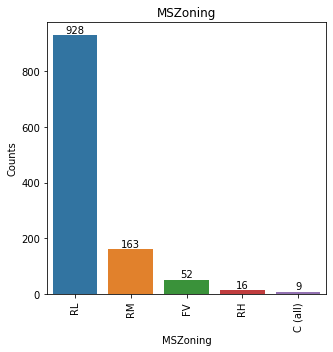

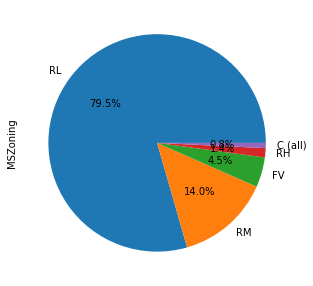

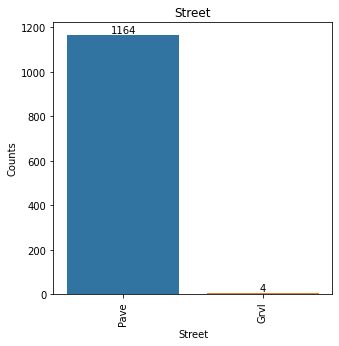

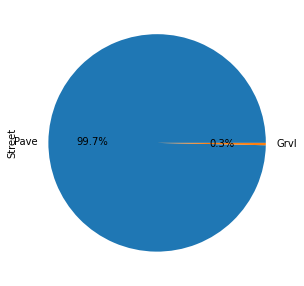

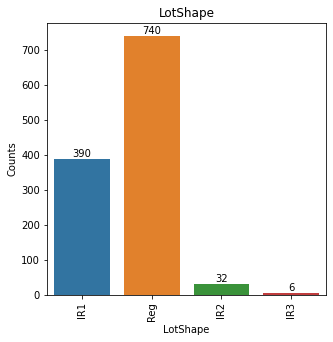

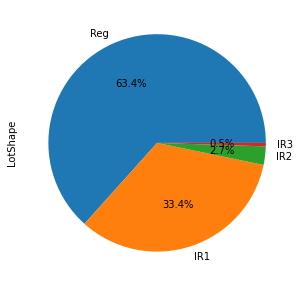

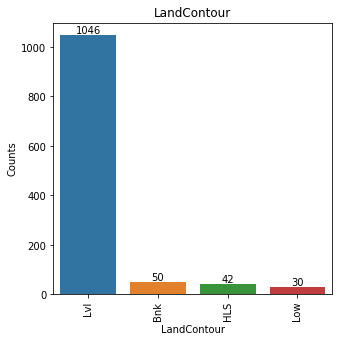

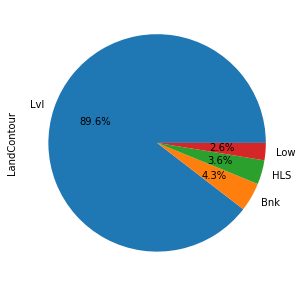

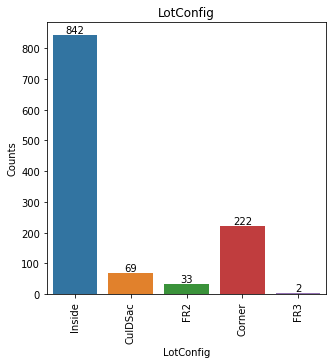

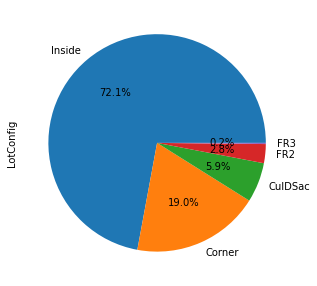

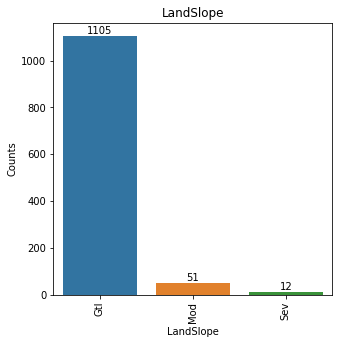

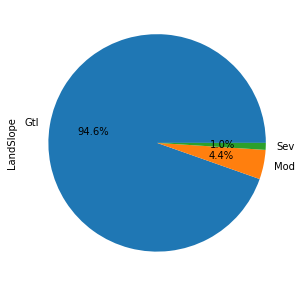

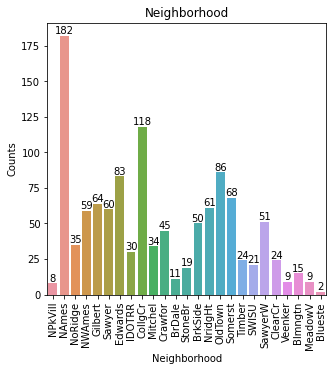

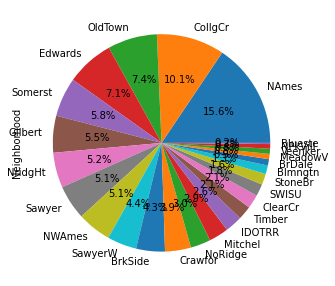

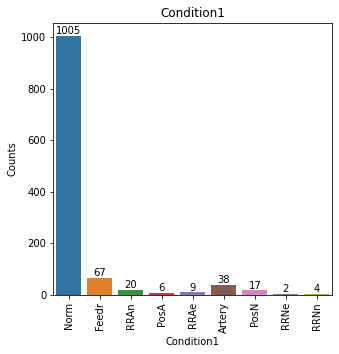

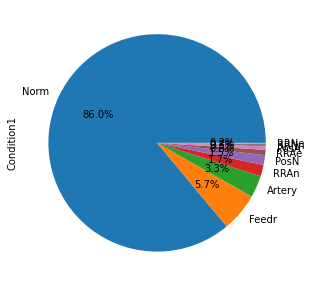

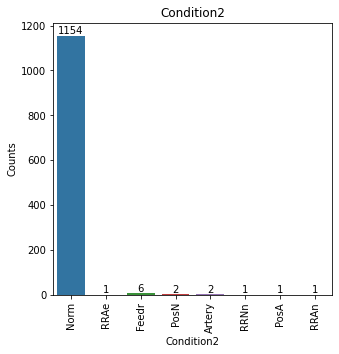

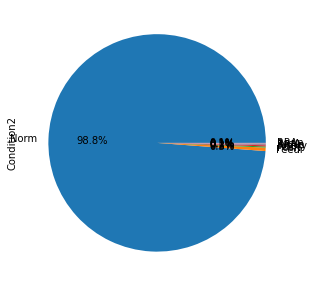

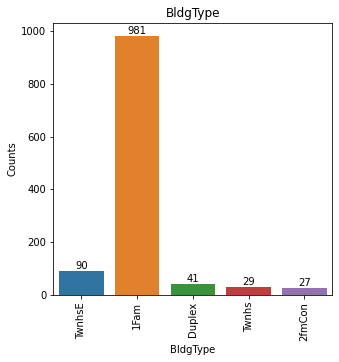

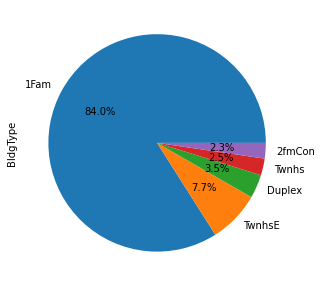

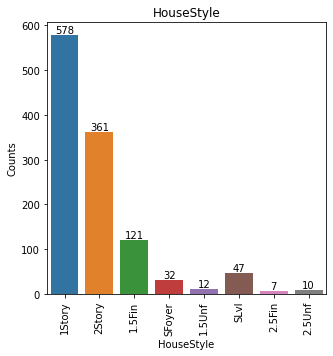

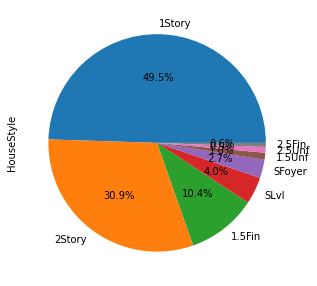

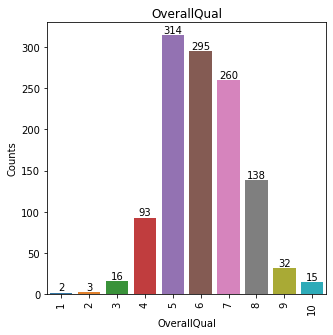

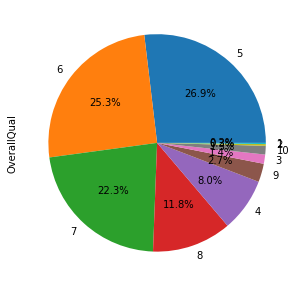

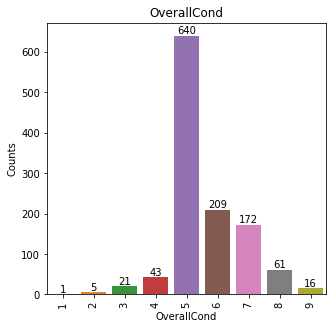

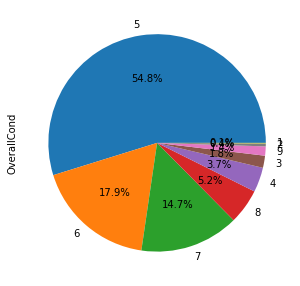

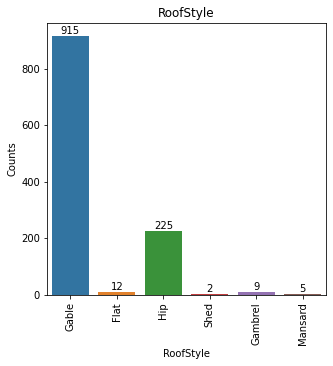

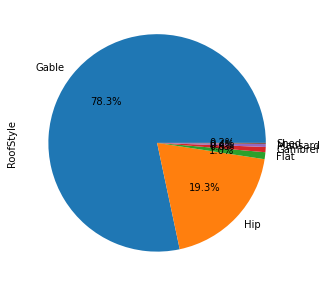

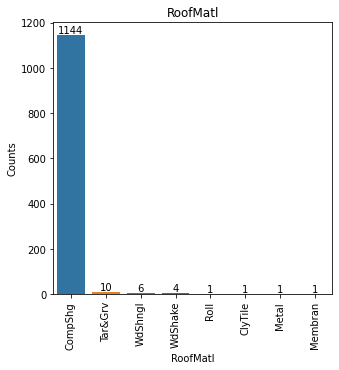

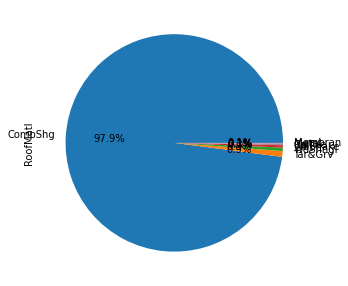

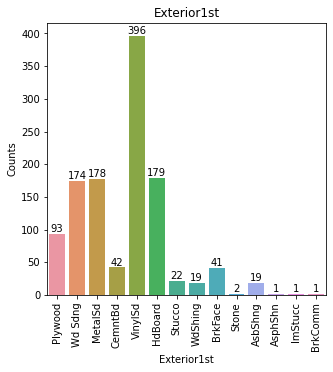

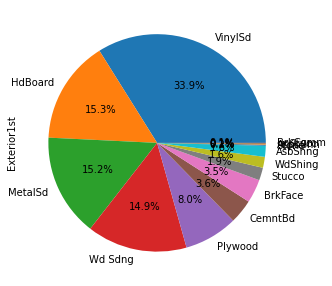

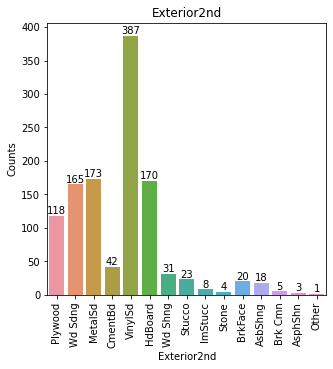

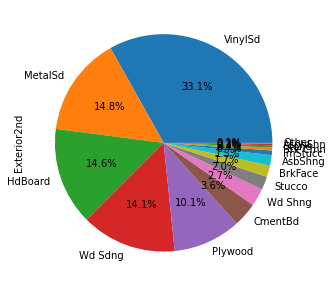

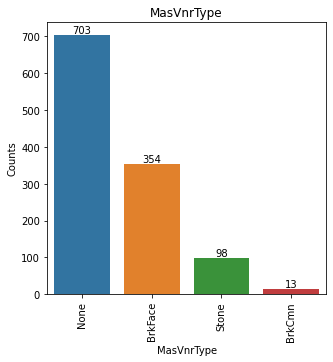

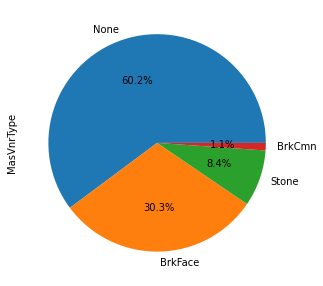

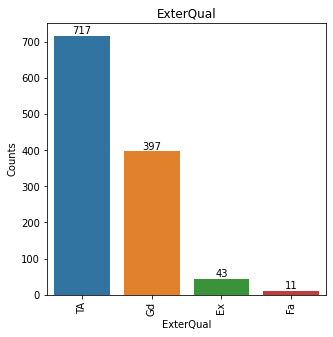

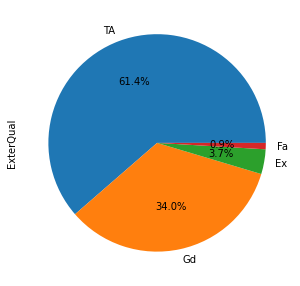

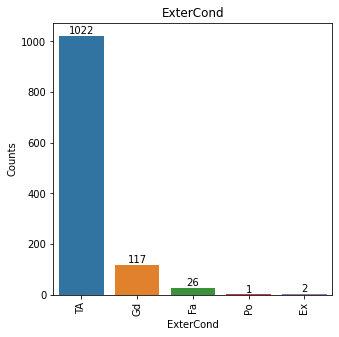

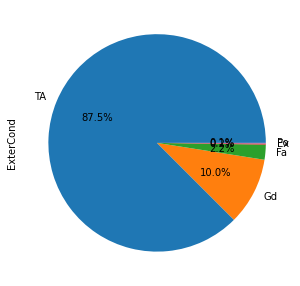

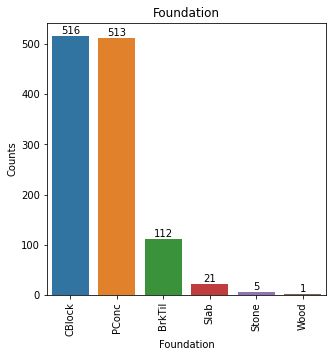

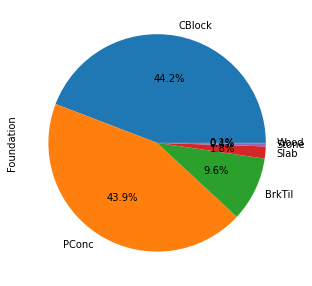

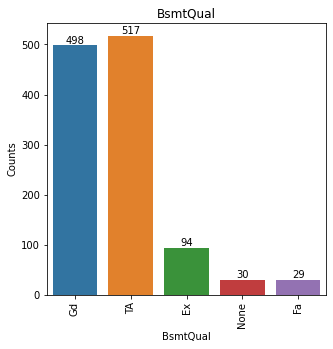

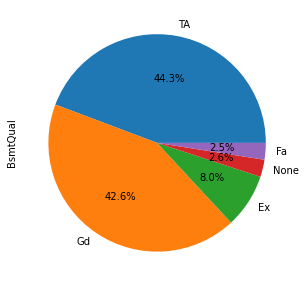

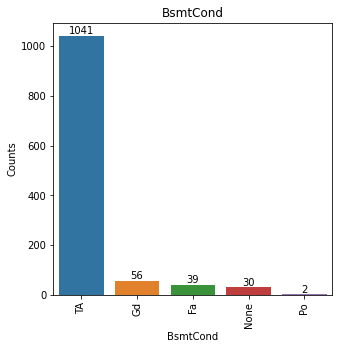

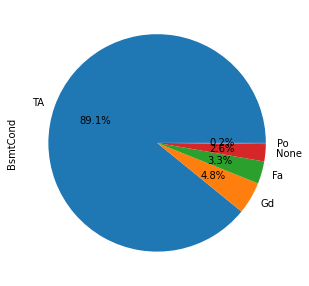

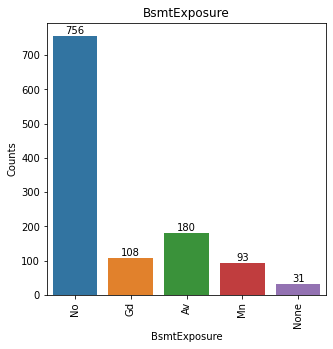

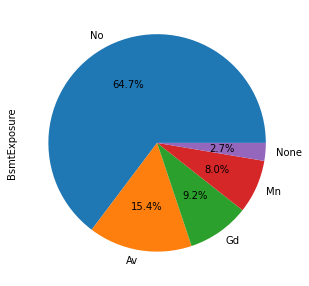

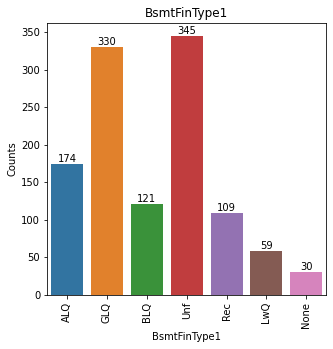

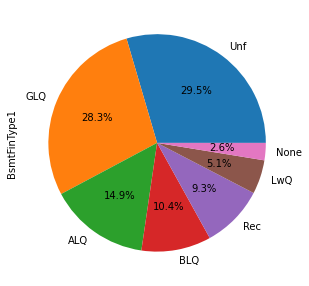

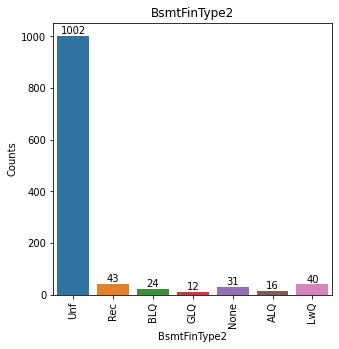

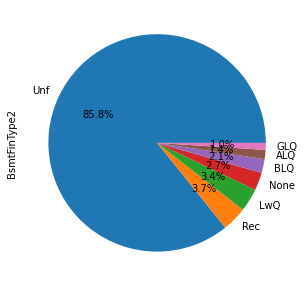

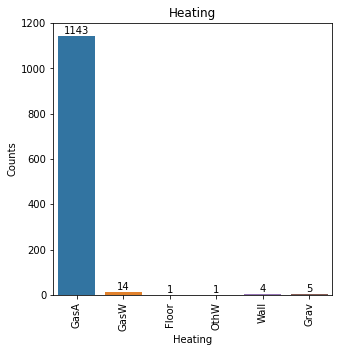

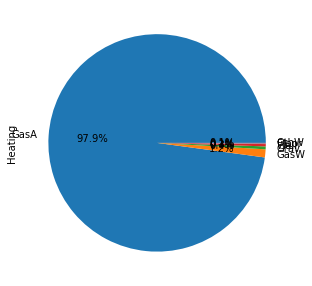

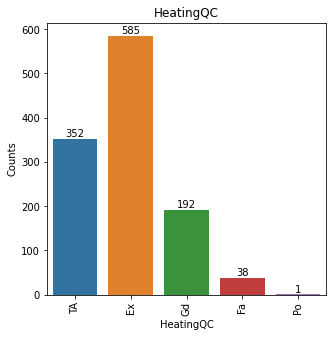

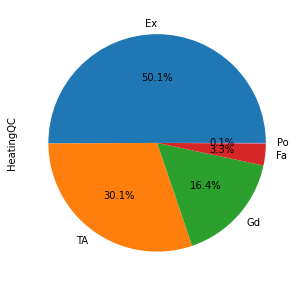

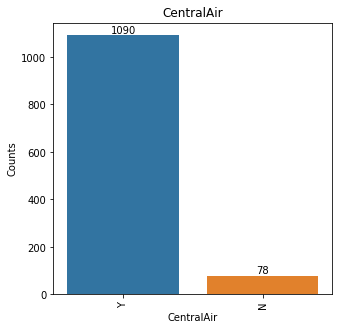

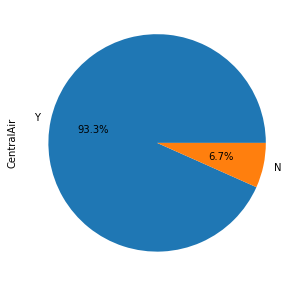

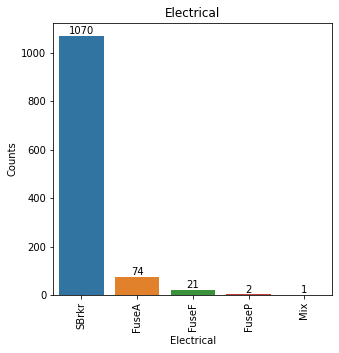

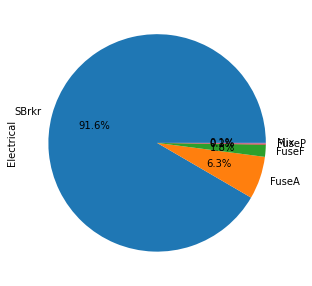

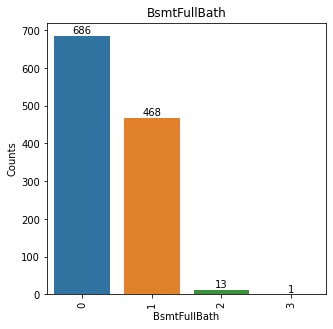

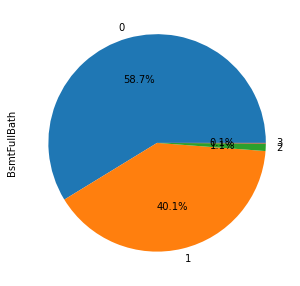

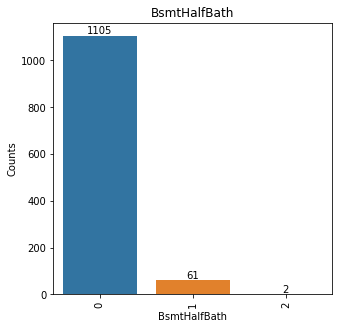

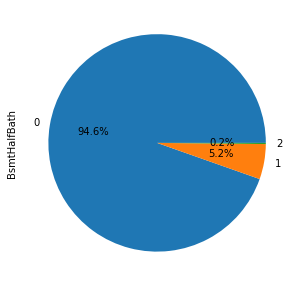

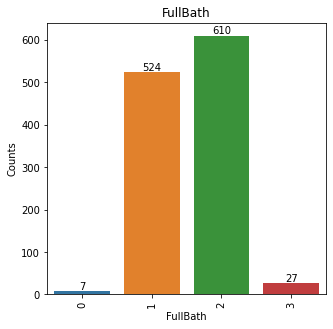

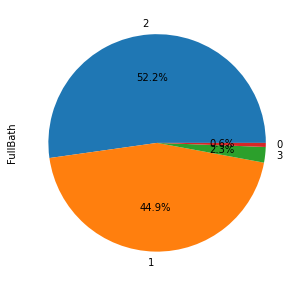

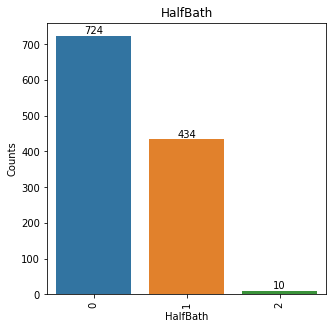

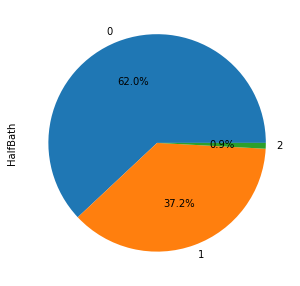

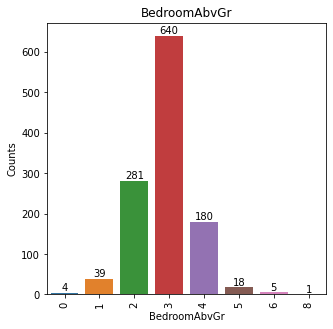

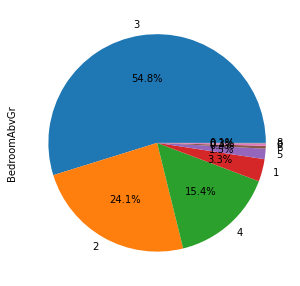

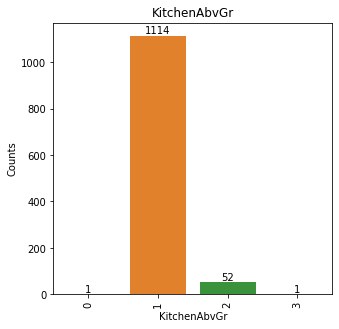

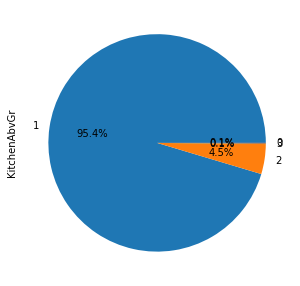

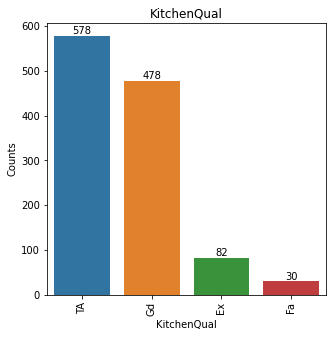

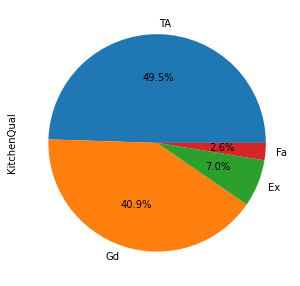

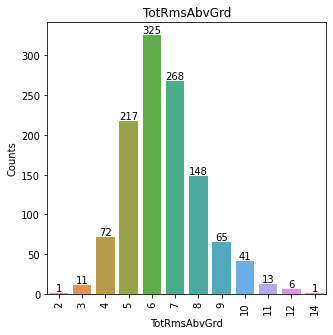

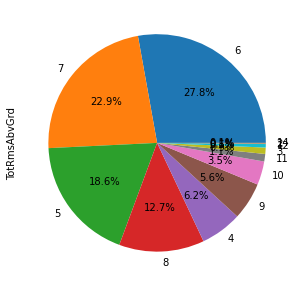

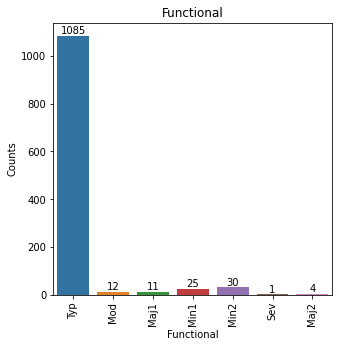

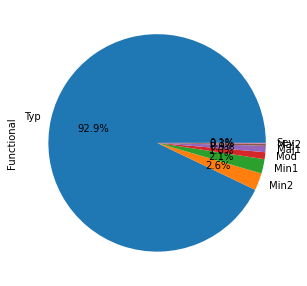

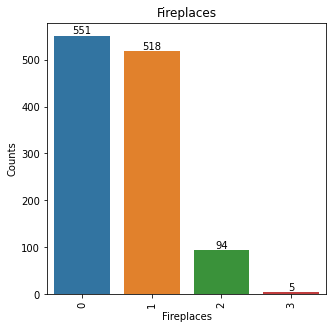

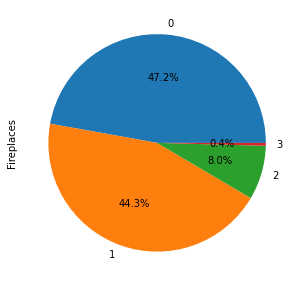

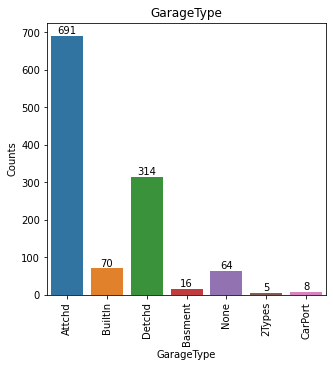

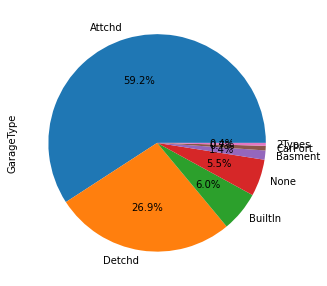

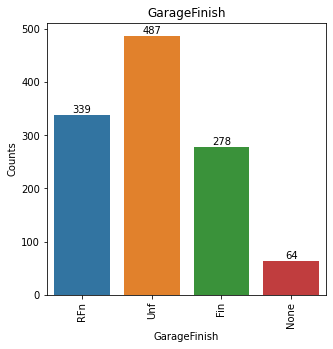

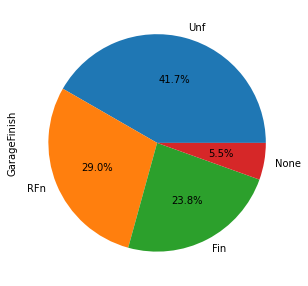

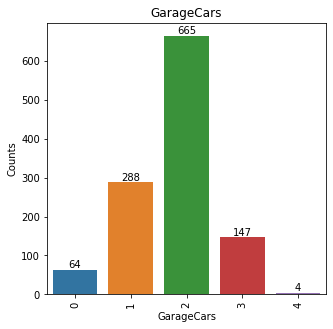

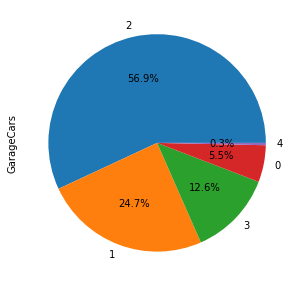

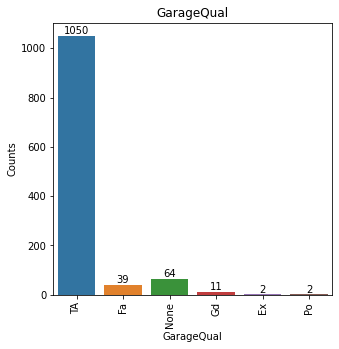

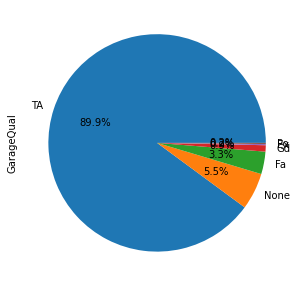

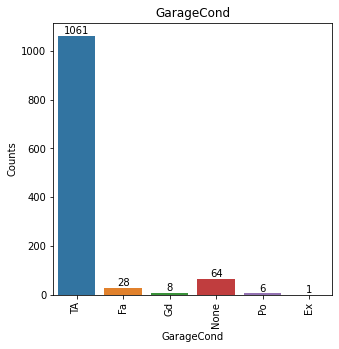

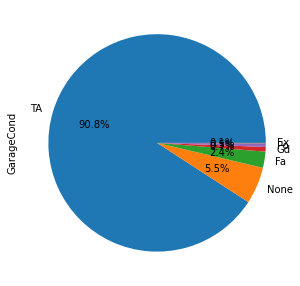

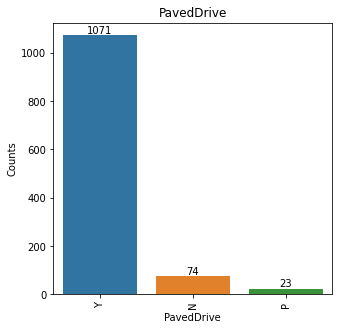

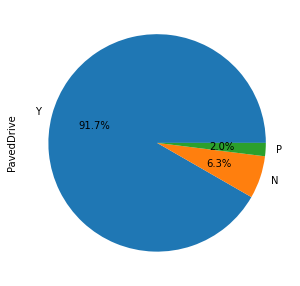

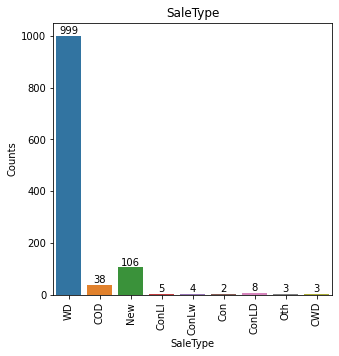

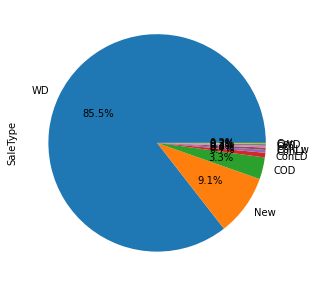

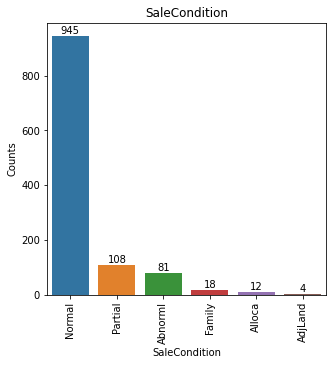

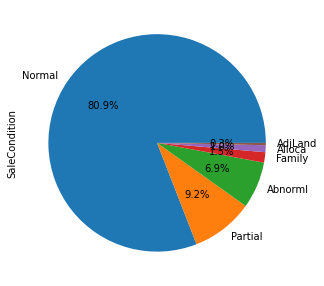

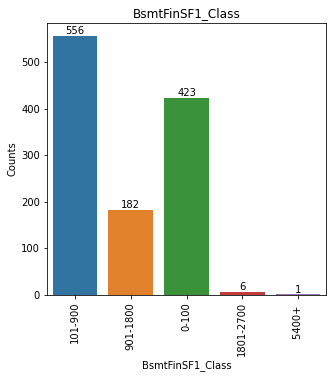

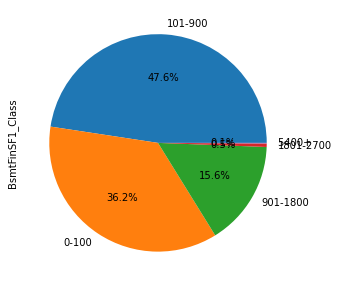

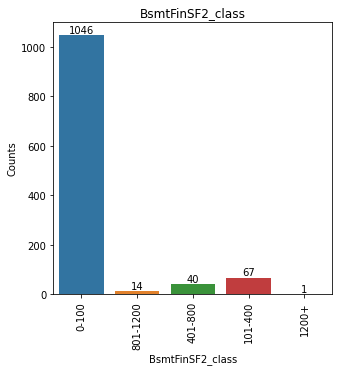

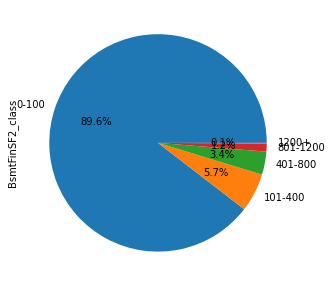

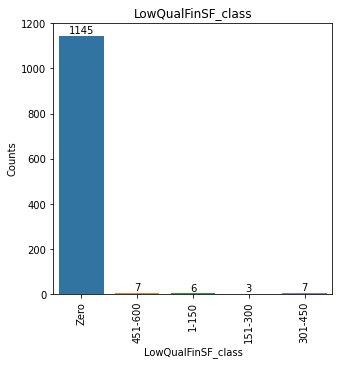

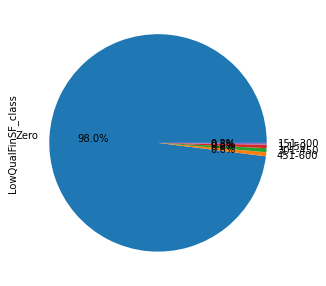

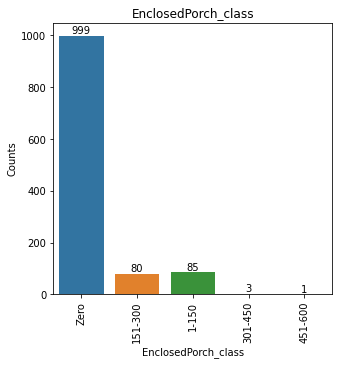

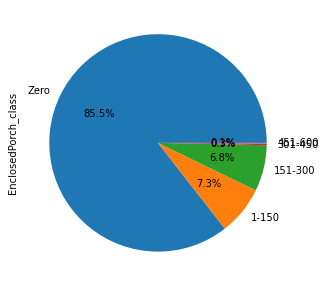

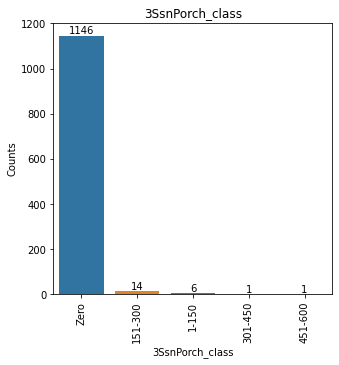

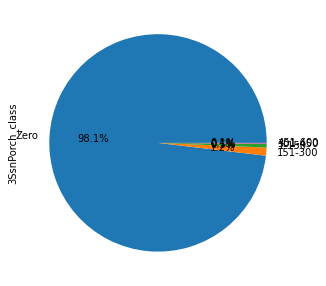

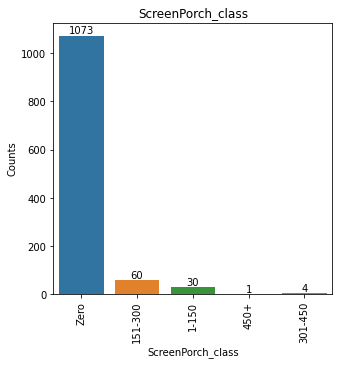

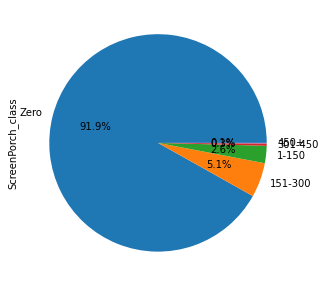

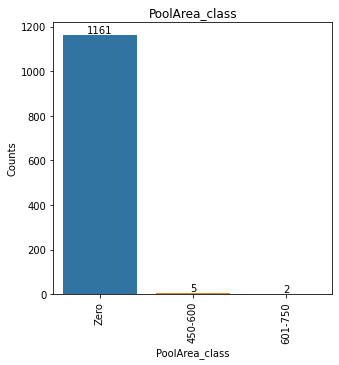

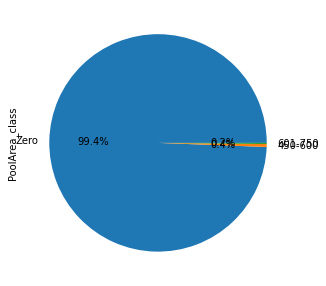

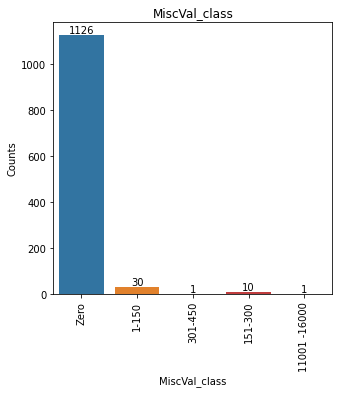

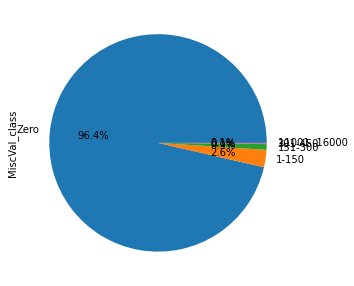

In [90]:
for i in obj:
    graph = df_train[i].value_counts()
    plt.figure(figsize = (5,5))
    df_graph = sns.countplot(x=i, data = df_train)
    df_graph.set_title(i)
    df_graph.set_xlabel(i)
    df_graph.set_ylabel('Counts')
    plt.xticks(rotation = 90)
    for j in df_graph.containers:
        df_graph.bar_label(j)

    # Percentage of graphs
    plt.figure(figsize = (5,5))
    graph.plot(kind = 'pie', autopct = '%1.1f%%')

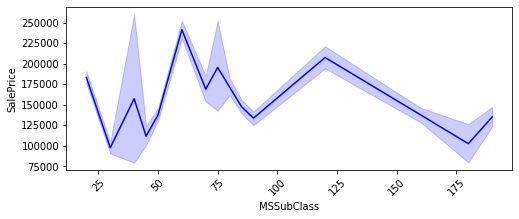

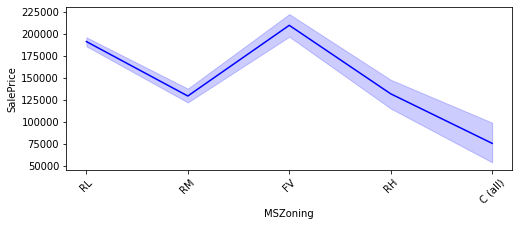

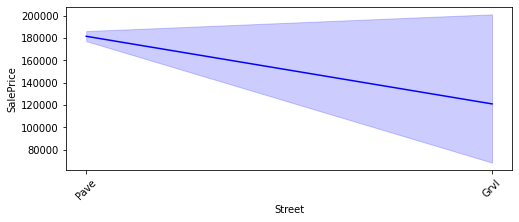

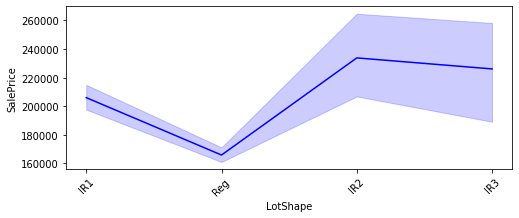

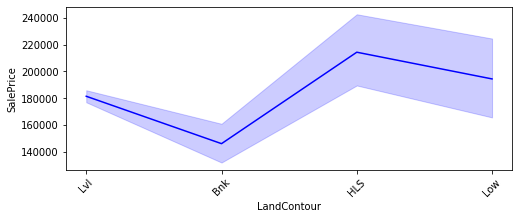

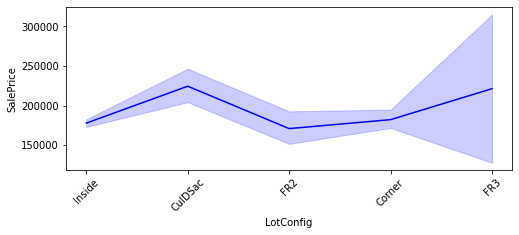

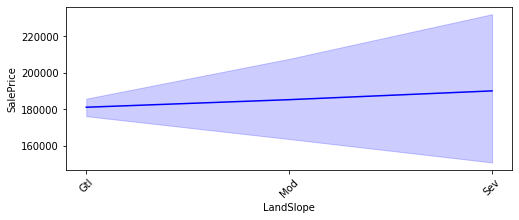

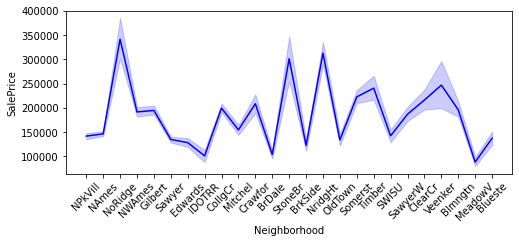

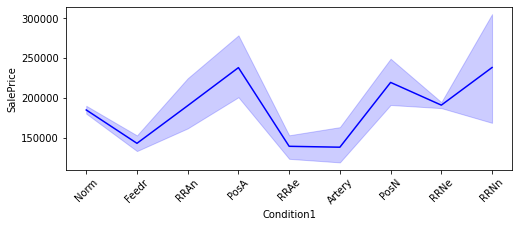

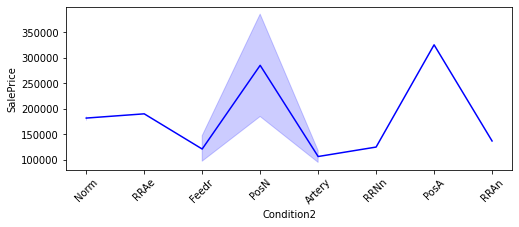

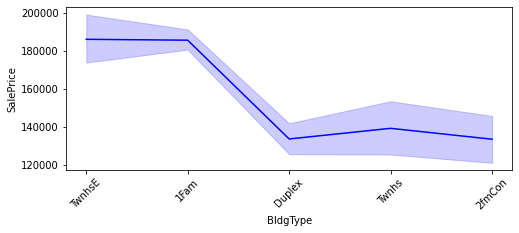

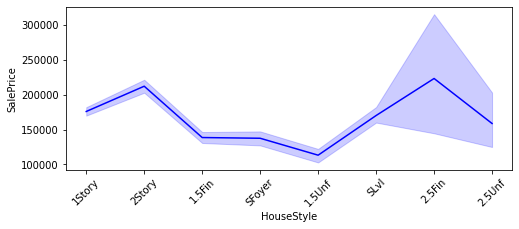

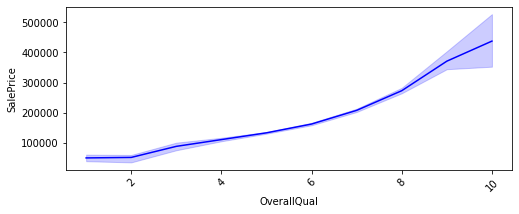

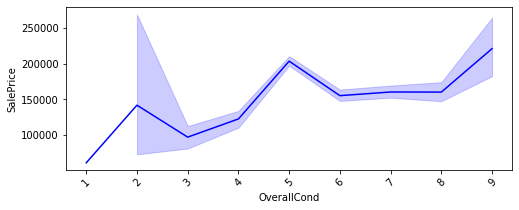

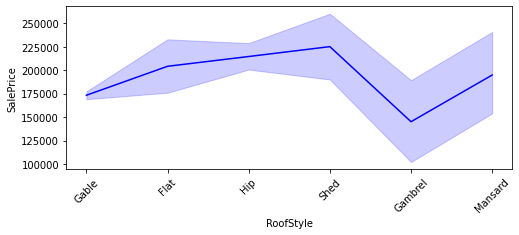

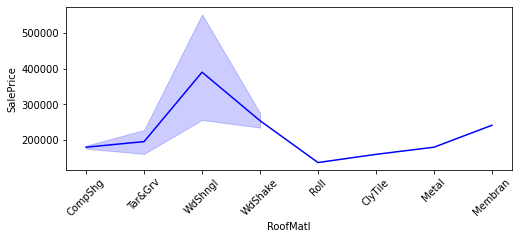

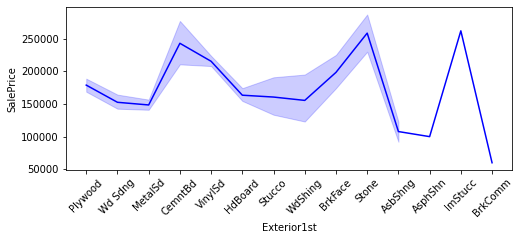

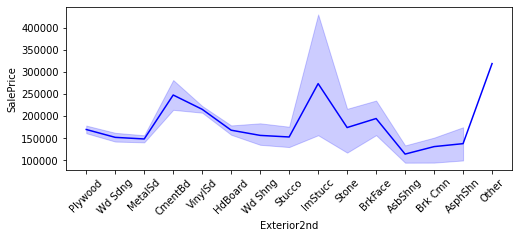

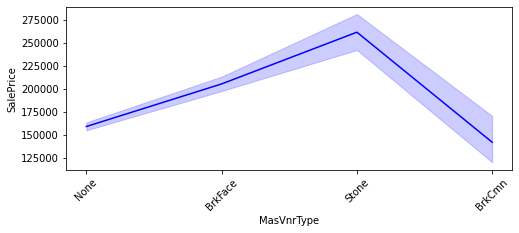

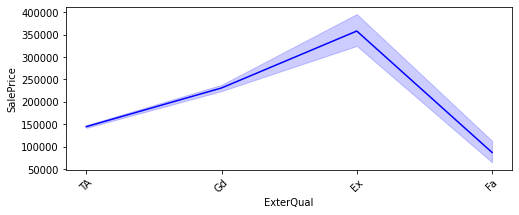

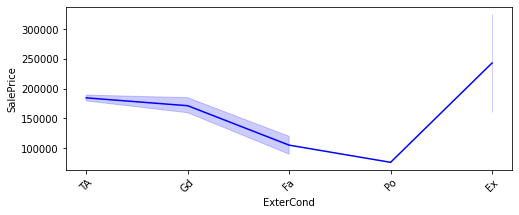

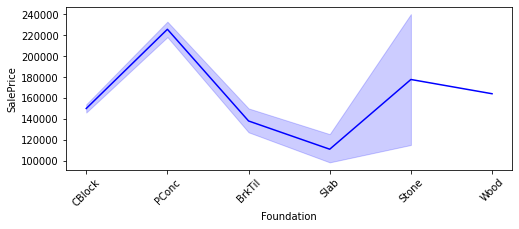

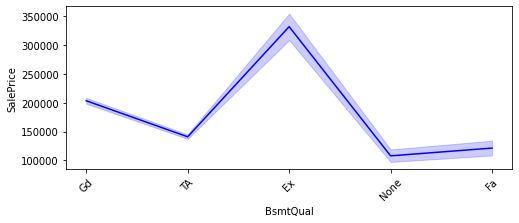

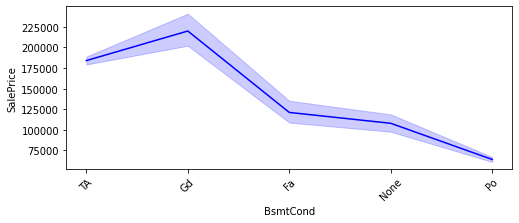

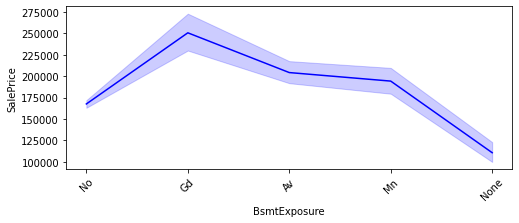

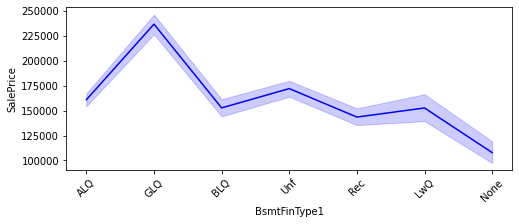

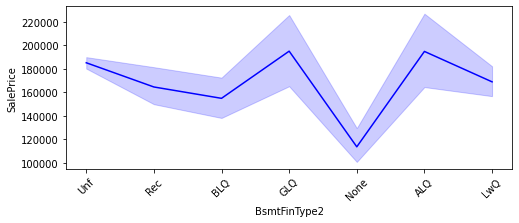

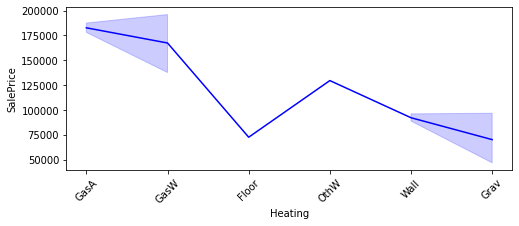

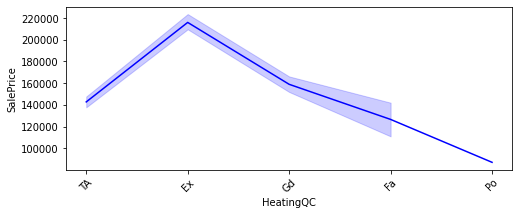

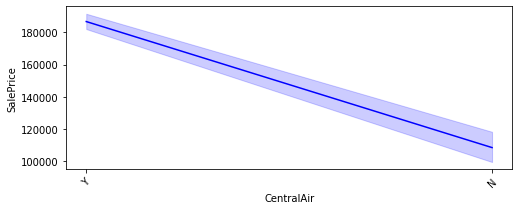

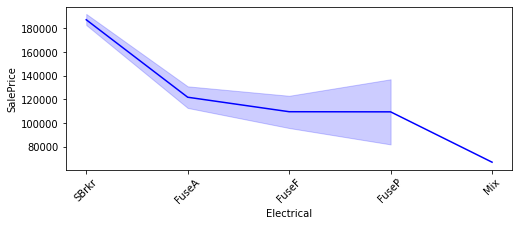

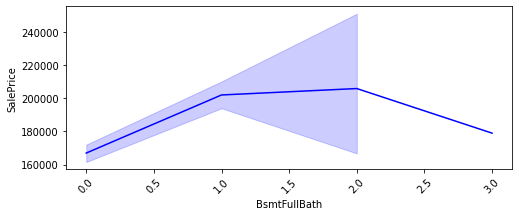

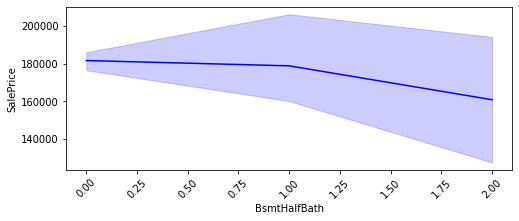

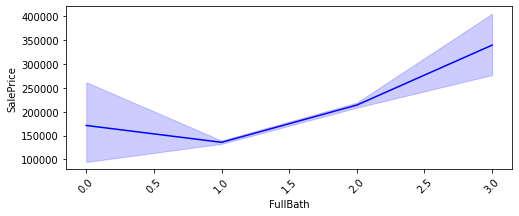

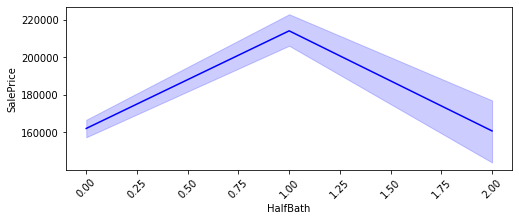

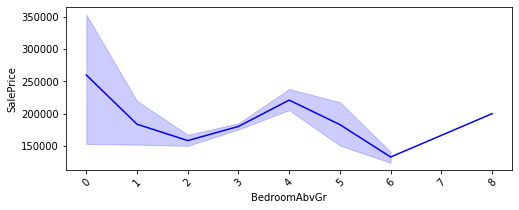

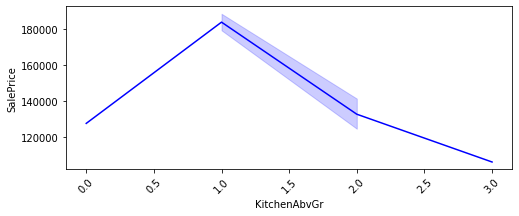

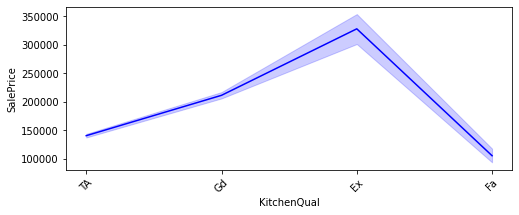

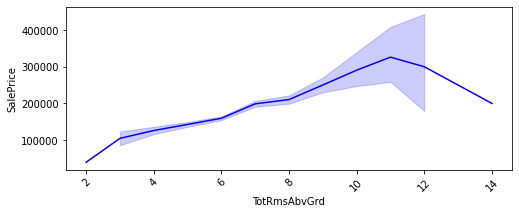

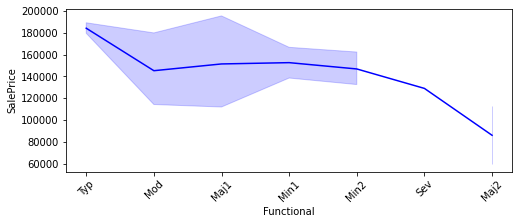

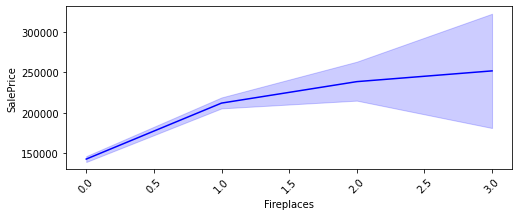

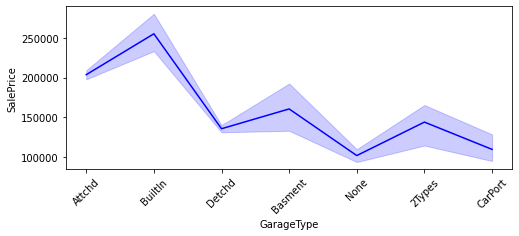

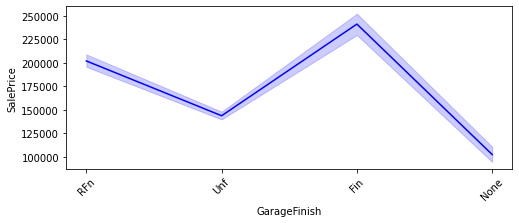

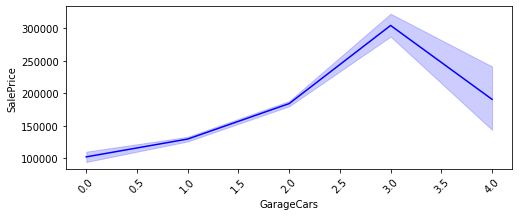

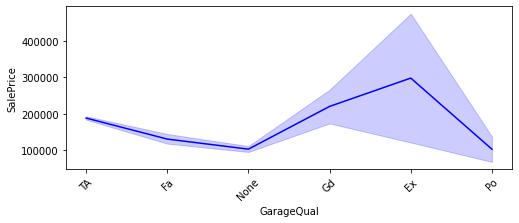

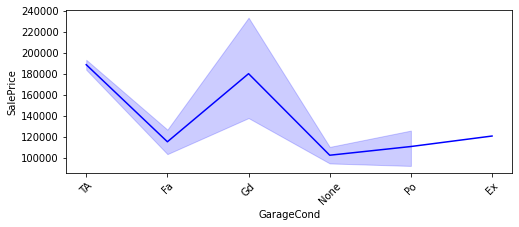

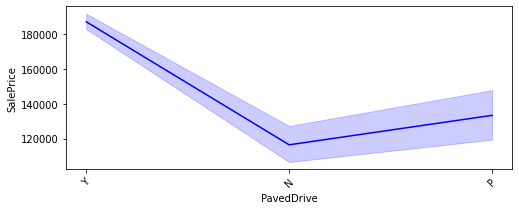

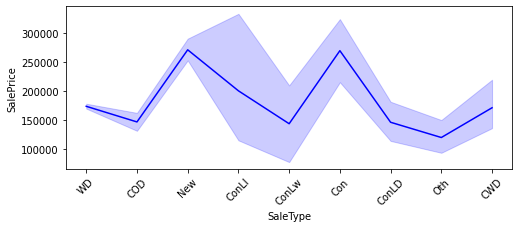

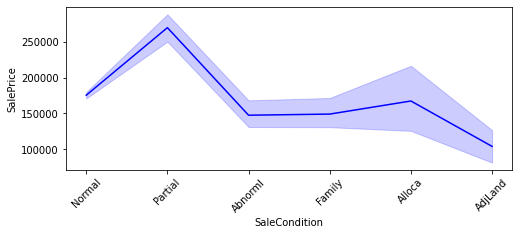

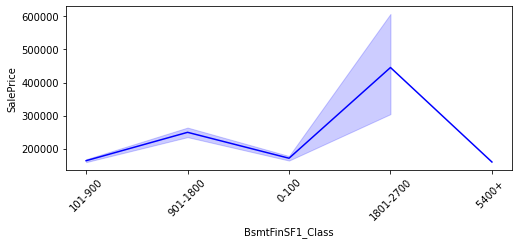

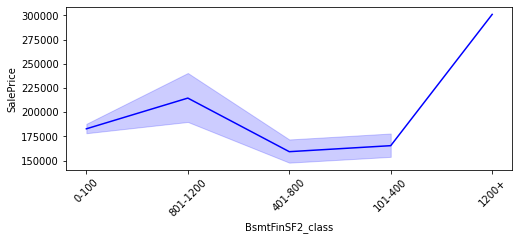

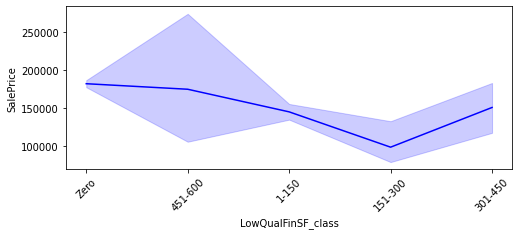

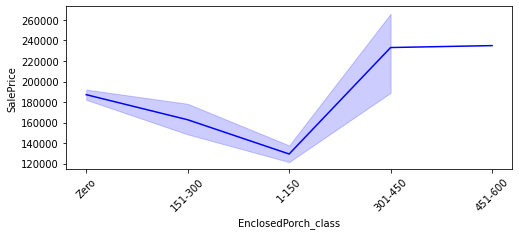

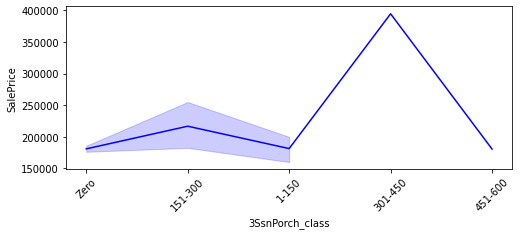

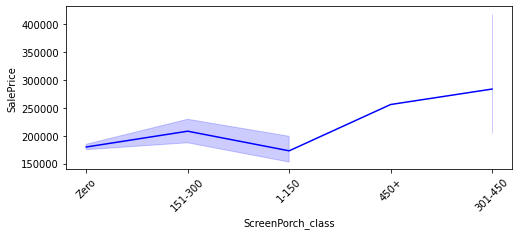

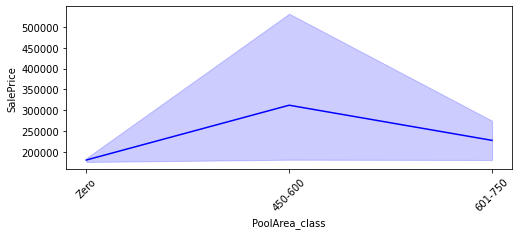

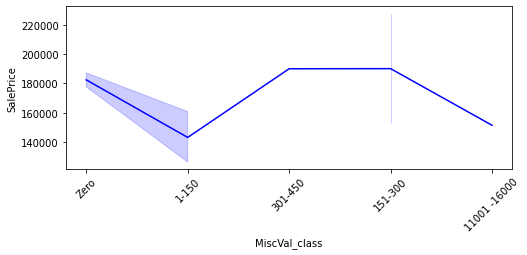

In [85]:
for i in obj:
    plt.figure(figsize=(8,3))
    sns.lineplot(x = i, y = 'SalePrice', data = df_train, color='blue')
    plt.xticks(rotation = 45)
    plt.show()


 -------------------------------------MSSubClass-------------------------------------


<Figure size 360x144 with 0 Axes>

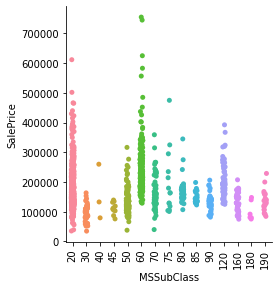


 -------------------------------------MSZoning-------------------------------------


<Figure size 360x144 with 0 Axes>

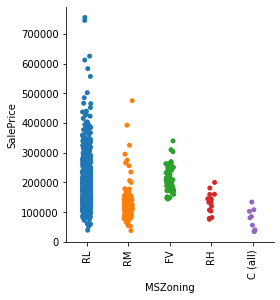


 -------------------------------------Street-------------------------------------


<Figure size 360x144 with 0 Axes>

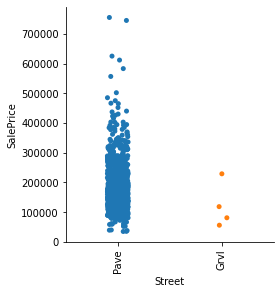


 -------------------------------------LotShape-------------------------------------


<Figure size 360x144 with 0 Axes>

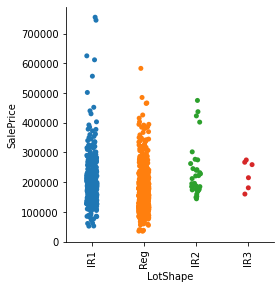


 -------------------------------------LandContour-------------------------------------


<Figure size 360x144 with 0 Axes>

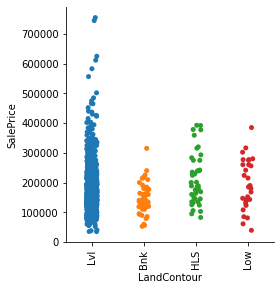


 -------------------------------------LotConfig-------------------------------------


<Figure size 360x144 with 0 Axes>

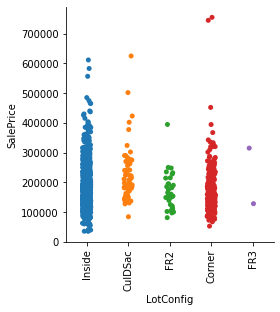


 -------------------------------------LandSlope-------------------------------------


<Figure size 360x144 with 0 Axes>

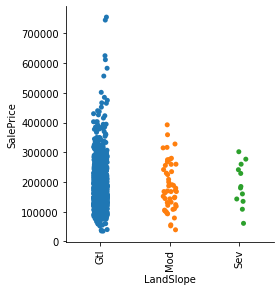


 -------------------------------------Neighborhood-------------------------------------


<Figure size 360x144 with 0 Axes>

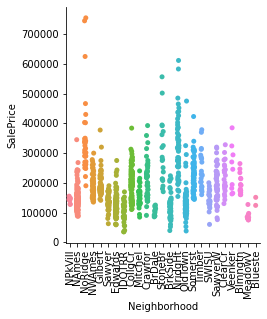


 -------------------------------------Condition1-------------------------------------


<Figure size 360x144 with 0 Axes>

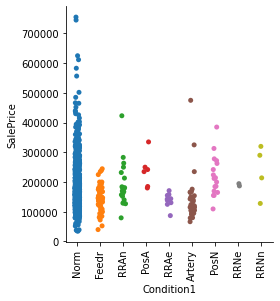


 -------------------------------------Condition2-------------------------------------


<Figure size 360x144 with 0 Axes>

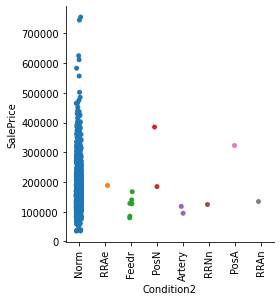


 -------------------------------------BldgType-------------------------------------


<Figure size 360x144 with 0 Axes>

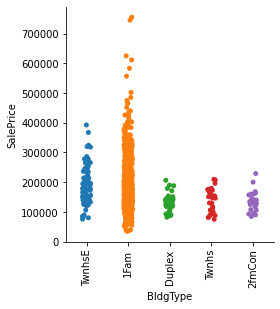


 -------------------------------------HouseStyle-------------------------------------


<Figure size 360x144 with 0 Axes>

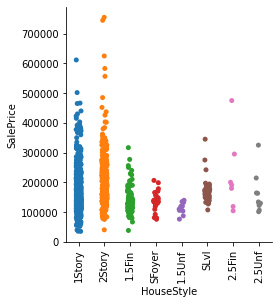


 -------------------------------------RoofStyle-------------------------------------


<Figure size 360x144 with 0 Axes>

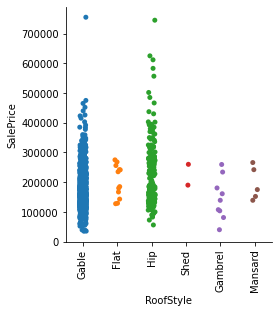


 -------------------------------------RoofMatl-------------------------------------


<Figure size 360x144 with 0 Axes>

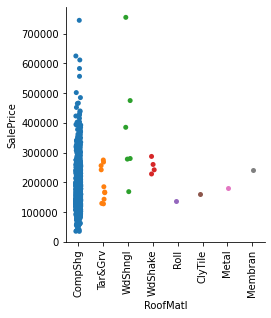


 -------------------------------------Exterior1st-------------------------------------


<Figure size 360x144 with 0 Axes>

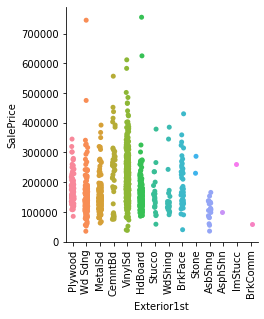


 -------------------------------------Exterior2nd-------------------------------------


<Figure size 360x144 with 0 Axes>

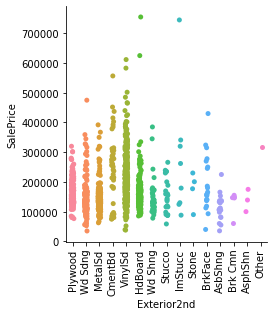


 -------------------------------------MasVnrType-------------------------------------


<Figure size 360x144 with 0 Axes>

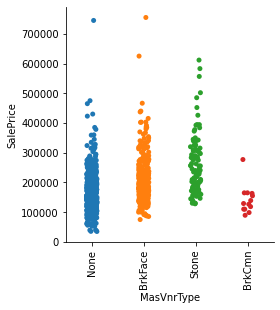


 -------------------------------------ExterQual-------------------------------------


<Figure size 360x144 with 0 Axes>

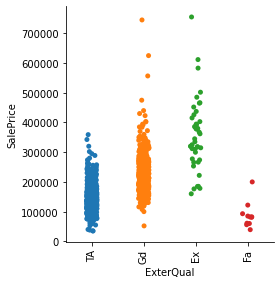


 -------------------------------------ExterCond-------------------------------------


<Figure size 360x144 with 0 Axes>

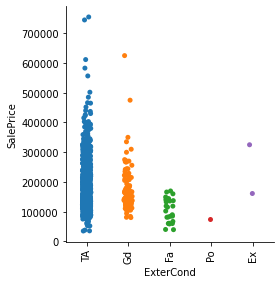


 -------------------------------------Foundation-------------------------------------


<Figure size 360x144 with 0 Axes>

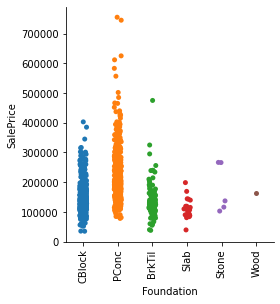


 -------------------------------------BsmtQual-------------------------------------


<Figure size 360x144 with 0 Axes>

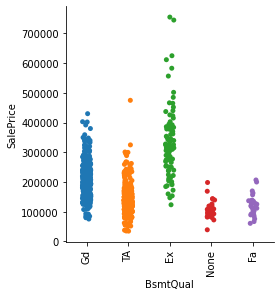


 -------------------------------------BsmtCond-------------------------------------


<Figure size 360x144 with 0 Axes>

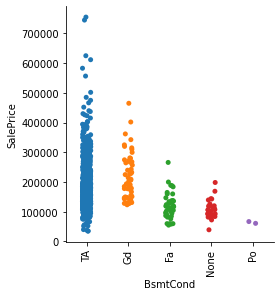


 -------------------------------------BsmtExposure-------------------------------------


<Figure size 360x144 with 0 Axes>

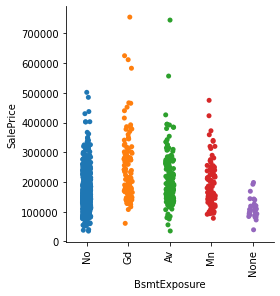


 -------------------------------------BsmtFinType1-------------------------------------


<Figure size 360x144 with 0 Axes>

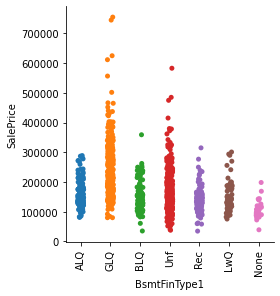


 -------------------------------------BsmtFinType2-------------------------------------


<Figure size 360x144 with 0 Axes>

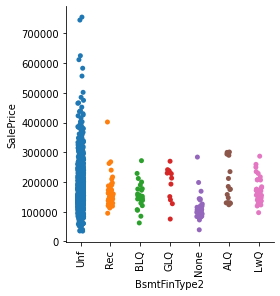


 -------------------------------------Heating-------------------------------------


<Figure size 360x144 with 0 Axes>

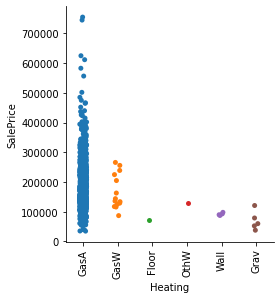


 -------------------------------------HeatingQC-------------------------------------


<Figure size 360x144 with 0 Axes>

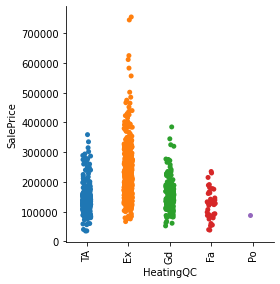


 -------------------------------------CentralAir-------------------------------------


<Figure size 360x144 with 0 Axes>

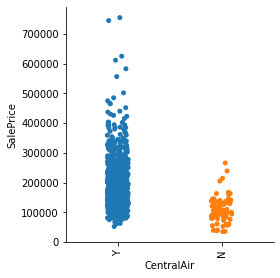


 -------------------------------------Electrical-------------------------------------


<Figure size 360x144 with 0 Axes>

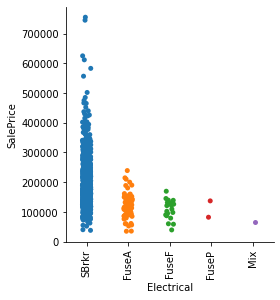


 -------------------------------------KitchenQual-------------------------------------


<Figure size 360x144 with 0 Axes>

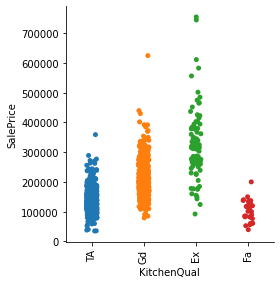


 -------------------------------------Functional-------------------------------------


<Figure size 360x144 with 0 Axes>

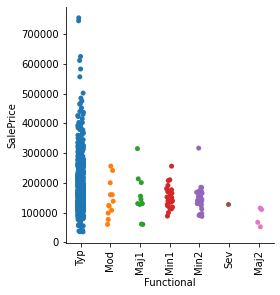


 -------------------------------------GarageType-------------------------------------


<Figure size 360x144 with 0 Axes>

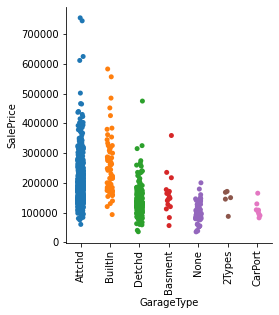


 -------------------------------------GarageFinish-------------------------------------


<Figure size 360x144 with 0 Axes>

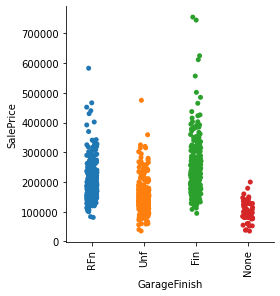


 -------------------------------------GarageQual-------------------------------------


<Figure size 360x144 with 0 Axes>

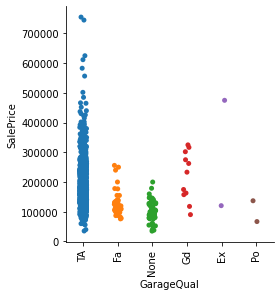


 -------------------------------------GarageCond-------------------------------------


<Figure size 360x144 with 0 Axes>

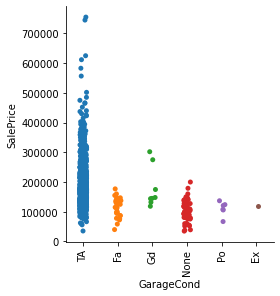


 -------------------------------------PavedDrive-------------------------------------


<Figure size 360x144 with 0 Axes>

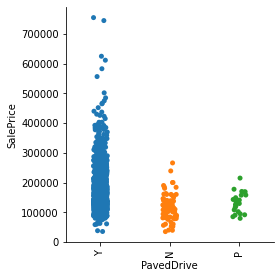


 -------------------------------------SaleType-------------------------------------


<Figure size 360x144 with 0 Axes>

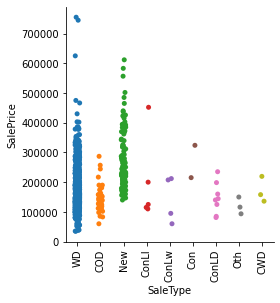


 -------------------------------------SaleCondition-------------------------------------


<Figure size 360x144 with 0 Axes>

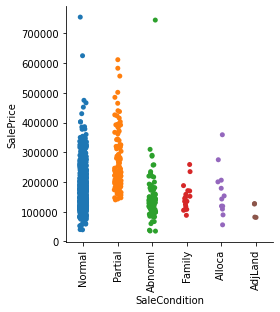


 -------------------------------------BsmtFinSF1_Class-------------------------------------


<Figure size 360x144 with 0 Axes>

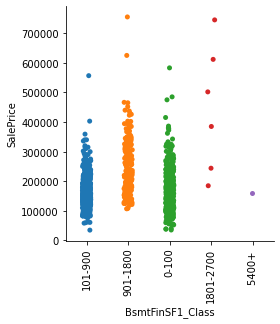


 -------------------------------------BsmtFinSF2_class-------------------------------------


<Figure size 360x144 with 0 Axes>

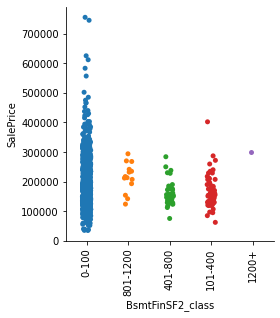


 -------------------------------------LowQualFinSF_class-------------------------------------


<Figure size 360x144 with 0 Axes>

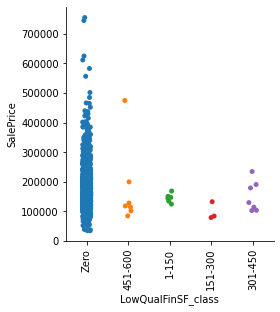


 -------------------------------------EnclosedPorch_class-------------------------------------


<Figure size 360x144 with 0 Axes>

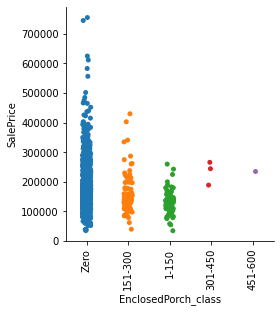


 -------------------------------------3SsnPorch_class-------------------------------------


<Figure size 360x144 with 0 Axes>

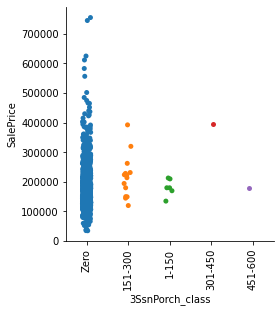


 -------------------------------------ScreenPorch_class-------------------------------------


<Figure size 360x144 with 0 Axes>

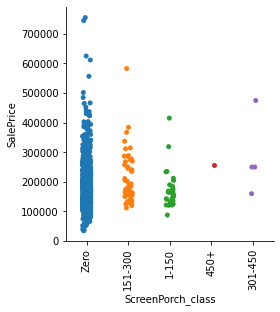


 -------------------------------------PoolArea_class-------------------------------------


<Figure size 360x144 with 0 Axes>

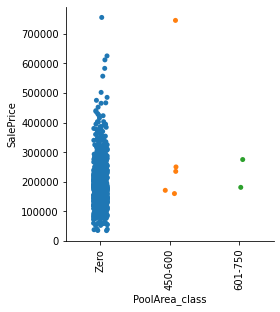


 -------------------------------------MiscVal_class-------------------------------------


<Figure size 360x144 with 0 Axes>

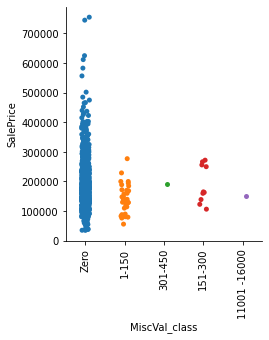

In [86]:
for i in df_train.select_dtypes(exclude = ['float', 'int']).columns:
    print("\n",'-------------------------------------'+i+ '-------------------------------------')
    plt.figure(figsize=(5,2))
    sns.catplot(x= i, y = 'SalePrice' ,data = df_train, height = 4, aspect = 1)
    plt.xticks(rotation = 90)
    plt.show()

### Bivariate Analysis

In [87]:
# for i in range(len(df_train_num)):
#     for j in df_train_num[i+1:]:
#         plt.figure()
#         sns.scatterplot(df_train[df_train_num[i]], df_train[j])

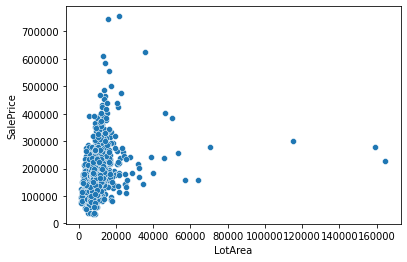

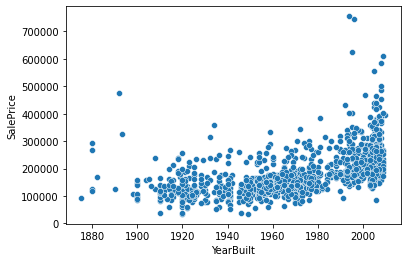

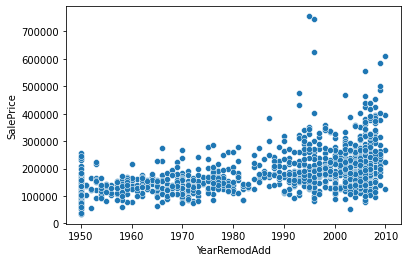

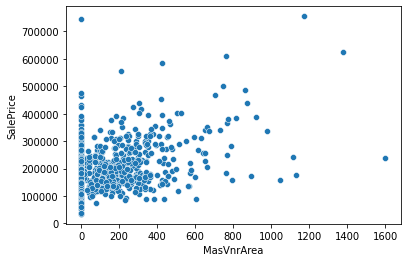

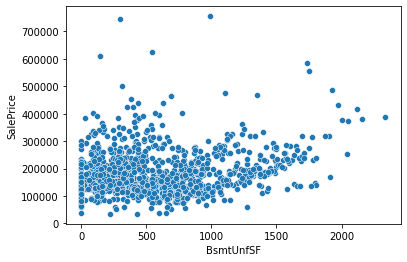

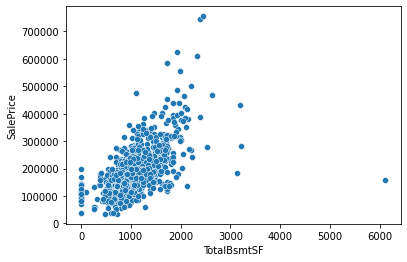

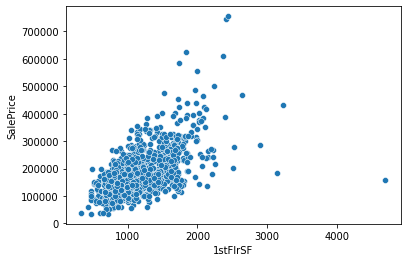

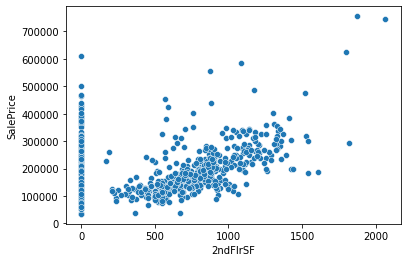

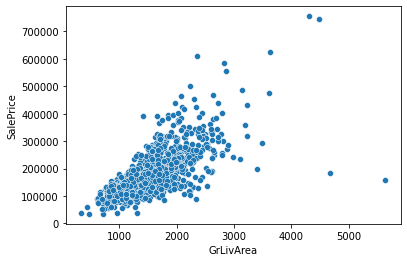

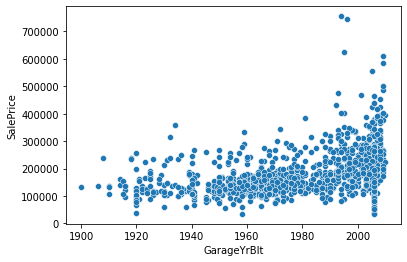

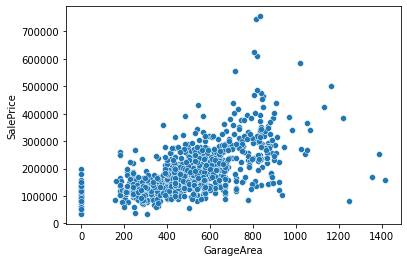

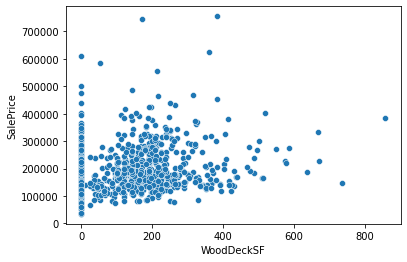

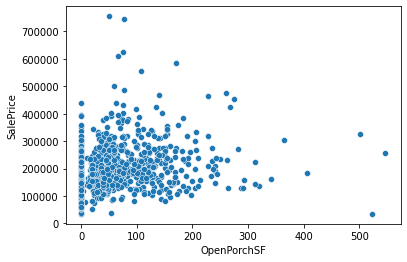

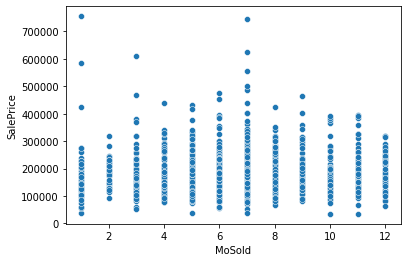

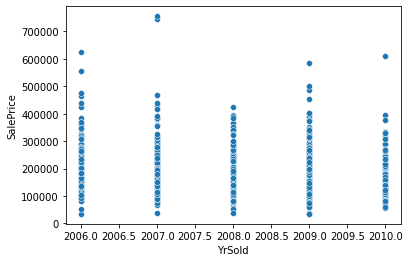

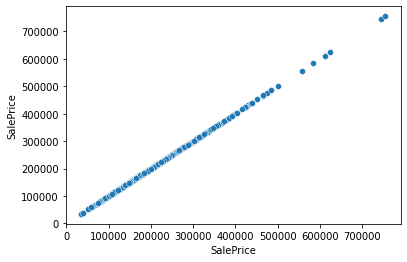

In [88]:
for i in num:
    sns.scatterplot(x = i, y = 'SalePrice', data = df_train)
    plt.show()

### Violin Plot

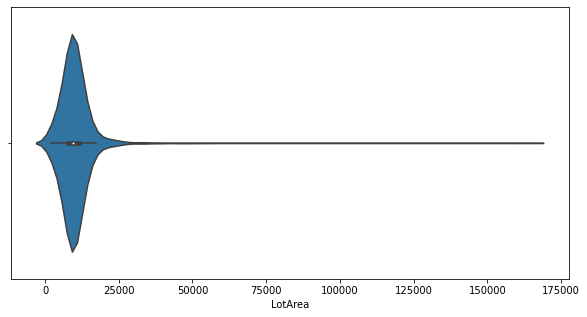

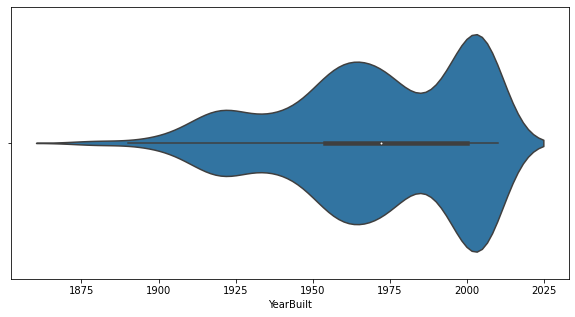

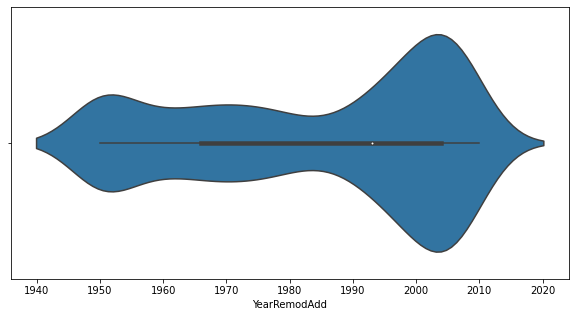

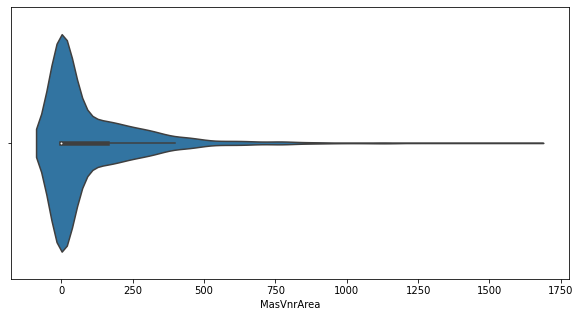

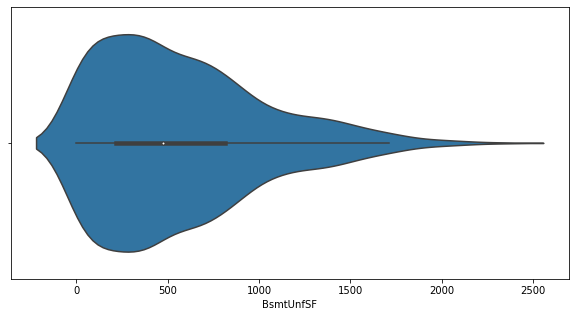

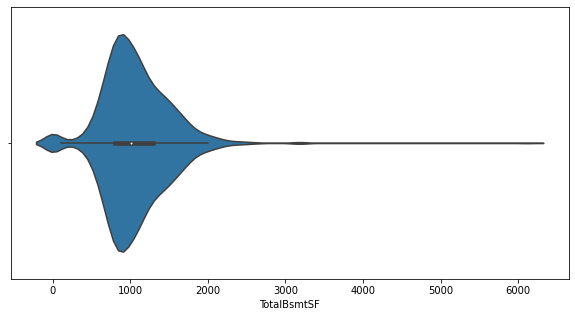

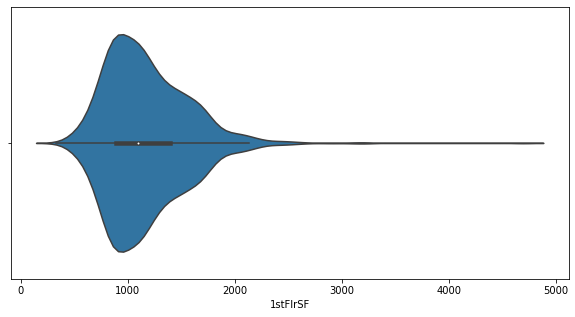

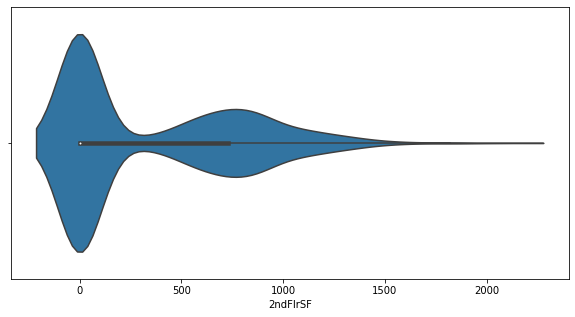

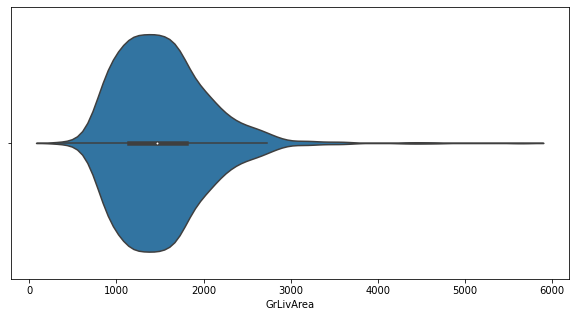

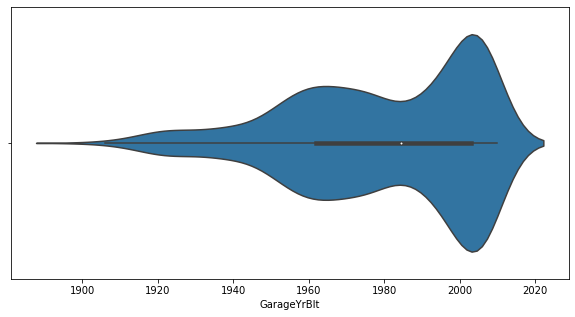

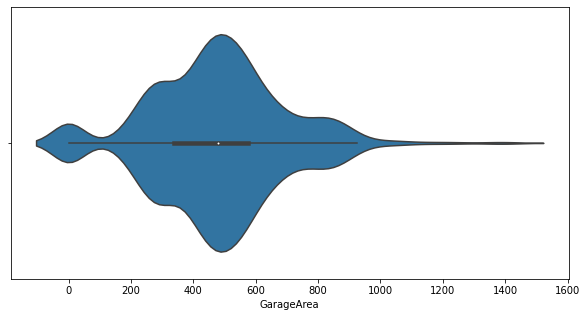

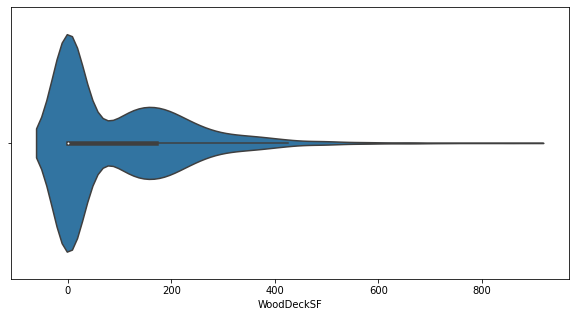

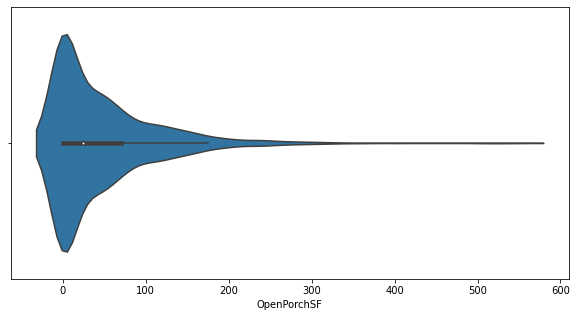

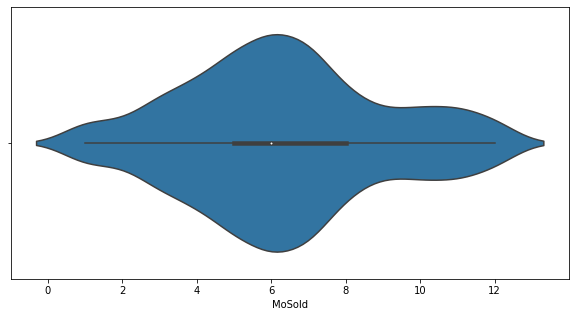

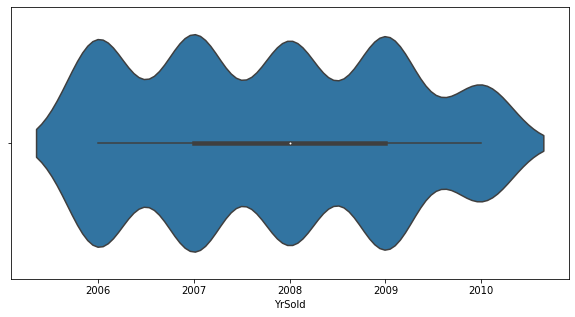

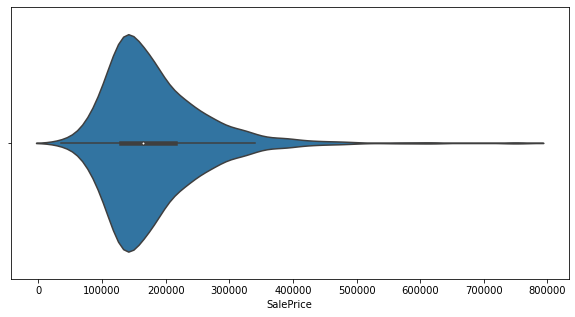

In [89]:
for i in num:
    plt.figure(figsize = (10,5))
    sns.violinplot(df_train[i] , data = df_train)
    
    
# checking spreading density of the data

#### Distribution Plot

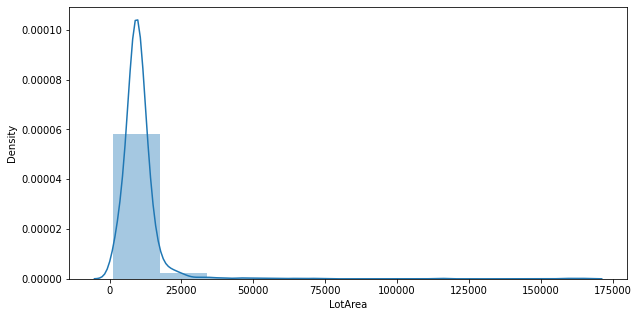

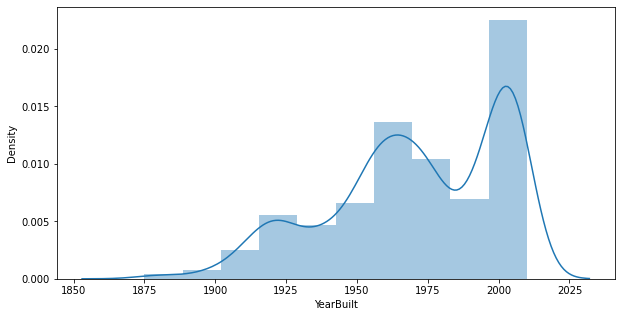

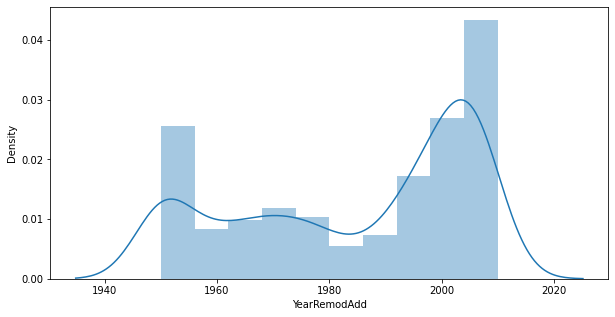

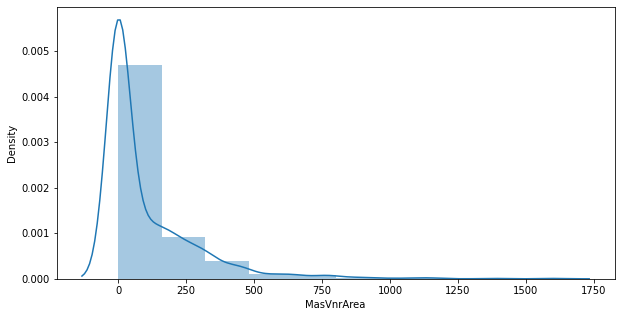

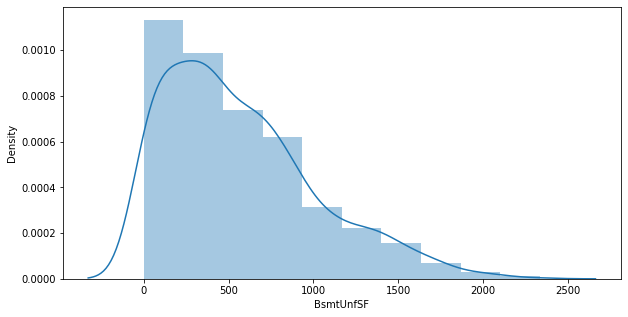

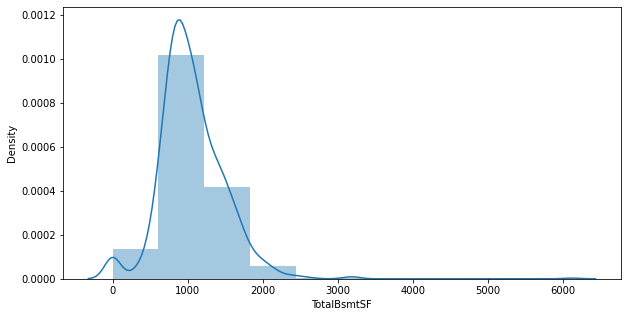

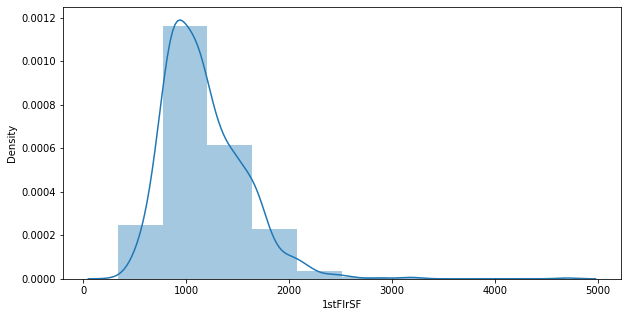

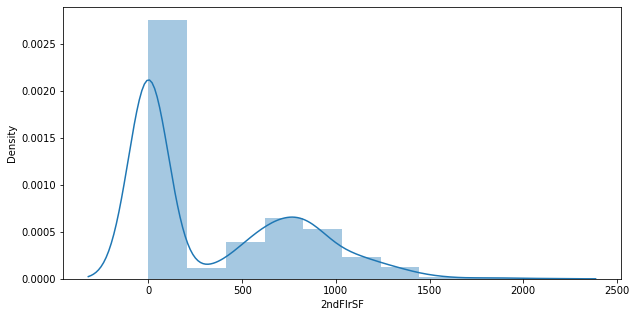

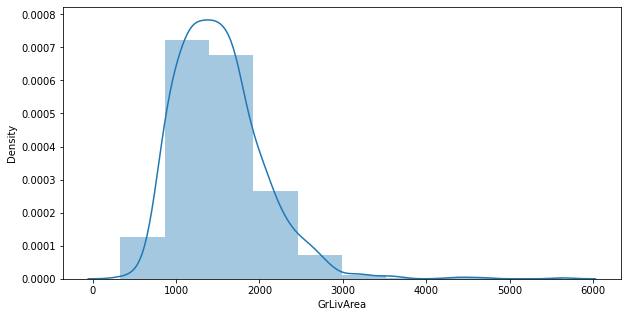

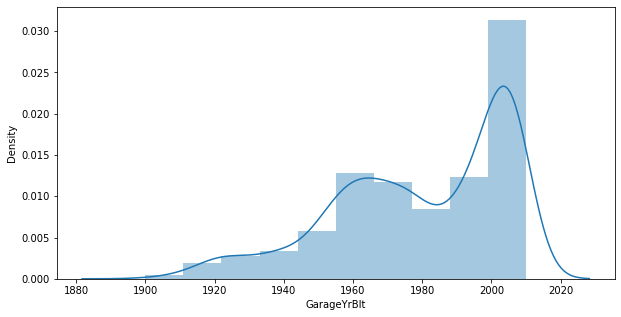

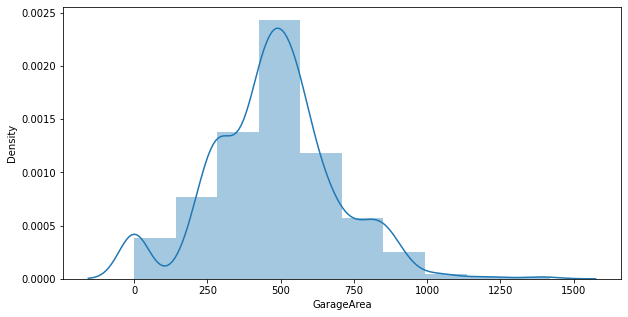

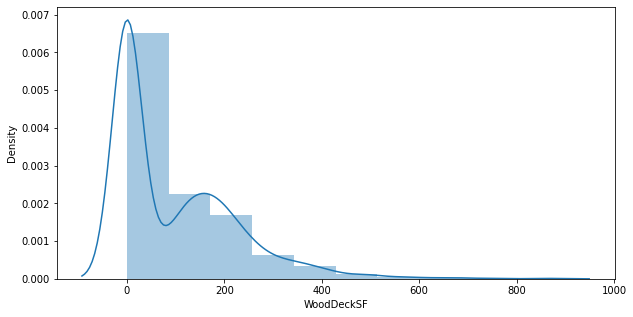

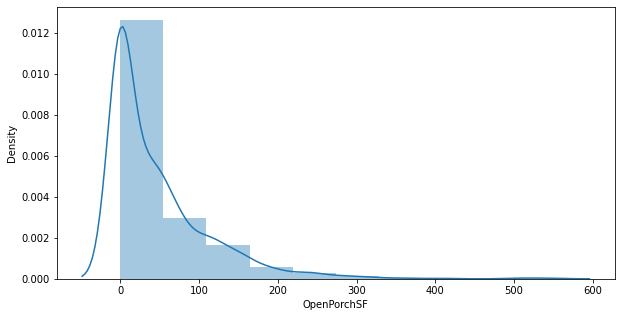

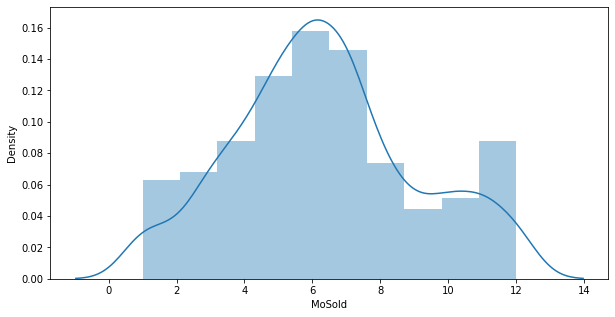

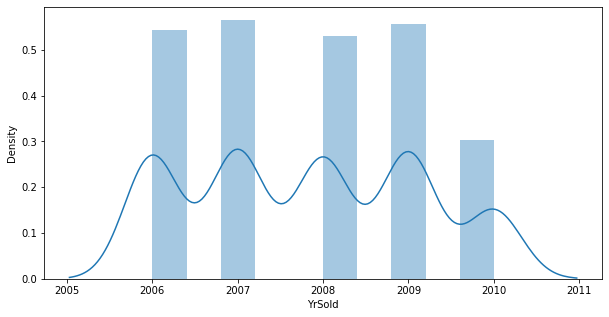

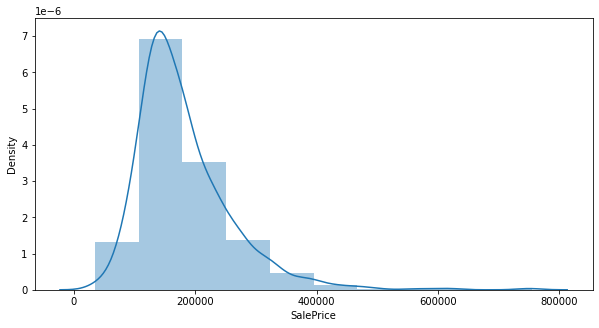

In [90]:
for i in num:
    plt.figure(figsize = (10,5))
    sns.distplot(df_train[i] , bins = 10)
    
    
# checking spreading distribution of the data

### Checking Outliers

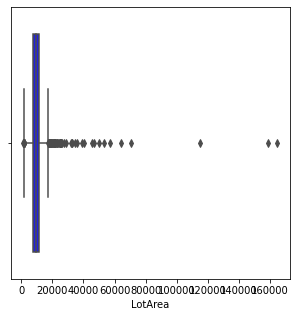

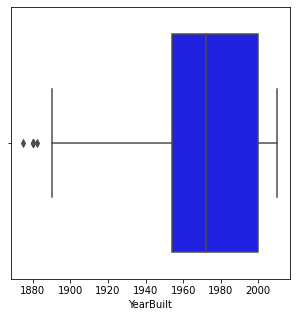

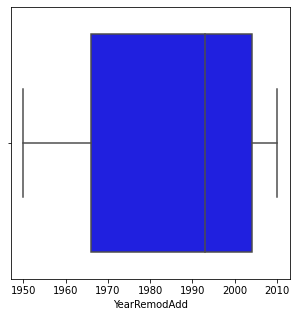

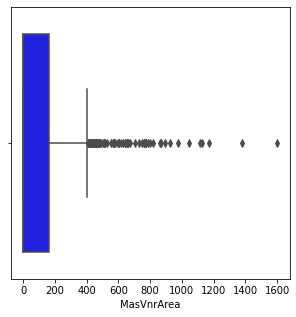

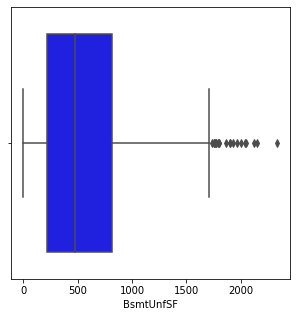

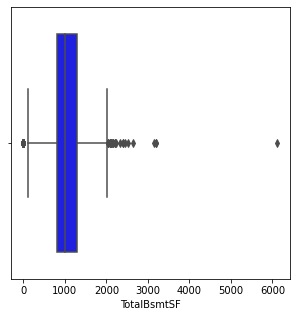

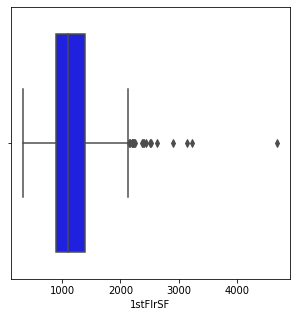

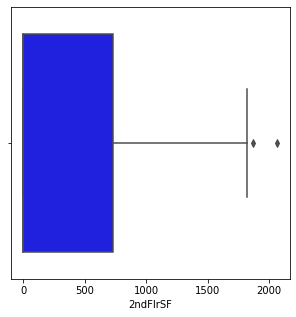

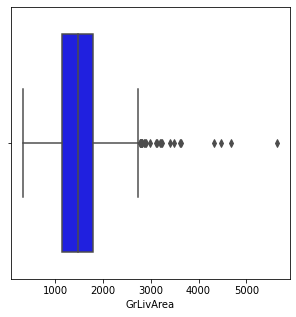

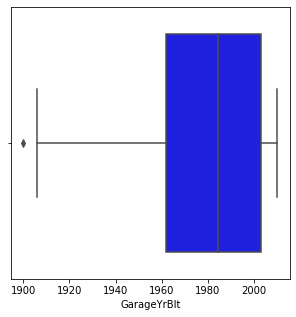

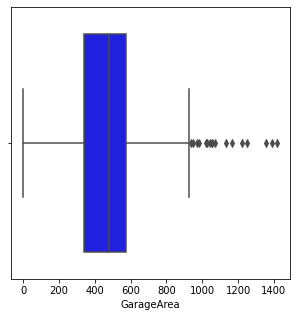

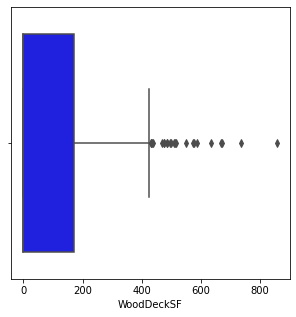

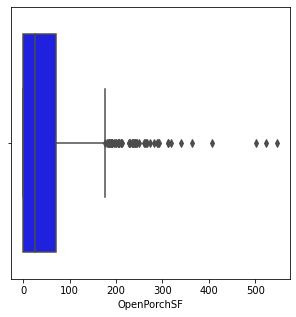

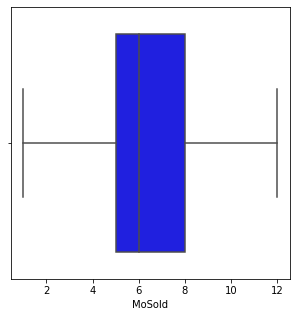

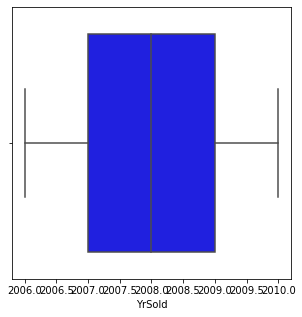

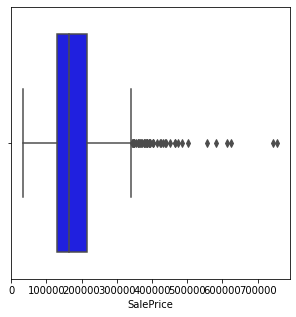

In [91]:
for i in num:
    plt.figure(figsize = (5,5))
    sns.boxplot(df_train[i], orient='v', color='blue')

### Checking Skewness

In [92]:
df_train[num].skew().sort_values()

GarageYrBlt     -0.708074
YearBuilt       -0.579204
YearRemodAdd    -0.495864
YrSold           0.115765
GarageArea       0.189665
MoSold           0.220979
2ndFlrSF         0.823479
BsmtUnfSF        0.909057
GrLivArea        1.449952
WoodDeckSF       1.504929
1stFlrSF         1.513707
TotalBsmtSF      1.744591
SalePrice        1.953878
OpenPorchSF      2.410840
MasVnrArea       2.835718
LotArea         10.659285
dtype: float64

<Figure size 72x36 with 0 Axes>

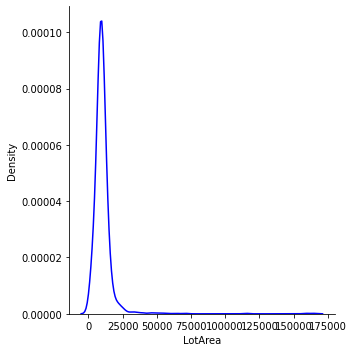

<Figure size 72x36 with 0 Axes>

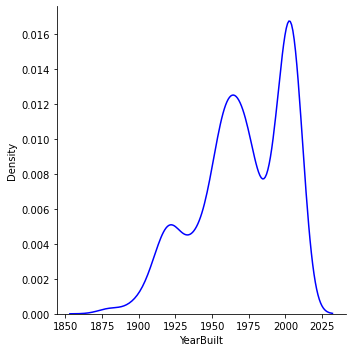

<Figure size 72x36 with 0 Axes>

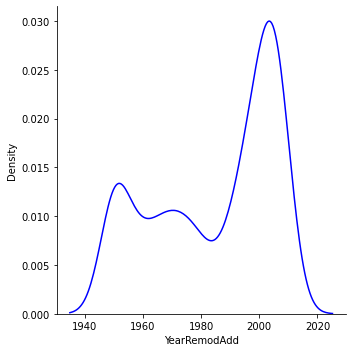

<Figure size 72x36 with 0 Axes>

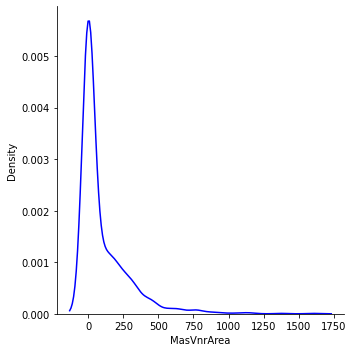

<Figure size 72x36 with 0 Axes>

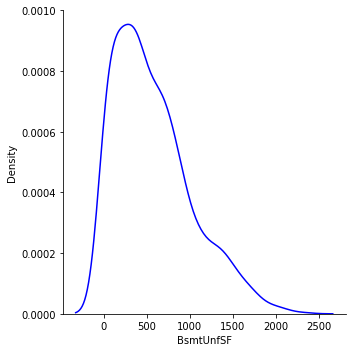

<Figure size 72x36 with 0 Axes>

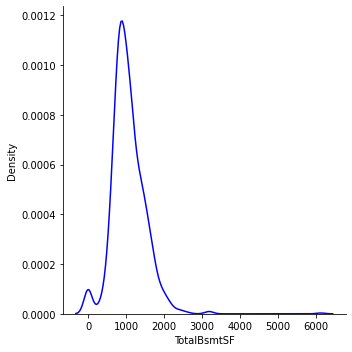

<Figure size 72x36 with 0 Axes>

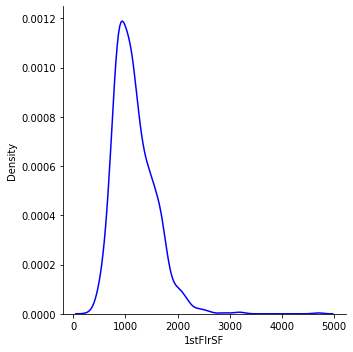

<Figure size 72x36 with 0 Axes>

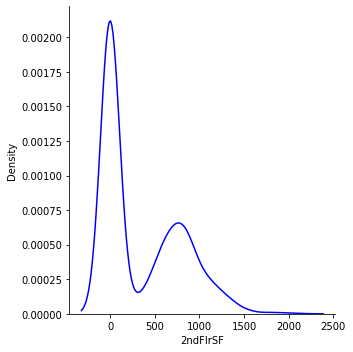

<Figure size 72x36 with 0 Axes>

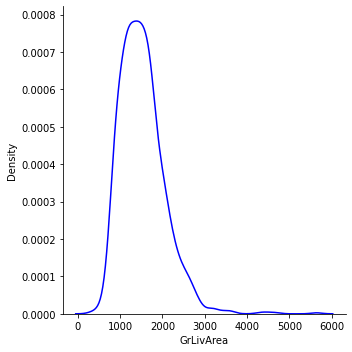

<Figure size 72x36 with 0 Axes>

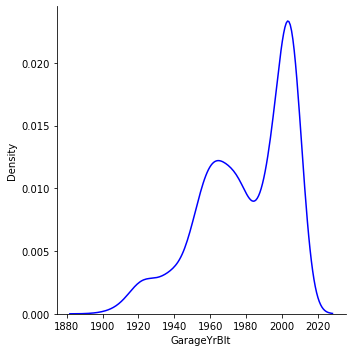

<Figure size 72x36 with 0 Axes>

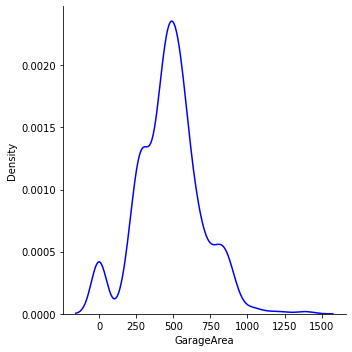

<Figure size 72x36 with 0 Axes>

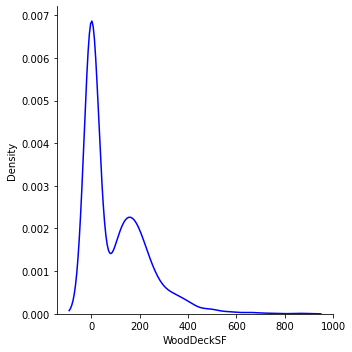

<Figure size 72x36 with 0 Axes>

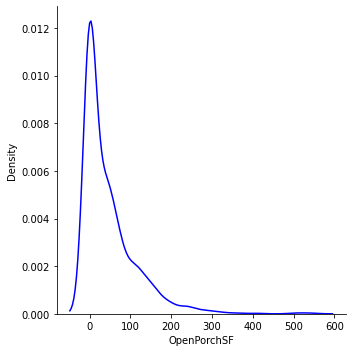

<Figure size 72x36 with 0 Axes>

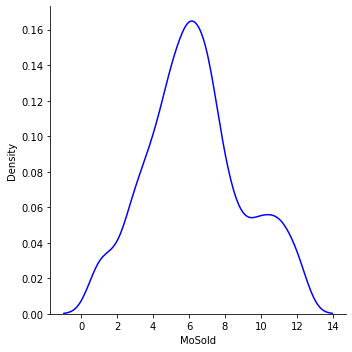

<Figure size 72x36 with 0 Axes>

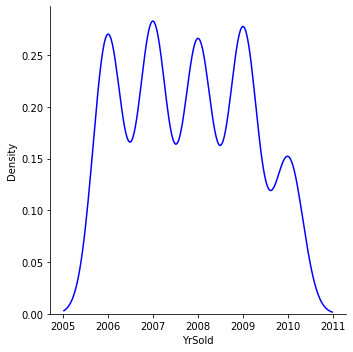

<Figure size 72x36 with 0 Axes>

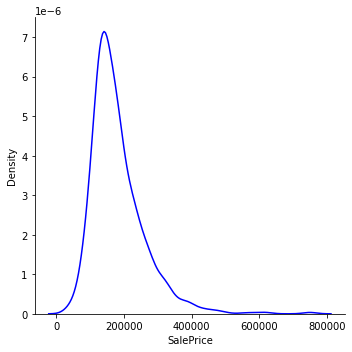

In [93]:
for i in num:
    plt.figure(figsize = (1,0.5))
    sns.displot(df_train[i], kind = 'kde', color = 'blue',)

### Checking Overall of the Dataset by Pairplot

In [184]:
# plt.figure(figsize = (15,15))
# sns.pairplot(df_train)

### Converting objects dataset into numerical form we are using Ordinal Encoder

In [95]:
from sklearn.preprocessing import OrdinalEncoder
onc = OrdinalEncoder()

In [96]:
for i in df_train.select_dtypes(include = 'object').columns:
    df_train[i] = onc.fit_transform(df_train[i].values.reshape(-1,1))
     
for i in df_test.select_dtypes(include = 'object').columns:
    df_test[i] = onc.fit_transform(df_test[i].values.reshape(-1,1))
     

In [97]:
df_train.head(1)

MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  LotConfig  \
0        11.0       3.0     4928     1.0       0.0          3.0        4.0   

   LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  \
0        0.0          13.0         2.0         2.0       4.0         2.0   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  \
0            6            5       1976          1976        1.0       1.0   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0          8.0          9.0         2.0         0.0        3.0        4.0   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
0         1.0       2.0       4.0           3.0           0.0           6.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        958         1078      1.0        4.0         1.0         4.0   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       958         0        958             0             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         0             2             1          3.0             5   

   Functional  Fireplaces  GarageType  GarageYrBlt  GarageFinish  GarageCars  \
0         6.0           1         1.0       1977.0           2.0           2   

   GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
0         440         5.0         5.0         2.0           0          205   

   MoSold  YrSold  SaleType  SaleCondition  SalePrice  BsmtFinSF1_Class  \
0       2    2007       8.0            4.0     128000               1.0   

   BsmtFinSF2_class  LowQualFinSF_class  EnclosedPorch_class  3SsnPorch_class  \
0               0.0                 4.0                  4.0              4.0   

   ScreenPorch_class  PoolArea_class  MiscVal_class  
0                4.0             2.0            4.0

### Removing Outliers from the Dataset

In [98]:
from scipy.stats import zscore

z = np.abs(zscore(df_train))

# taking thresold value = 3
#np.where(z>3)

df_train_z = df_train[(z<3).all(axis = 1)]

In [99]:
from scipy.stats import zscore

z1 = np.abs(zscore(df_test))

# taking thresold value = 3
#np.where(z>3)

df_test_z = df_test[(z1<3).all(axis = 1)]

In [100]:
# train
print(df_train_z.shape)
print(df_train.shape)
print("----------------")
# test
print(df_test_z.shape)
print(df_test.shape)

(468, 73)
(1168, 73)
----------------
(0, 72)
(292, 72)


In [101]:
percentage = round((1168 - 468)/1168*100,2)
print(percentage, "Percentage of data loss in train dataset")  


percentage = round((292 - 0)/292*100,2)
print(percentage, "Percentage of data loss in test dataset")  

59.93 Percentage of data loss in train dataset
100.0 Percentage of data loss in test dataset


### Removing Outliers with Interquartile Method

In [102]:
Q1 = df_train.quantile(.25)
Q3 = df_train.quantile(.75)
IQR = Q3 - Q1

In [103]:
df_train_IQR = df_train[~((df_train<(Q1 - 1.5*IQR)) | (df_train>(Q3 + 1.5*IQR))).any(axis = 1)]

In [104]:
df_train_IQR.shape

(101, 73)

In [105]:
percentage = round((1168 - 101)/1168*100,2)
print(percentage, "Percentage of data loss in train dataset")  


91.35 Percentage of data loss in train dataset


#### Removing Outlier methods shows very high data loss hence we are not considering it.

In [106]:
df_train.describe()

MSSubClass     MSZoning        LotArea       Street     LotShape  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean      4.166096     3.013699   10484.749144     0.996575     1.938356   
std       4.139986     0.633120    8957.442311     0.058445     1.412262   
min       0.000000     0.000000    1300.000000     0.000000     0.000000   
25%       0.000000     3.000000    7621.500000     1.000000     0.000000   
50%       4.000000     3.000000    9522.500000     1.000000     3.000000   
75%       6.000000     3.000000   11515.500000     1.000000     3.000000   
max      14.000000     4.000000  164660.000000     1.000000     3.000000   

       LandContour    LotConfig    LandSlope  Neighborhood   Condition1  \
count  1168.000000  1168.000000  1168.000000   1168.000000  1168.000000   
mean      2.773973     3.004281     0.064212     12.145548     2.032534   
std       0.710027     1.642667     0.284088      6.010364     0.871703   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       3.000000     2.000000     0.000000      7.000000     2.000000   
50%       3.000000     4.000000     0.000000     12.000000     2.000000   
75%       3.000000     4.000000     0.000000     17.000000     2.000000   
max       3.000000     4.000000     2.000000     24.000000     8.000000   

        Condition2     BldgType   HouseStyle  OverallQual  OverallCond  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      2.005993     0.476027     3.043664     6.104452     5.595890   
std       0.250035     1.180870     1.898625     1.390153     1.124343   
min       0.000000     0.000000     0.000000     1.000000     1.000000   
25%       2.000000     0.000000     2.000000     5.000000     5.000000   
50%       2.000000     0.000000     2.000000     6.000000     5.000000   
75%       2.000000     0.000000     5.000000     7.000000     6.000000   
max       7.000000     4.000000     7.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd    RoofStyle     RoofMatl  Exterior1st  \
count  1168.000000   1168.000000  1168.000000  1168.000000  1168.000000   
mean   1970.930651   1984.758562     1.402397     1.086473     8.659247   
std      30.145255     20.785185     0.832539     0.642848     3.097443   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1966.000000     1.000000     1.000000     7.000000   
50%    1972.000000   1993.000000     1.000000     1.000000    11.000000   
75%    2000.000000   2004.000000     1.000000     1.000000    11.000000   
max    2010.000000   2010.000000     5.000000     7.000000    13.000000   

       Exterior2nd   MasVnrType   MasVnrArea    ExterQual    ExterCond  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      9.363014     1.758562   101.696918     2.530822     3.725171   
std       3.462380     0.611174   182.218483     0.699425     0.744463   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       7.000000     1.000000     0.000000     2.000000     4.000000   
50%      11.000000     2.000000     0.000000     3.000000     4.000000   
75%      12.000000     2.000000   160.000000     3.000000     4.000000   
max      14.000000     3.000000  1600.000000     3.000000     4.000000   

        Foundation     BsmtQual     BsmtCond  BsmtExposure  BsmtFinType1  \
count  1168.000000  1168.000000  1168.000000   1168.000000   1168.000000   
mean      1.395548     2.725171     3.669521      2.299658      3.161815   
std       0.709379     1.272200     0.980720      1.172054      2.252375   
min       0.000000     0.000000     0.000000      0.000000      0.000000   
25%       1.000000     2.000000     4.000000      2.000000      1.000000   
50%       1.000000     2.000000     4.000000      3.000000      2.000000   
75%       2.000000     4.000000     4.000000      3.000000      6.000000   
max       5.000000     4.0000

<AxesSubplot:>

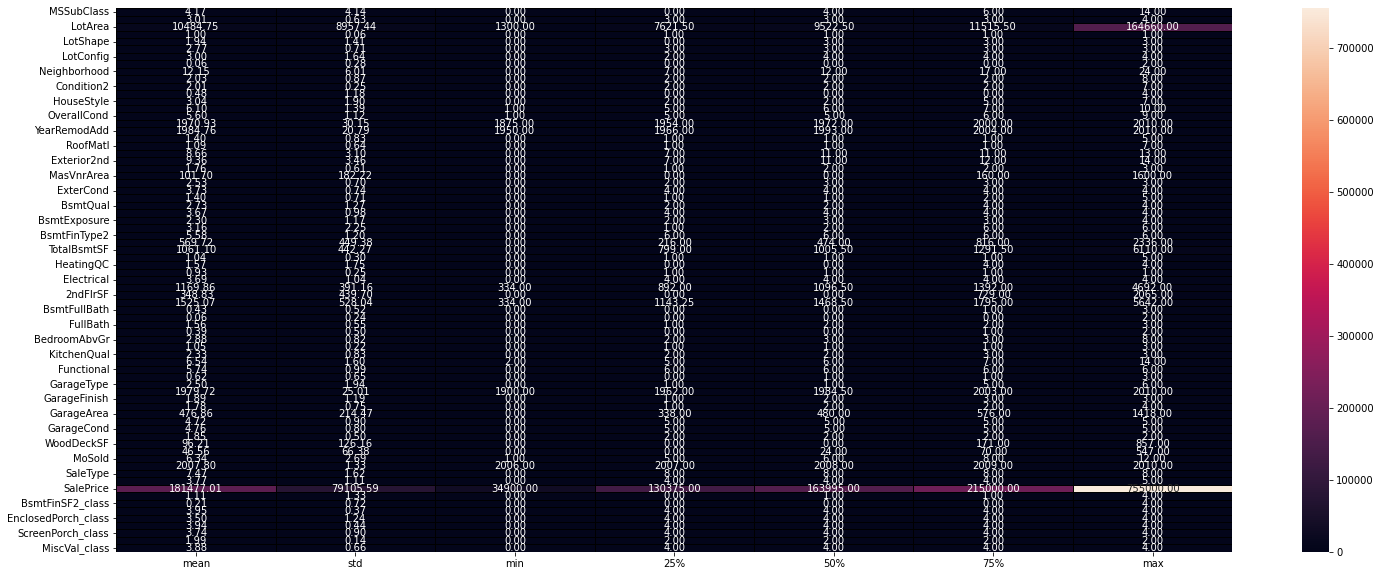

In [107]:
plt.figure(figsize = (25,10))
sns.heatmap(df_train.describe()[1:].transpose(), annot = True, linecolor='black', linewidths=0.5, fmt = '.2f')

#checking description visually

### Checking Correlation of the dataset

In [108]:
df_train.corr()

MSSubClass  MSZoning   LotArea    Street  LotShape  \
MSSubClass             1.000000  0.013516 -0.120690 -0.029520  0.076645   
MSZoning               0.013516  1.000000 -0.023328  0.140215  0.053655   
LotArea               -0.120690 -0.023328  1.000000 -0.263973 -0.189201   
Street                -0.029520  0.140215 -0.263973  1.000000 -0.012941   
LotShape               0.076645  0.053655 -0.189201 -0.012941  1.000000   
LandContour           -0.021033  0.001175 -0.159038  0.105226  0.081803   
LotConfig              0.066929 -0.027246 -0.152063  0.000153  0.211395   
LandSlope             -0.022919 -0.023952  0.395410 -0.141572 -0.101187   
Neighborhood           0.009875 -0.251833  0.010707  0.001420 -0.031852   
Condition1            -0.046613 -0.025651  0.029520  0.002189 -0.136885   
Condition2            -0.021658  0.031959  0.040096  0.001406 -0.032926   
BldgType               0.699825 -0.024776 -0.215345 -0.013606  0.099822   
HouseStyle             0.436668 -0.110991 -0.040637  0.016793 -0.116280   
OverallQual            0.093762 -0.134037  0.107188  0.057140 -0.189636   
OverallCond           -0.056259  0.189553  0.017513  0.031082  0.026931   
YearBuilt              0.030132 -0.299732  0.005506  0.020292 -0.230080   
YearRemodAdd           0.057686 -0.174586  0.027228  0.057866 -0.155428   
RoofStyle             -0.109904  0.000913  0.038615 -0.006875 -0.012410   
RoofMatl              -0.021178  0.009719  0.194142  0.007889 -0.091341   
Exterior1st           -0.088935 -0.012037  0.048265  0.012482 -0.033798   
Exterior2nd           -0.111097  0.005548  0.027328  0.014618 -0.034674   
MasVnrType            -0.030195 -0.033521 -0.005204  0.000822 -0.006337   
MasVnrArea             0.037192 -0.059170  0.120192  0.024363 -0.087011   
ExterQual             -0.028107  0.184815 -0.057865  0.044509  0.158076   
ExterCond              0.010931 -0.099269  0.011438  0.017738 -0.047098   
Foundation             0.069520 -0.244844 -0.021195  0.032701 -0.136443   
BsmtQual              -0.100006  0.157875 -0.064290 -0.035718  0.183721   
BsmtCond              -0.028890  0.005917  0.015626 -0.019762 -0.043181   
BsmtExposure          -0.091854  0.036035 -0.136699  0.065031  0.129202   
BsmtFinType1           0.022846  0.025485 -0.049878 -0.008805  0.096615   
BsmtFinType2           0.034435 -0.028454 -0.073209  0.040511  0.014044   
BsmtUnfSF             -0.134320 -0.032638  0.006600  0.024205 -0.028545   
TotalBsmtSF           -0.219841 -0.058896  0.259733  0.016422 -0.169062   
Heating                0.069221  0.051188 -0.020394  0.006981  0.071484   
HeatingQC             -0.000882  0.119852 -0.003337 -0.047968  0.092617   
CentralAir            -0.106946 -0.015887  0.051182  0.043024 -0.113719   
Electrical             0.052898 -0.079205  0.050388  0.038720 -0.090459   
1stFlrSF              -0.213336 -0.033095  0.312843  0.011486 -0.171928   
2ndFlrSF               0.351164 -0.048968  0.059803  0.040957 -0.066535   
GrLivArea              0.139803 -0.064125  0.281360  0.043322 -0.180021   
BsmtFullBath           0.002956 -0.007287  0.142387 -0.036483 -0.067889   
BsmtHalfBath           0.024663  0.006345  0.059282  0.013788 -0.017926   
FullBath               0.178100 -0.188837  0.123197  0.033208 -0.175359   
HalfBath               0.197825 -0.121209  0.007271  0.045146 -0.122586   
BedroomAbvGr           0.034299 -0.001906  0.117351  0.027587 -0.054438   
KitchenAbvGr           0.324594  0.026744 -0.013075  0.012304  0.082102   
KitchenQual           -0.018333  0.111689 -0.064278 -0.012056  0.122861   
TotRmsAbvGrd           0.117793 -0.031062  0.184546  0.038259 -0.125990   
Functional             0.040881 -0.091684 -0.033165 -0.015309 -0.012018   
Fireplaces            -0.010739  0.010658  0.285983  0.010574 -0.183316   
GarageType             0.108879  0.135666 -0.160511 -0.030325  0.196219   
GarageYrBlt            0.090286 -0.243359 -0.054091  0.001096 -0.163505   
GarageFinish          -0.052239  0.123947 -0.0

<AxesSubplot:>

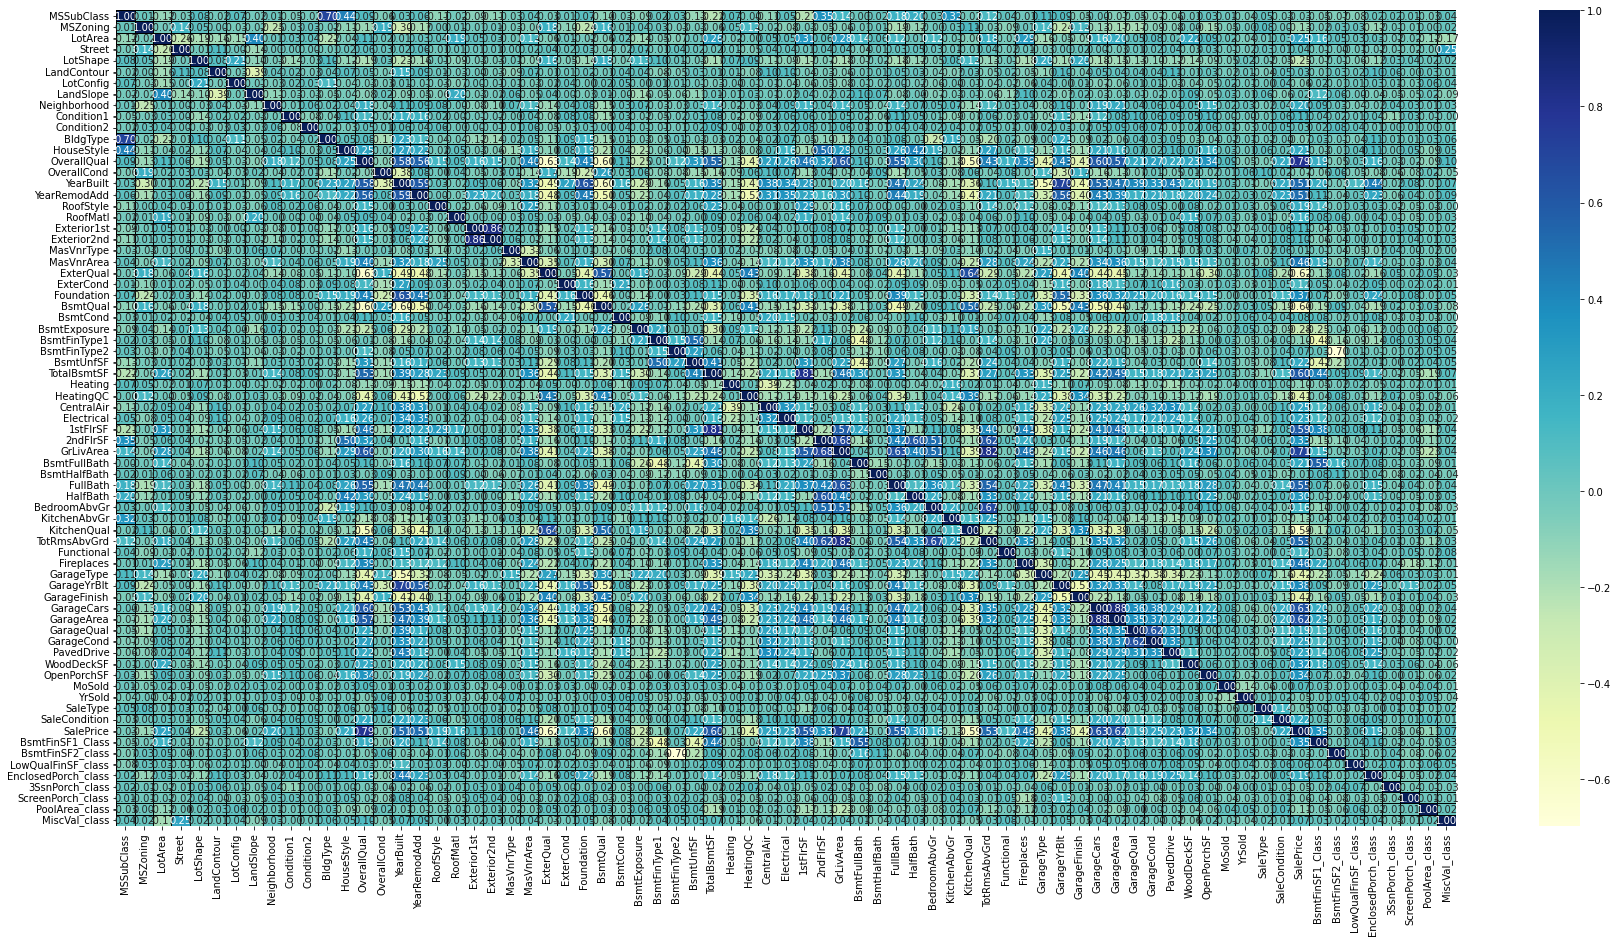

In [109]:
plt.figure(figsize = (30,15))
sns.heatmap(df_train.corr(), annot = True, linecolor = 'black', linewidths = 1, fmt = '.2f', cmap="YlGnBu" )

### Checking Positive and Negative Correlation

<AxesSubplot:>

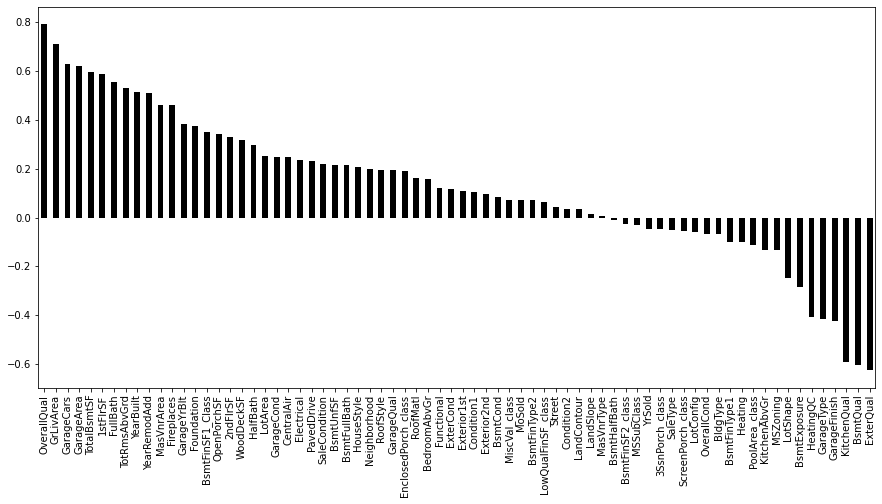

In [110]:
plt.figure(figsize = (15,7))
df_train.corr()['SalePrice'].sort_values(ascending = False).drop('SalePrice').plot(kind = 'bar', color = 'k')

In [111]:
df_train.corr()['SalePrice'].sort_values(ascending = False)

SalePrice              1.000000
OverallQual            0.789185
GrLivArea              0.707300
GarageCars             0.628329
GarageArea             0.619000
TotalBsmtSF            0.595042
1stFlrSF               0.587642
FullBath               0.554988
TotRmsAbvGrd           0.528363
YearBuilt              0.514408
YearRemodAdd           0.507831
MasVnrArea             0.460535
Fireplaces             0.459611
GarageYrBlt            0.381997
Foundation             0.374169
BsmtFinSF1_Class       0.350972
OpenPorchSF            0.339500
2ndFlrSF               0.330386
WoodDeckSF             0.315444
HalfBath               0.295592
LotArea                0.249499
GarageCond             0.249340
CentralAir             0.246754
Electrical             0.234621
PavedDrive             0.231707
SaleCondition          0.217687
BsmtUnfSF              0.215724
BsmtFullBath           0.212924
HouseStyle             0.205502
Neighborhood           0.198942
RoofStyle              0.192654
GarageQu

### Dividing data for feature selection

In [112]:
x = df_train.drop('SalePrice', axis = 1)
y = df_train['SalePrice']

In [113]:
print('shape of x', x.shape)
print('Shape of y', y.shape)

shape of x (1168, 72)
Shape of y (1168,)


### Checking Mutlicollinearity

In [114]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
def calc_vif(x):
    
    vif = pd.DataFrame()
    vif['Variance'] = x.columns
    vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [116]:
num

['LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'MoSold',
 'YrSold',
 'SalePrice']

In [117]:
corr_col = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold']

In [118]:
calc_vif(x[corr_col])  # checking VIF of numerical columns

Variance    VIF Factor
0        LotArea      2.829926
1      YearBuilt  11958.910713
2   YearRemodAdd  16360.195365
3     MasVnrArea      1.750134
4      BsmtUnfSF      3.318413
5    TotalBsmtSF     24.902398
6       1stFlrSF    672.129263
7       2ndFlrSF    135.871884
8      GrLivArea   1092.032881
9    GarageYrBlt  14172.616713
10    GarageArea     10.252345
11    WoodDeckSF      1.834827
12   OpenPorchSF      1.832742
13        MoSold      6.656741
14        YrSold  13175.076385

### YearBuilt, YearRemodAdd, GarageYrBlt, Yrsold are categorical years dataset hence we are not dropping it.

In [119]:
corr_col1 = ['LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',]
calc_vif(x[corr_col1])

Variance   VIF Factor
0       LotArea     2.761058
1    MasVnrArea     1.613739
2     BsmtUnfSF     3.270400
3   TotalBsmtSF    24.049674
4      1stFlrSF   634.250130
5      2ndFlrSF   127.554634
6     GrLivArea  1019.598487
7    GarageArea     8.816168
8    WoodDeckSF     1.784643
9   OpenPorchSF     1.753454
10       MoSold     4.970764

In [120]:
x = x.drop('GrLivArea', axis = 1)

In [121]:
df_test = df_test.drop('GrLivArea', axis = 1)

In [122]:
corr_col2 = ['LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',]
calc_vif(x[corr_col2])

Variance  VIF Factor
0      LotArea    2.760564
1   MasVnrArea    1.605672
2    BsmtUnfSF    3.263419
3  TotalBsmtSF   24.041022
4     1stFlrSF   26.744095
5     2ndFlrSF    1.957954
6   GarageArea    8.799739
7   WoodDeckSF    1.783846
8  OpenPorchSF    1.752684
9       MoSold    4.970495

### Vif are morely like under acceptable zone as lower numerical dataset.

### Removing Skewness

In [123]:
x[corr_col2].skew()

LotArea        10.659285
MasVnrArea      2.835718
BsmtUnfSF       0.909057
TotalBsmtSF     1.744591
1stFlrSF        1.513707
2ndFlrSF        0.823479
GarageArea      0.189665
WoodDeckSF      1.504929
OpenPorchSF     2.410840
MoSold          0.220979
dtype: float64

### Using Power Transformer method

In [124]:
from sklearn.preprocessing import PowerTransformer
pw = PowerTransformer('yeo-johnson')

In [125]:
x[corr_col2] = pw.fit_transform(x[corr_col2])
x[corr_col2].skew()

LotArea        0.032509
MasVnrArea     0.439526
BsmtUnfSF     -0.284390
TotalBsmtSF    0.286779
1stFlrSF      -0.002391
2ndFlrSF       0.280208
GarageArea    -0.320370
WoodDeckSF     0.113026
OpenPorchSF   -0.002749
MoSold        -0.035838
dtype: float64

In [126]:
df_train[corr_col2] = pw.fit_transform(df_train[corr_col2])
df_train[corr_col2].skew()

LotArea        0.032509
MasVnrArea     0.439526
BsmtUnfSF     -0.284390
TotalBsmtSF    0.286779
1stFlrSF      -0.002391
2ndFlrSF       0.280208
GarageArea    -0.320370
WoodDeckSF     0.113026
OpenPorchSF   -0.002749
MoSold        -0.035838
dtype: float64

## Standard Scalling

In [127]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [128]:
scaler_col = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold']

In [129]:
x[scaler_col] = sc.fit_transform(x[scaler_col])

In [131]:
df_test[scaler_col] = sc.fit_transform(df_test[scaler_col])

In [132]:
x.head()

MSSubClass  MSZoning   LotArea  Street  LotShape  LandContour  LotConfig  \
0        11.0       3.0 -1.213954     1.0       0.0          3.0        4.0   
1         0.0       3.0  1.100521     1.0       0.0          3.0        4.0   
2         5.0       3.0  0.158048     1.0       0.0          3.0        1.0   
3         0.0       3.0  0.496002     1.0       0.0          3.0        4.0   
4         0.0       3.0  1.196626     1.0       0.0          3.0        2.0   

   LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  \
0        0.0          13.0         2.0         2.0       4.0         2.0   
1        1.0          12.0         2.0         2.0       0.0         2.0   
2        0.0          15.0         2.0         2.0       0.0         5.0   
3        0.0          14.0         2.0         2.0       0.0         2.0   
4        0.0          14.0         2.0         2.0       0.0         2.0   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  \
0            6            5   0.168236     -0.421565        1.0       1.0   
1            8            6  -0.030885     -0.710356        0.0       5.0   
2            7            5   0.831975      0.589202        1.0       1.0   
3            6            6   0.201423     -0.373434        3.0       1.0   
4            6            7   0.201423      0.733598        1.0       1.0   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0          8.0          9.0         2.0   -0.812901        3.0        4.0   
1         12.0         13.0         2.0   -0.812901        2.0        2.0   
2          7.0          7.0         2.0   -0.812901        2.0        4.0   
3          8.0          9.0         1.0    1.390202        3.0        4.0   
4          4.0          4.0         3.0    1.155573        2.0        4.0   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
0         1.0       2.0       4.0           3.0           0.0           6.0   
1         2.0       4.0       1.0           1.0           0.0           5.0   
2         2.0       2.0       4.0           0.0           2.0           6.0   
3         1.0       2.0       4.0           3.0           1.0           6.0   
4         1.0       2.0       4.0           3.0           0.0           6.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.903777     0.099335      1.0        4.0         1.0         4.0   
1   1.027313     2.374300      1.0        0.0         1.0         4.0   
2  -0.504500     0.185571      1.0        0.0         1.0         4.0   
3   1.160517     1.674462      1.0        0.0         1.0         4.0   
4  -0.226633     1.200095      1.0        2.0         1.0         4.0   

   1stFlrSF  2ndFlrSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0 -0.458345 -0.871745             0             0         2         0   
1  2.122554 -0.871745             1             0         2         0   
2  0.058641  1.176207             1             0         2         1   
3  1.574554 -0.871745             0             0         2         0   
4  1.149105 -0.871745             0             1         2         0   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             2             1          3.0             5         6.0   
1             4             1          2.0             8         6.0   
2             3             1          3.0             8         6.0   
3             3             1          3.0             7         6.0   
4             3             1          2.0             8         6.0   

   Fireplaces  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  \
0           1         1.0    -0.108689           2.0           2   -0.113082   
1           1         1.0    -0.388663           3.0           2    0.678810   
2           1         1.0     0.691239           3.0           2   -0.045422   
3           1         1.0    -0.108689 

### Feature Selection

In [133]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import random

In [134]:
class best_model:
    def best_fit(x, y, model):
        random_state_values = []
        for i in range(0,200):
            x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.30)
            model.fit(x_train, y_train)
            pred_train = model.predict(x_train)
            pred_test = model.predict(x_test)
            training = r2_score(pred_train, y_train)
            testing = r2_score(pred_test, y_test)
            
            if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
                
                print("At random_state:-", i)
                print("Training accuracy_score is:-", r2_score(pred_train, y_train)*100)
                print("Testing accuracy_score is:-", r2_score(pred_test, y_test)*100)
                print("\n")
                random_state_values.append(i)
        print("Best fit random_state_values", random_state_values)
    
    
    def final_model(x, y, model, i):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        print("At random state", i , "model giving best accuracy score","\n")
        Train_accuracy = r2_score(pred_train, y_train)
        Test_accuracy = r2_score(pred_test, y_test)

        print('Training accuracy:- ', Train_accuracy*100)
        print('Testing accuracy:- ', Test_accuracy*100)
        print("\n")
        print('--------------------------------------')
        print('Mean squared error:- ', mean_squared_error(pred_test, y_test) )
        print('Mean absolute error:- ', mean_absolute_error(pred_test, y_test) )
        print('Root Mean squared error:-',np.sqrt(mean_squared_error(pred_test, y_test)))
        
        plt.figure(figsize = (10, 5))
        plt.scatter(x = y_test, y = pred_test, color = 'c')
        plt.plot(y_test, y_test, color = 'b')
        plt.xlabel('Actual_values', fontsize= 18 )
        plt.ylabel('Predicted_values', fontsize = 18)
        plt.title(str(model), fontsize = 20)
        

    def cross_val_score(model, x, y):
        for value in range(2,10):
            cv = cross_val_score(model, x, y, cv = value).mean()
            print('cross_val_score', cv*100,'at cv =', value,"\n")


## Model 1 KNeighbors Regressor

In [135]:
model = KNeighborsRegressor()

In [136]:
# best_model.best_fit(x, y, model) # finding best random state

# No random state value find

#### Taking some random values for checking Model

In [137]:
for i in random.sample(range(1, 200), 30):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.30)
    model.fit(x_train, y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    training = r2_score(pred_train, y_train)
    testing = r2_score(pred_test, y_test)
            
    #if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
                
    print("At random_state:-", i)
    print("Training accuracy_score is:-", r2_score(pred_train, y_train)*100)
    print("Testing accuracy_score is:-", r2_score(pred_test, y_test)*100)
    print("\n")


At random_state:- 76
Training accuracy_score is:- 67.54820518342913
Testing accuracy_score is:- 33.279584524157


At random_state:- 85
Training accuracy_score is:- 68.33945127647829
Testing accuracy_score is:- 55.711860501564736


At random_state:- 193
Training accuracy_score is:- 71.8367317774398
Testing accuracy_score is:- 48.56530486247802


At random_state:- 188
Training accuracy_score is:- 67.76034505903802
Testing accuracy_score is:- 58.64768472936832


At random_state:- 61
Training accuracy_score is:- 68.33928794788255
Testing accuracy_score is:- 46.56828652289708


At random_state:- 31
Training accuracy_score is:- 71.27091570695349
Testing accuracy_score is:- 45.52243168037363


At random_state:- 5
Training accuracy_score is:- 74.10923557993304
Testing accuracy_score is:- 33.40931451243443


At random_state:- 181
Training accuracy_score is:- 65.23692350901115
Testing accuracy_score is:- 58.476311295246695


At random_state:- 93
Training accuracy_score is:- 70.70644960839638
Tes

#### Model giving best r2 score at random state value 195

At random state 195 model giving best accuracy score 

Training accuracy:-  70.52780127415791
Testing accuracy:-  67.92035167996285


--------------------------------------
Mean squared error:-  1207433751.8314528
Mean absolute error:-  24762.63190883191
Root Mean squared error:- 34748.147458986256


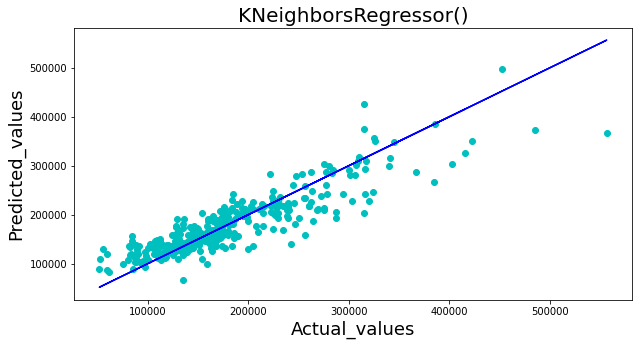

In [138]:
best_model.final_model(x, y, model, 195)

In [139]:
best_model.cross_val_score(model, x, y)

cross_val_score 70.11645830235842 at cv = 2 

cross_val_score 71.23204852952111 at cv = 3 

cross_val_score 71.60526106274784 at cv = 4 

cross_val_score 72.6607198458583 at cv = 5 

cross_val_score 72.75874437789628 at cv = 6 

cross_val_score 73.25962355709842 at cv = 7 

cross_val_score 73.21325000284288 at cv = 8 

cross_val_score 72.08698888743241 at cv = 9 



## Model 2 Decision Tree Regressor

In [140]:
model = DecisionTreeRegressor()

In [141]:
# best_model.best_fit(x, y, model) # finding best random state

# No random state value find

#### Taking some random values for checking Model

In [142]:
for i in random.sample(range(1, 200), 30):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.30)
    model.fit(x_train, y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    training = r2_score(pred_train, y_train)
    testing = r2_score(pred_test, y_test)
            
    #if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
                
    print("At random_state:-", i)
    print("Training accuracy_score is:-", r2_score(pred_train, y_train)*100)
    print("Testing accuracy_score is:-", r2_score(pred_test, y_test)*100)
    print("\n")


At random_state:- 121
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 67.5665853314215


At random_state:- 79
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 67.82694885310772


At random_state:- 10
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 72.47890496864812


At random_state:- 51
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 69.41236445330932


At random_state:- 196
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 58.87272807254982


At random_state:- 61
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 63.51383990960318


At random_state:- 71
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 62.41761919553125


At random_state:- 111
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 71.31556541921735


At random_state:- 44
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 54.68258179772991


At random_state:- 72
Training accuracy_score is:- 100.0
Testin

#### Model giving best r2 score at random state value 10

At random state 188 model giving best accuracy score 

Training accuracy:-  100.0
Testing accuracy:-  72.07707919431523


--------------------------------------
Mean squared error:-  1570409828.7692308
Mean absolute error:-  27446.14814814815
Root Mean squared error:- 39628.39674739858


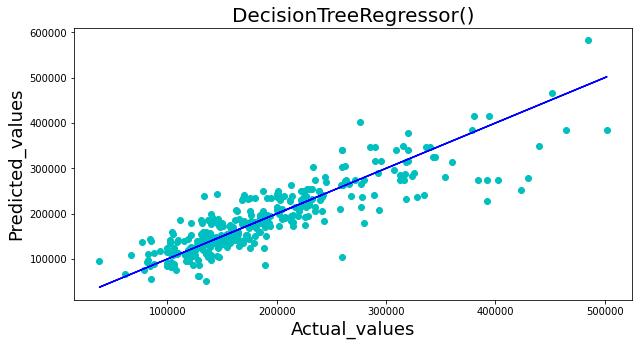

In [144]:
best_model.final_model(x, y, model, 188)

In [145]:
best_model.cross_val_score(model, x, y)

cross_val_score 50.0396040574522 at cv = 2 

cross_val_score 67.13673850206511 at cv = 3 

cross_val_score 67.38079589554103 at cv = 4 

cross_val_score 67.94699733822333 at cv = 5 

cross_val_score 68.8676470227969 at cv = 6 

cross_val_score 66.79265124355261 at cv = 7 

cross_val_score 68.32890784362218 at cv = 8 

cross_val_score 71.11165222915994 at cv = 9 



## Model 3 XGB Regressor

In [146]:
model = XGBRegressor()

In [147]:
# best_model.best_fit(x, y, model) # finding best random state

# No values found

#### Taking some random values for checking Model

In [148]:
for i in random.sample(range(1, 200), 30):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.30)
    model.fit(x_train, y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    training = r2_score(pred_train, y_train)
    testing = r2_score(pred_test, y_test)
            
    #if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
                
    print("At random_state:-", i)
    print("Training accuracy_score is:-", r2_score(pred_train, y_train)*100)
    print("Testing accuracy_score is:-", r2_score(pred_test, y_test)*100)
    print("\n")


At random_state:- 148
Training accuracy_score is:- 99.99522822143155
Testing accuracy_score is:- 85.62015204118322


At random_state:- 186
Training accuracy_score is:- 99.99726551980889
Testing accuracy_score is:- 83.98097815419955


At random_state:- 163
Training accuracy_score is:- 99.99712243010087
Testing accuracy_score is:- 77.86061735628762


At random_state:- 36
Training accuracy_score is:- 99.99566394798298
Testing accuracy_score is:- 80.77556638029486


At random_state:- 118
Training accuracy_score is:- 99.99692425284049
Testing accuracy_score is:- 78.66524243006847


At random_state:- 31
Training accuracy_score is:- 99.99549508591831
Testing accuracy_score is:- 75.14012456259253


At random_state:- 95
Training accuracy_score is:- 99.99840308632218
Testing accuracy_score is:- 82.11741093389611


At random_state:- 143
Training accuracy_score is:- 99.99531614696126
Testing accuracy_score is:- 83.53060148187794


At random_state:- 17
Training accuracy_score is:- 99.99610519673661

#### Model giving best r2 score at random state value 172

At random state 172 model giving best accuracy score 

Training accuracy:-  99.99656969902267
Testing accuracy:-  88.74409777301683


--------------------------------------
Mean squared error:-  621845876.1313764
Mean absolute error:-  17303.12554531695
Root Mean squared error:- 24936.837733188553


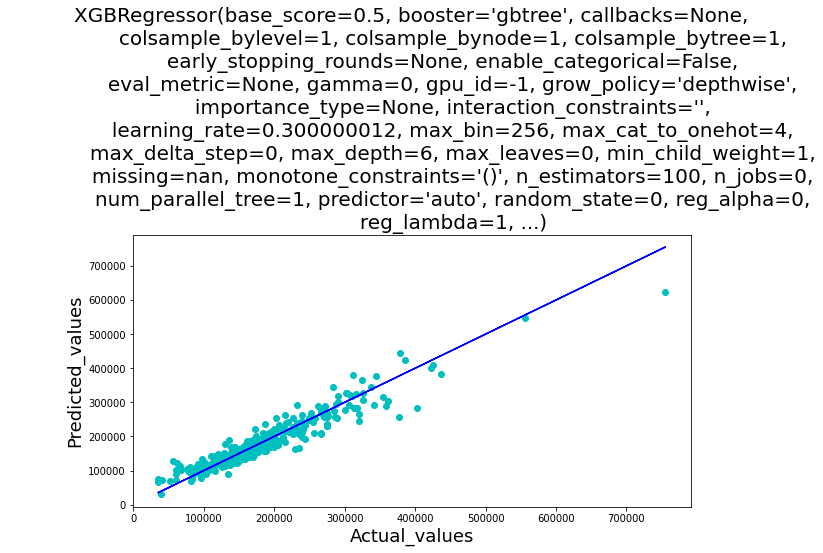

In [149]:
best_model.final_model(x, y, model, 172)

In [150]:
best_model.cross_val_score(model, x, y)

cross_val_score 82.57794964056957 at cv = 2 

cross_val_score 84.2703914308628 at cv = 3 

cross_val_score 81.0181286075822 at cv = 4 

cross_val_score 84.01919543008066 at cv = 5 

cross_val_score 82.67089448927254 at cv = 6 

cross_val_score 80.94632388910108 at cv = 7 

cross_val_score 82.12099585204018 at cv = 8 

cross_val_score 83.98323469836974 at cv = 9 



## Model 4 GradientBoostingRegressor

In [151]:
model = GradientBoostingRegressor()

In [152]:
best_model.best_fit(x, y, model) # finding best random state

Best fit random_state_values []


In [153]:
for i in random.sample(range(1, 200), 30):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.30)
    model.fit(x_train, y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    training = r2_score(pred_train, y_train)
    testing = r2_score(pred_test, y_test)
            
    #if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
                
    print("At random_state:-", i)
    print("Training accuracy_score is:-", r2_score(pred_train, y_train)*100)
    print("Testing accuracy_score is:-", r2_score(pred_test, y_test)*100)
    print("\n")


At random_state:- 167
Training accuracy_score is:- 96.72763612987566
Testing accuracy_score is:- 82.45755225758467


At random_state:- 147
Training accuracy_score is:- 97.19954269038206
Testing accuracy_score is:- 77.8489857152321


At random_state:- 76
Training accuracy_score is:- 96.84578822919251
Testing accuracy_score is:- 79.77137377457241


At random_state:- 112
Training accuracy_score is:- 96.7687773459092
Testing accuracy_score is:- 80.66632769118186


At random_state:- 180
Training accuracy_score is:- 97.20061350937912
Testing accuracy_score is:- 86.2827067909589


At random_state:- 129
Training accuracy_score is:- 96.73484792121033
Testing accuracy_score is:- 87.68695915084231


At random_state:- 193
Training accuracy_score is:- 97.30729177412498
Testing accuracy_score is:- 78.69007717653815


At random_state:- 190
Training accuracy_score is:- 96.93615067261443
Testing accuracy_score is:- 79.26064116390512


At random_state:- 98
Training accuracy_score is:- 96.79109548992948


#### Model giving best r2 score at random state value 129

At random state 129 model giving best accuracy score 

Training accuracy:-  96.73484792121033
Testing accuracy:-  87.89327874400033


--------------------------------------
Mean squared error:-  707473459.414151
Mean absolute error:-  17721.520686780874
Root Mean squared error:- 26598.373247515552


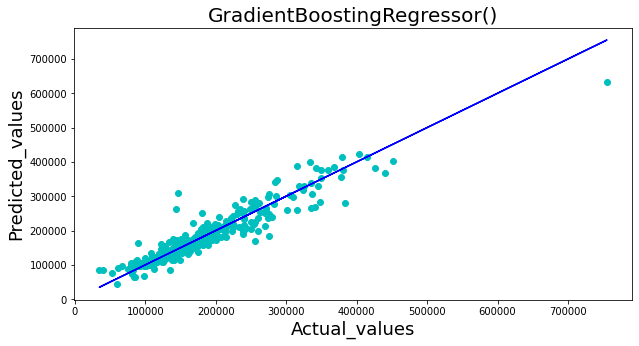

In [154]:
best_model.final_model(x, y, model, 129)

In [155]:
best_model.cross_val_score(model, x, y)

cross_val_score 83.72868034620349 at cv = 2 

cross_val_score 86.71369922910603 at cv = 3 

cross_val_score 84.12051743382203 at cv = 4 

cross_val_score 84.97637690687057 at cv = 5 

cross_val_score 86.21182308118495 at cv = 6 

cross_val_score 83.56252846236839 at cv = 7 

cross_val_score 85.4935068048153 at cv = 8 

cross_val_score 85.45577002664572 at cv = 9 



## Model 5 LGBMRegressor

In [156]:
model = LGBMRegressor()

In [157]:
#best_model.best_fit(x, y, model) # finding best random state

#No random state value find

#### Taking some random values for checking Model

In [158]:
for i in random.sample(range(1, 200), 30):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.30)
    model.fit(x_train, y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    training = r2_score(pred_train, y_train)
    testing = r2_score(pred_test, y_test)
            
    #if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
                
    print("At random_state:-", i)
    print("Training accuracy_score is:-", r2_score(pred_train, y_train)*100)
    print("Testing accuracy_score is:-", r2_score(pred_test, y_test)*100)
    print("\n")


At random_state:- 112
Training accuracy_score is:- 96.56993605613367
Testing accuracy_score is:- 75.88097895647003


At random_state:- 132
Training accuracy_score is:- 96.94038327216428
Testing accuracy_score is:- 80.85075256502495


At random_state:- 191
Training accuracy_score is:- 96.40251600708247
Testing accuracy_score is:- 83.01699908044475


At random_state:- 47
Training accuracy_score is:- 96.95289636180495
Testing accuracy_score is:- 79.49128062708012


At random_state:- 110
Training accuracy_score is:- 96.10932543803933
Testing accuracy_score is:- 77.14909435434491


At random_state:- 49
Training accuracy_score is:- 96.7395076279211
Testing accuracy_score is:- 86.48643094237845


At random_state:- 39
Training accuracy_score is:- 96.83075573930908
Testing accuracy_score is:- 82.72862912200964


At random_state:- 54
Training accuracy_score is:- 95.69809347368867
Testing accuracy_score is:- 78.32532132899694


At random_state:- 40
Training accuracy_score is:- 96.45438663234015
T

#### Model giving best r2 score at random state value 135

At random state 135 model giving best accuracy score 

Training accuracy:-  95.6832603079067
Testing accuracy:-  87.80425114146232


--------------------------------------
Mean squared error:-  768582497.7438668
Mean absolute error:-  18237.659949479807
Root Mean squared error:- 27723.32046750293


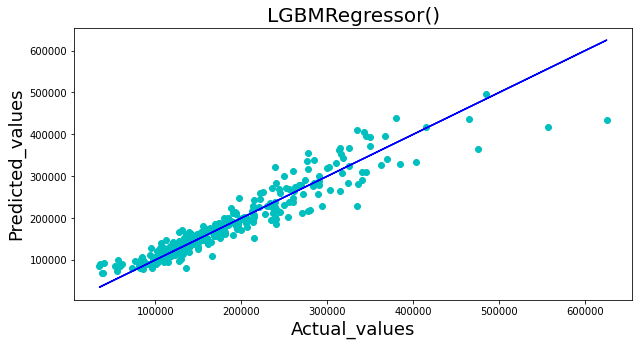

In [159]:
best_model.final_model(x, y, model, 135)

In [160]:
best_model.cross_val_score(model, x, y)

cross_val_score 81.91225770334219 at cv = 2 

cross_val_score 84.37347354281358 at cv = 3 

cross_val_score 82.8608384387553 at cv = 4 

cross_val_score 82.95494325601197 at cv = 5 

cross_val_score 83.55935366690366 at cv = 6 

cross_val_score 82.51639673461128 at cv = 7 

cross_val_score 83.85297105935004 at cv = 8 

cross_val_score 82.17248958279215 at cv = 9 



### Finalizing Model

In [161]:
# models                    R2_score_train_score    R2_score_test_score      CV score            CV_state

# KNeighborsRegressor       70.52780127415791       67.92035167996285       70.11645830235842      2     
# DecisionTreeRegressor     100.0                   72.07707919431523       71.11165222915994      9
# XGBRegressor              99.99656969902267       88.74409777301683       84.2703914308628       3
# GradientBoostingRegressor 96.73484792121033       87.89327874400033       86.71369922910603      3
# LGBMRegressor             95.6832603079067        87.80425114146232       84.37347354281358      3

### Observatons: 
- KNeighborsRegressor : Model shows low r2 score in training and testing accuracy hence we cannot consider it.

- DecisionTreeRegressor:  Same as DecisionTreeRegressor shows very much difference in training and testing accuracy hence we cannot consider it. Model becames underfit.


- XGBRegressor:  Same as above two model it shows very much difference in training and testing accuracy hence we cannot consider it. Model becames underfit.


- GradientBoostingRegressor: GradientBoostingRegressor shows closer R2 testing and training score but still training score it much greater than it testings R2 score which makes model underfit also R2 score not good yet from all models hence we can't consider it.


- LGBMRegressor : Moder shows very close R2 score of testing and training also CV score is also good hence we can consider it for model building.

### Ensemble Method 

## Hyper Parameter Tuning

In [162]:
model = LGBMRegressor()
# using hyper parameter tuning for Ridge regression to find out best criterion

# param (boosting_type: str = 'gbdt',
#     num_leaves: int = 31,
#     max_depth: int = -1,
#     learning_rate: float = 0.1,
#     n_estimators: int = 100,
#     subsample_for_bin: int = 200000,
#     objective: Union[str, Callable, NoneType] = None,
#     class_weight: Union[Dict, str, NoneType] = None,
#     min_split_gain: float = 0.0,
#     min_child_weight: float = 0.001,
#     min_child_samples: int = 20,
#     subsample: float = 1.0,
#     subsample_freq: int = 0,
#     colsample_bytree: float = 1.0,
#     reg_alpha: float = 0.0,
#     reg_lambda: float = 0.0,
#     random_state: Union[numpy.random.mtrand.RandomState, int, NoneType] = None,
#     n_jobs: int = -1,
#     silent: Union[bool, str] = 'warn',
#     importance_type: str = 'split',)
# by default params

param = {'boosting_type': ['gbdt', 'dart'], 'num_leaves': [31,41], 'max_depth': [-1,0], 'learning_rate': [0.1, 1],
        'n_estimators': [100], 'colsample_bytree': [1.0, 0.1],}
# using only important parameters.

gd = GridSearchCV(model, param_grid=param, cv = 8)
gd.fit(x, y)
gd.best_params_

# {'boosting_type': 'dart',
#  'colsample_bytree': 1.0,
#  'learning_rate': 1,
#  'max_depth': -1,
#  'n_estimators': 100,
#  'num_leaves': 41}

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.1,
 'learning_rate': 0.1,
 'max_depth': -1,
 'n_estimators': 100,
 'num_leaves': 41}

In [163]:
final_model = LGBMRegressor(boosting_type = 'gbdt', colsample_bytree= 0.1, learning_rate=0.1, max_depth = -1, n_estimators=100, num_leaves = 41)

In [164]:
#final_model = LGBMRegressor()

At random state 135 model giving best accuracy score 

Training accuracy:-  91.65038262533558
Testing accuracy:-  87.79961573185521


--------------------------------------
Mean squared error:-  676201558.6377157
Mean absolute error:-  16769.15395469789
Root Mean squared error:- 26003.875838761338


Text(0.5, 1.0, 'LGBMRegressor()')

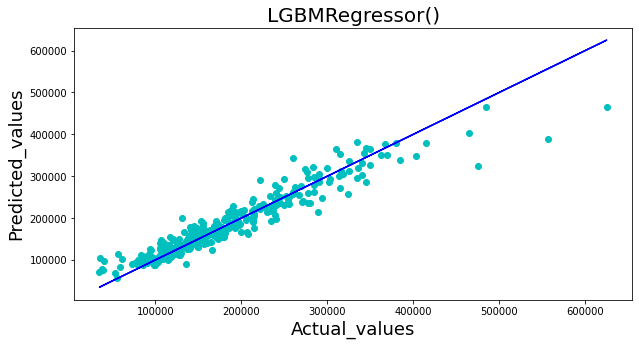

In [168]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 135)
final_model.fit(x_train, y_train)
pred_train = final_model.predict(x_train)
pred_test = final_model.predict(x_test)
print("At random state", 135 , "model giving best accuracy score","\n")
Train_accuracy = r2_score(pred_train, y_train)
Test_accuracy = r2_score(pred_test, y_test)

print('Training accuracy:- ', Train_accuracy*100)
print('Testing accuracy:- ', Test_accuracy*100)
print("\n")
print('--------------------------------------')
print('Mean squared error:- ', mean_squared_error(pred_test, y_test) )
print('Mean absolute error:- ', mean_absolute_error(pred_test, y_test) )
print('Root Mean squared error:-',np.sqrt(mean_squared_error(pred_test, y_test)))
        
plt.figure(figsize = (10, 5))
plt.scatter(x = y_test, y = pred_test, color = 'c')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual_values', fontsize= 18 )
plt.ylabel('Predicted_values', fontsize = 18)
plt.title(str(model), fontsize = 20)

### 

### Cross Val Score

In [169]:
cross_val_score(final_model, x, y, cv = 3).mean()

0.844315554673861

### Deploy Model

In [173]:
import pickle

filename = "Housingprice.pkl"
pickle.dump(final_model, open(filename, 'wb'))

### Loading Model

In [185]:
load = pickle.load(open('Housingprice.pkl', 'rb'))
result = load.score(x_test, y_test)
print(result)

0.9046302975945946


In [175]:
conclusion = pd.DataFrame()
conclusion['Predicted House price'] = np.array(final_model.predict(x_test))
conclusion['Actual House price'] = np.array(y_test)

In [176]:
conclusion.sample(10)

Predicted House price  Actual House price
202          122236.067578              112500
178          128810.668947              119200
228          136271.277249              140000
42           389302.622393              556581
89           234721.661016              225000
276          240859.071317              272000
253          316799.002176              274000
119          214577.141973              193000
126          220965.082743              222000
321          201601.064491              185000

### Prediction for test dataset

In [177]:
df_test.head(1)

MSSubClass  MSZoning   LotArea  Street  LotShape  LandContour  LotConfig  \
0         0.0       2.0  0.263894     1.0       0.0          1.0        0.0   

   LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  \
0        0.0          21.0         2.0         0.0       0.0         2.0   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  \
0            9            5    1.06543      1.031595        3.0       0.0   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0          9.0         11.0         3.0     0.52251        2.0        3.0   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
0         2.0       0.0       3.0           1.0           2.0           6.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.281925     2.074477      0.0        0.0         1.0         4.0   

   1stFlrSF  2ndFlrSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0  2.152007 -0.801927             1             0         2         0   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             3             1          2.0             8         5.0   

   Fireplaces  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  \
0           1         1.0     1.000873           0.0           3    1.038573   

   GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF   MoSold  \
0         5.0         5.0         2.0    0.752755     0.059897  0.27696   

     YrSold  SaleType  SaleCondition  BsmtFinSF1_Class  BsmtFinSF2_class  \
0 -0.650908       5.0            2.0               2.0               0.0   

   LowQualFinSF_class  EnclosedPorch_class  3SsnPorch_class  \
0                 3.0                  3.0              1.0   

   ScreenPorch_class  PoolArea_class  MiscVal_class  
0                3.0             0.0            2.0

In [178]:
predicted_price =  pickle.load(open('Housingprice.pkl', 'rb'))  # Loading price_predictor model

In [179]:
predicted_house_price = np.array(predicted_price.predict(df_test))  

In [181]:
df_test['Predicted_House_price'] = predicted_house_price

In [182]:
df_test.sample(10)

MSSubClass  MSZoning   LotArea  Street  LotShape  LandContour  LotConfig  \
124         4.0       2.0  0.021405     1.0       3.0          0.0        4.0   
148         0.0       3.0  0.154560     1.0       3.0          3.0        4.0   
263         2.0       3.0 -0.394140     1.0       3.0          3.0        0.0   
182         0.0       2.0  0.000816     1.0       0.0          1.0        4.0   
183        12.0       1.0 -0.606646     1.0       3.0          3.0        2.0   
21          0.0       2.0 -0.183963     1.0       3.0          3.0        4.0   
23         14.0       3.0 -0.379111     1.0       3.0          3.0        4.0   
129        14.0       3.0 -0.465076     1.0       3.0          3.0        4.0   
86          1.0       2.0  0.011636     1.0       3.0          3.0        4.0   
35          8.0       2.0 -0.050958     1.0       0.0          3.0        4.0   

     LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  \
124        0.0          11.0         0.0         0.0       0.0         0.0   
148        0.0          16.0         2.0         0.0       0.0         2.0   
263        0.0          16.0         2.0         0.0       0.0         2.0   
182        0.0          22.0         2.0         0.0       0.0         2.0   
183        0.0          20.0         2.0         0.0       3.0         5.0   
21         0.0          18.0         2.0         0.0       0.0         2.0   
23         0.0           8.0         2.0         0.0       1.0         5.0   
129        0.0          16.0         2.0         0.0       1.0         5.0   
86         0.0          16.0         2.0         0.0       0.0         2.0   
35         0.0           7.0         2.0         0.0       0.0         7.0   

     OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  \
124            5            6  -0.908590     -1.758454        1.0       0.0   
148            5            5  -0.546686     -1.459520        1.0       0.0   
263            6            7  -1.533696      0.931950        1.0       0.0   
182            8            5   1.098330      1.081417        1.0       0.0   
183            7            5   0.868028      0.682838        3.0       0.0   
21             6            5   0.144221     -0.413252        1.0       0.0   
23             4            5  -1.402095     -1.758454        3.0       0.0   
129            4            5  -1.731098      1.131239        1.0       0.0   
86             4            6  -1.500796      1.081417        1.0       0.0   
35             7            5   0.900928      0.732661        1.0       0.0   

     Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
124          6.0          7.0         2.0   -0.623319        3.0        3.0   
148          2.0          2.0         2.0   -0.623319        3.0        3.0   
263          6.0          7.0         2.0   -0.623319        3.0        2.0   
182          9.0         11.0         3.0    0.946466        2.0        3.0   
183          6.0          7.0         2.0   -0.623319        2.0        3.0   
21           7.0          8.0         1.0    0.224594        3.0        3.0   
23           9.0         13.0         2.0   -0.623319        1.0        1.0   
129          6.0          7.0         2.0   -0.623319        3.0        3.0   
86          10.0         12.0         2.0   -0.623319        3.0        3.0   
35           9.0         11.0         2.0   -0.623319        3.0        3.0   

     Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
124         1.0       4.0       3.0           3.0           1.0           6.0   
148         2.0       3.0       2.0           4.0           4.0           4.0   
263         0.0       4.0       3.0           2.0           3.0           6.0   
182         2.0       2.0       3.0           0.0           6.0           6.0   
183         2.0       2.0       3.0           3.0           0.0           6.0   
21          1.0       4.0   